# **Import Statements**

In [1]:
import sys
root = "C:\\Users\\saman\\OneDrive\\Documents\\GitHub\\Eyelid-Modeling\\" #laptop path
#root = "C:\\Users\\Samantha\\Documents\\GitHub\\Eyelid-Modeling\\" #desktop path
sys.path.append(root)

from utils.experiment_manager import Experiment
from models.EMG_RNN_CNN import EMG_RNN_CNN_Wrapper
from utils.data_management import Mat2TVT, Preprocessor

import torch
import numpy as np
import matplotlib.pyplot as plt
import pickle

%load_ext autoreload
%autoreload 2

torch.cuda.is_available()

True

# **Data Reorganization** <br>


In [2]:
eye_bool = np.asarray([True, True, False, True, True, False, False, False])
electrode_list = ['u1', 'u2', 'u3', 'u4', 't2']
marker_list = ['u1', 'u2', 'u3', 'u4', 'u5']
filepath = root + 'eyeliddata.mat'

train = 0.7
val = 0.2
test = 0.1

reorganizer = Mat2TVT(eye_bool, electrode_list, marker_list, filepath)
_, _, identifier = reorganizer.load_data()
X, y = reorganizer.DMVC_norm()
TVT_dict = reorganizer.TVT_split(train, val, test)

# **Run Experiments**

In [3]:
params = {
    't_win': np.arange(10,51,1, dtype = float),
    't_stride': np.arange(10, 51, 1, dtype = float),
    't_lookahead': np.arange(50, 101, 1, dtype = float),
    'win_mode': ['win_fft', 'win_rect'],
    'p_transform': np.linspace(0, 1, 100, dtype = float),
    'sigma': np.linspace(0, 5, 100, dtype = float),
    'p_mask': np.linspace(0, 0.5, 100, dtype = float),
    'batch_size': [4, 8, 16, 32, 64, 128],
    'learning_rate': np.linspace(1e-3, 1e-8, 500, dtype = float),
    'dropout': np.linspace(0, 1, 100, dtype = float),
    'RNN_hdim': [4, 8, 16, 32, 64, 128],
    'RNN_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'CNN_kernel': [3, 5]
}

experiment = Experiment()
model = EMG_RNN_CNN_Wrapper()
best_params = experiment(params, TVT_dict, model, n_trials = 250, epochs = 100, patience = 25, gcollect = False) 

print("Best Params:\n_________________________________________________________________________________________________________")
for key, value in best_params.items():
    print('    {}: {}'.format(key, value))

with open("best_params.pickle", "wb") as file:
    pickle.dump(best_params, file)

[I 2025-03-14 17:34:38,450] A new study created in memory with name: no-name-d6e213a9-2964-419d-9368-73da32438451


Epoch 1
-------------------------------
Epoch 1
-------------------------------
Epoch 1
-------------------------------
Epoch 1
-------------------------------
Epoch 1
-------------------------------
Epoch 1
-------------------------------
Epoch 1
-------------------------------
Epoch 1
-------------------------------
Epoch 1
-------------------------------
Epoch 1
-------------------------------
Epoch 1
-------------------------------
Epoch 1
-------------------------------
Epoch 1
-------------------------------
Epoch 1
-------------------------------
Epoch 1
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 2048.0%, Avg Marker Error: 123.1%, Avg loss: 4008.762695 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 3850.7%, Avg Marker Error: 143.5%, Avg loss: 4873.164551 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 6029.3%, Avg Marker Error: 167.1%, Avg loss: 573

[I 2025-03-14 17:41:15,850] Trial 4 finished with value: 3771.973876953125 and parameters: {'t_win': np.float64(35.0), 't_stride': np.float64(29.0), 't_lookahead': np.float64(61.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.26262626262626265), 'sigma': np.float64(2.8282828282828283), 'p_mask': np.float64(0.020202020202020204), 'batch_size': 128, 'learning_rate': np.float64(0.0007434895390781563), 'dropout': np.float64(0.3434343434343435), 'RNN_hdim': 16, 'RNN_depth': 2, 'CNN_kernel': 5}. Best is trial 4 with value: 3771.973876953125.


Validation Error: 
 Max Marker Error: 813.5%, Avg Marker Error: 95.2%, Avg loss: 3875.316162 

Stopped early after epoch: 56
Done!
Validation Error: 
 Max Marker Error: 1129.8%, Avg Marker Error: 98.5%, Avg loss: 3986.235352 

Epoch 18
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 488.0%, Avg Marker Error: 99.2%, Avg loss: 3827.381836 

Epoch 39
-------------------------------
Validation Error: 
 Max Marker Error: 2611.3%, Avg Marker Error: 104.1%, Avg loss: 4368.538574 

Epoch 51
-------------------------------
Validation Error: 
 Max Marker Error: 1884.3%, Avg Marker Error: 116.7%, Avg loss: 4478.878418 

Epoch 37
-------------------------------
Validation Error: 
 Max Marker Error: 4310.9%, Avg Marker Error: 134.2%, Avg loss: 4321.712891 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 1295.3%, Avg Marker Error: 97.8%, Avg loss: 4119.070801 

Epoch 36
-------------------------------
Valida

[I 2025-03-14 17:41:53,566] Trial 12 finished with value: 4093.1494140625 and parameters: {'t_win': np.float64(39.0), 't_stride': np.float64(34.0), 't_lookahead': np.float64(52.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.5252525252525253), 'sigma': np.float64(3.9898989898989896), 'p_mask': np.float64(0.12626262626262627), 'batch_size': 64, 'learning_rate': np.float64(0.0006893818637274549), 'dropout': np.float64(0.31313131313131315), 'RNN_hdim': 16, 'RNN_depth': 10, 'CNN_kernel': 5}. Best is trial 4 with value: 3771.973876953125.


Validation Error: 
 Max Marker Error: 1223.2%, Avg Marker Error: 97.8%, Avg loss: 4114.559082 

Stopped early after epoch: 37
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 2486.9%, Avg Marker Error: 103.1%, Avg loss: 4352.573730 

Epoch 56
-------------------------------


[I 2025-03-14 17:41:59,467] Trial 3 finished with value: 3794.227294921875 and parameters: {'t_win': np.float64(10.0), 't_stride': np.float64(32.0), 't_lookahead': np.float64(98.0), 'win_mode': 'win_rect', 'p_transform': np.float64(0.17171717171717174), 'sigma': np.float64(4.595959595959596), 'p_mask': np.float64(0.12626262626262627), 'batch_size': 64, 'learning_rate': np.float64(4.810571142284566e-05), 'dropout': np.float64(0.7171717171717172), 'RNN_hdim': 64, 'RNN_depth': 3, 'CNN_kernel': 3}. Best is trial 4 with value: 3771.973876953125.


Validation Error: 
 Max Marker Error: 470.2%, Avg Marker Error: 99.1%, Avg loss: 3835.553955 

Stopped early after epoch: 41
Done!
Validation Error: 
 Max Marker Error: 8314.0%, Avg Marker Error: 152.8%, Avg loss: 4997.202637 

Epoch 6
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1235.1%, Avg Marker Error: 98.5%, Avg loss: 3994.488037 

Epoch 20
-------------------------------
Validation Error: 
 Max Marker Error: 1825.9%, Avg Marker Error: 115.7%, Avg loss: 4460.861328 

Epoch 41
-------------------------------
Validation Error: 
 Max Marker Error: 1105.5%, Avg Marker Error: 91.8%, Avg loss: 3724.826416 

Epoch 13
-------------------------------
Validation Error: 
 Max Marker Error: 2463.7%, Avg Marker Error: 102.8%, Avg loss: 4348.979980 

Epoch 57
-------------------------------
Validation Error: 
 Max Marker Error: 1390.9%, Avg Marker Error: 98.1%, Avg loss: 4147.349609 

Epoch 24
-------------------------------
Valid

[I 2025-03-14 17:44:56,401] Trial 8 finished with value: 3964.423828125 and parameters: {'t_win': np.float64(34.0), 't_stride': np.float64(29.0), 't_lookahead': np.float64(56.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.24242424242424243), 'sigma': np.float64(4.090909090909091), 'p_mask': np.float64(0.2070707070707071), 'batch_size': 32, 'learning_rate': np.float64(0.0005310668136272545), 'dropout': np.float64(0.14141414141414144), 'RNN_hdim': 128, 'RNN_depth': 4, 'CNN_kernel': 3}. Best is trial 4 with value: 3771.973876953125.


Validation Error: 
 Max Marker Error: 1246.1%, Avg Marker Error: 98.6%, Avg loss: 3987.362549 

Stopped early after epoch: 26
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 860.4%, Avg Marker Error: 97.7%, Avg loss: 3889.160400 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 2254.6%, Avg Marker Error: 99.8%, Avg loss: 4315.470703 

Epoch 80
-------------------------------
Validation Error: 
 Max Marker Error: 764.3%, Avg Marker Error: 92.1%, Avg loss: 3682.094971 

Epoch 18
-------------------------------
Validation Error: 
 Max Marker Error: 1743.8%, Avg Marker Error: 112.0%, Avg loss: 4395.916992 

Epoch 58
-------------------------------
Validation Error: 
 Max Marker Error: 2712.8%, Avg Marker Error: 104.6%, Avg loss: 4114.630859 

Epoch 27
-------------------------------
Validation Error: 
 Max Marker Error: 1912.2%, Avg Marker Error: 103.2%, Avg loss: 4105.408203 

Epoch 17
-------------------------------
Valida

[I 2025-03-14 17:47:37,866] Trial 2 finished with value: 4311.75634765625 and parameters: {'t_win': np.float64(47.0), 't_stride': np.float64(25.0), 't_lookahead': np.float64(74.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.010101010101010102), 'sigma': np.float64(0.8585858585858586), 'p_mask': np.float64(0.14141414141414144), 'batch_size': 128, 'learning_rate': np.float64(0.00029860420841683365), 'dropout': np.float64(0.7171717171717172), 'RNN_hdim': 8, 'RNN_depth': 7, 'CNN_kernel': 3}. Best is trial 4 with value: 3771.973876953125.


Validation Error: 
 Max Marker Error: 2119.8%, Avg Marker Error: 98.5%, Avg loss: 4311.756348 

Done!
Epoch 1
-------------------------------


[I 2025-03-14 17:47:39,301] Trial 9 pruned. 


Validation Error: 
 Max Marker Error: 3162.6%, Avg Marker Error: 119.9%, Avg loss: 4152.181641 

Epoch 1
-------------------------------


[I 2025-03-14 17:47:42,249] Trial 11 pruned. 


Validation Error: 
 Max Marker Error: 1232.0%, Avg Marker Error: 97.5%, Avg loss: 4143.889160 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1909.3%, Avg Marker Error: 100.9%, Avg loss: 4095.634521 

Epoch 46
-------------------------------


[I 2025-03-14 17:47:48,645] Trial 15 pruned. 


Validation Error: 
 Max Marker Error: 1674.3%, Avg Marker Error: 109.0%, Avg loss: 4349.507324 

Validation Error: 
 Max Marker Error: 1875.0%, Avg Marker Error: 100.8%, Avg loss: 4094.591553 

Epoch 47
-------------------------------
Epoch 1
-------------------------------


[I 2025-03-14 17:47:54,233] Trial 19 pruned. 


Validation Error: 
 Max Marker Error: 2265.8%, Avg Marker Error: 101.6%, Avg loss: 4205.819336 

Validation Error: 
 Max Marker Error: 1401.6%, Avg Marker Error: 92.1%, Avg loss: 3758.677734 

Epoch 23
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1861.0%, Avg Marker Error: 100.7%, Avg loss: 4096.122559 

Epoch 48
-------------------------------
Validation Error: 
 Max Marker Error: 1405.9%, Avg Marker Error: 98.0%, Avg loss: 3987.041260 

Epoch 2
-------------------------------


[I 2025-03-14 17:48:10,235] Trial 5 pruned. 


Validation Error: 
 Max Marker Error: 1853.3%, Avg Marker Error: 100.6%, Avg loss: 4097.972168 

Epoch 49
-------------------------------
Validation Error: 
 Max Marker Error: 1573.9%, Avg Marker Error: 100.6%, Avg loss: 4128.641113 



[I 2025-03-14 17:48:13,074] Trial 20 pruned. 


Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 7004.0%, Avg Marker Error: 133.0%, Avg loss: 4480.389648 

Epoch 1
-------------------------------


[I 2025-03-14 17:48:16,479] Trial 6 pruned. 


Validation Error: 
 Max Marker Error: 381.7%, Avg Marker Error: 99.2%, Avg loss: 4164.677734 

Epoch 1
-------------------------------


[I 2025-03-14 17:48:18,580] Trial 23 pruned. 


Validation Error: 
 Max Marker Error: 793.2%, Avg Marker Error: 97.7%, Avg loss: 3886.821533 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 2863.6%, Avg Marker Error: 130.1%, Avg loss: 4705.334473 

Validation Error: 
 Max Marker Error: 1816.6%, Avg Marker Error: 100.5%, Avg loss: 4095.749512 

Epoch 50
-------------------------------
Epoch 1
-------------------------------


[I 2025-03-14 17:48:22,824] Trial 27 pruned. 


Validation Error: 
 Max Marker Error: 6936.2%, Avg Marker Error: 225.5%, Avg loss: 6697.667480 

Epoch 1
-------------------------------


[I 2025-03-14 17:48:25,316] Trial 14 pruned. 


Validation Error: 
 Max Marker Error: 836.5%, Avg Marker Error: 97.3%, Avg loss: 4026.423584 



[I 2025-03-14 17:48:26,289] Trial 28 pruned. 


Validation Error: 
 Max Marker Error: 8001.8%, Avg Marker Error: 189.1%, Avg loss: 5942.122070 

Epoch 1
-------------------------------


[I 2025-03-14 17:48:27,652] Trial 25 pruned. 


Validation Error: 
 Max Marker Error: 1803.3%, Avg Marker Error: 100.4%, Avg loss: 4096.249512 

Epoch 51
-------------------------------
Validation Error: 
 Max Marker Error: 8361.7%, Avg Marker Error: 154.4%, Avg loss: 5085.977051 

Validation Error: 
 Max Marker Error: 1428.0%, Avg Marker Error: 92.6%, Avg loss: 3793.381836 

Epoch 24
-------------------------------
Epoch 1
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1298.7%, Avg Marker Error: 99.0%, Avg loss: 3821.741211 

Epoch 14
-------------------------------


[I 2025-03-14 17:48:32,642] Trial 29 pruned. 


Validation Error: 
 Max Marker Error: 6010.0%, Avg Marker Error: 152.0%, Avg loss: 4685.493652 



[I 2025-03-14 17:48:32,975] Trial 17 pruned. 


Validation Error: 
 Max Marker Error: 1475.5%, Avg Marker Error: 107.8%, Avg loss: 4282.495117 



[I 2025-03-14 17:48:33,396] Trial 30 pruned. 


Validation Error: 
 Max Marker Error: 10705.2%, Avg Marker Error: 186.9%, Avg loss: 6601.550293 

Epoch 1
-------------------------------
Epoch 1
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1774.8%, Avg Marker Error: 100.3%, Avg loss: 4095.456787 

Epoch 52
-------------------------------
Validation Error: 
 Max Marker Error: 1474.9%, Avg Marker Error: 97.4%, Avg loss: 4032.771973 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 1746.7%, Avg Marker Error: 100.2%, Avg loss: 4094.344238 

Epoch 53
-------------------------------
Validation Error: 
 Max Marker Error: 640.6%, Avg Marker Error: 99.7%, Avg loss: 4238.352539 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 2041.3%, Avg Marker Error: 103.0%, Avg loss: 4089.775146 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 3324.9%, Avg Marker Error: 100.3%, Avg loss: 4029.695068 

E

[I 2025-03-14 17:48:57,822] Trial 31 pruned. 


Validation Error: 
 Max Marker Error: 13051.7%, Avg Marker Error: 172.0%, Avg loss: 5102.954102 

Epoch 1
-------------------------------


[I 2025-03-14 17:49:02,121] Trial 32 pruned. 


Validation Error: 
 Max Marker Error: 451.0%, Avg Marker Error: 99.2%, Avg loss: 4244.993164 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1730.3%, Avg Marker Error: 100.0%, Avg loss: 4095.725098 

Epoch 55
-------------------------------
Validation Error: 
 Max Marker Error: 1179.2%, Avg Marker Error: 92.6%, Avg loss: 3783.393311 

Epoch 25
-------------------------------
Validation Error: 
 Max Marker Error: 1565.5%, Avg Marker Error: 97.5%, Avg loss: 4013.548828 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 1259.8%, Avg Marker Error: 100.6%, Avg loss: 4057.502686 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 2844.9%, Avg Marker Error: 99.2%, Avg loss: 3999.818115 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 1695.3%, Avg Marker Error: 100.0%, Avg loss: 4094.632080 

Epoch 56
-------------------------------


[I 2025-03-14 17:49:17,810] Trial 13 pruned. 


Validation Error: 
 Max Marker Error: 8128.0%, Avg Marker Error: 163.3%, Avg loss: 4652.924316 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1679.7%, Avg Marker Error: 99.9%, Avg loss: 4094.117676 

Epoch 57
-------------------------------


[I 2025-03-14 17:49:22,541] Trial 36 pruned. 


Validation Error: 
 Max Marker Error: 1508.1%, Avg Marker Error: 103.5%, Avg loss: 4727.212402 



[I 2025-03-14 17:49:23,002] Trial 10 pruned. 


Validation Error: 
 Max Marker Error: 584.7%, Avg Marker Error: 98.4%, Avg loss: 4224.321289 

Validation Error: 
 Max Marker Error: 880.6%, Avg Marker Error: 99.4%, Avg loss: 4075.922363 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 994.7%, Avg Marker Error: 100.6%, Avg loss: 3974.432861 

Epoch 2
-------------------------------
Epoch 1
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 2568.0%, Avg Marker Error: 99.1%, Avg loss: 3992.732910 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 1677.9%, Avg Marker Error: 99.8%, Avg loss: 4095.124512 

Epoch 58
-------------------------------
Validation Error: 
 Max Marker Error: 1658.0%, Avg Marker Error: 97.5%, Avg loss: 4038.030518 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 1029.3%, Avg Marker Error: 98.9%, Avg loss: 3811.448730 

Epoch 15
-------------------------------
Validati

[I 2025-03-14 17:50:07,662] Trial 18 pruned. 


Validation Error: 
 Max Marker Error: 117.0%, Avg Marker Error: 100.0%, Avg loss: 4279.475098 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 466.6%, Avg Marker Error: 99.0%, Avg loss: 3815.137207 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 1203.1%, Avg Marker Error: 98.9%, Avg loss: 3990.251953 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 1652.6%, Avg Marker Error: 99.5%, Avg loss: 4096.323242 

Epoch 63
-------------------------------


[I 2025-03-14 17:50:13,658] Trial 35 pruned. 


Validation Error: 
 Max Marker Error: 1300.9%, Avg Marker Error: 98.6%, Avg loss: 4131.722656 

Validation Error: 
 Max Marker Error: 720.1%, Avg Marker Error: 92.7%, Avg loss: 3793.891846 

Epoch 27
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1640.7%, Avg Marker Error: 99.4%, Avg loss: 4095.903076 

Epoch 64
-------------------------------
Validation Error: 
 Max Marker Error: 2182.6%, Avg Marker Error: 99.0%, Avg loss: 4004.428223 

Epoch 7
-------------------------------


[I 2025-03-14 17:50:24,436] Trial 41 pruned. 


Validation Error: 
 Max Marker Error: 3321.2%, Avg Marker Error: 131.7%, Avg loss: 4549.536133 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 316.0%, Avg Marker Error: 100.0%, Avg loss: 3966.901367 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 1683.7%, Avg Marker Error: 97.5%, Avg loss: 4020.342041 

Epoch 7
-------------------------------


[I 2025-03-14 17:50:27,440] Trial 42 pruned. 


Validation Error: 
 Max Marker Error: 4138.9%, Avg Marker Error: 136.8%, Avg loss: 4470.732910 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1627.5%, Avg Marker Error: 99.4%, Avg loss: 4095.481445 

Epoch 65
-------------------------------
Validation Error: 
 Max Marker Error: 894.3%, Avg Marker Error: 98.8%, Avg loss: 3824.743652 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 1131.1%, Avg Marker Error: 98.6%, Avg loss: 3988.017334 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 1459.9%, Avg Marker Error: 99.3%, Avg loss: 3867.347656 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 1233.5%, Avg Marker Error: 99.0%, Avg loss: 3819.874756 

Epoch 16
-------------------------------
Validation Error: 
 Max Marker Error: 1620.3%, Avg Marker Error: 99.3%, Avg loss: 4095.106445 

Epoch 66
-------------------------------
Validation Error: 
 Max Marker Error: 2111.6%

[I 2025-03-14 17:50:37,910] Trial 34 pruned. 


Validation Error: 
 Max Marker Error: 1965.4%, Avg Marker Error: 98.9%, Avg loss: 3990.810059 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 728.5%, Avg Marker Error: 98.4%, Avg loss: 4030.802002 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 1601.9%, Avg Marker Error: 99.3%, Avg loss: 4095.159668 

Epoch 67
-------------------------------
Validation Error: 
 Max Marker Error: 548.1%, Avg Marker Error: 99.4%, Avg loss: 3945.590576 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 733.0%, Avg Marker Error: 99.2%, Avg loss: 3998.736572 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 829.1%, Avg Marker Error: 92.8%, Avg loss: 3834.100342 

Epoch 28
-------------------------------
Validation Error: 
 Max Marker Error: 1416.2%, Avg Marker Error: 102.9%, Avg loss: 4063.888672 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 2648.1%, Av

[I 2025-03-14 17:50:54,551] Trial 21 pruned. 


Validation Error: 
 Max Marker Error: 1112.2%, Avg Marker Error: 97.3%, Avg loss: 4025.164795 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 306.8%, Avg Marker Error: 99.9%, Avg loss: 3983.516113 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 531.5%, Avg Marker Error: 98.8%, Avg loss: 3954.785156 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 1178.5%, Avg Marker Error: 100.1%, Avg loss: 4037.002686 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 1587.7%, Avg Marker Error: 99.2%, Avg loss: 4096.124023 

Epoch 69
-------------------------------


[I 2025-03-14 17:51:03,252] Trial 46 pruned. 


Validation Error: 
 Max Marker Error: 6140.6%, Avg Marker Error: 186.5%, Avg loss: 5574.067383 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 782.5%, Avg Marker Error: 98.7%, Avg loss: 3986.118164 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 367.1%, Avg Marker Error: 98.4%, Avg loss: 3985.832764 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 1587.1%, Avg Marker Error: 99.1%, Avg loss: 4097.253906 

Epoch 70
-------------------------------
Validation Error: 
 Max Marker Error: 535.9%, Avg Marker Error: 99.1%, Avg loss: 4005.044922 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 774.8%, Avg Marker Error: 98.9%, Avg loss: 3830.608154 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 1095.7%, Avg Marker Error: 98.9%, Avg loss: 4042.884033 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 306.0%, Avg 

[I 2025-03-14 17:51:16,429] Trial 47 pruned. 


Validation Error: 
 Max Marker Error: 4483.1%, Avg Marker Error: 119.3%, Avg loss: 4390.784668 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1102.8%, Avg Marker Error: 98.0%, Avg loss: 4001.096191 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 1582.8%, Avg Marker Error: 99.1%, Avg loss: 4098.550781 

Epoch 71
-------------------------------
Validation Error: 
 Max Marker Error: 961.7%, Avg Marker Error: 98.8%, Avg loss: 3993.648438 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 1596.7%, Avg Marker Error: 94.2%, Avg loss: 3917.985352 

Epoch 29
-------------------------------


[I 2025-03-14 17:51:26,468] Trial 48 pruned. 


Validation Error: 
 Max Marker Error: 2542.8%, Avg Marker Error: 139.3%, Avg loss: 4799.835938 

Validation Error: 
 Max Marker Error: 440.8%, Avg Marker Error: 99.2%, Avg loss: 3999.401367 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 1319.5%, Avg Marker Error: 98.8%, Avg loss: 4081.522949 

Epoch 6
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1568.7%, Avg Marker Error: 99.0%, Avg loss: 4097.134766 

Epoch 72
-------------------------------
Validation Error: 
 Max Marker Error: 523.9%, Avg Marker Error: 98.7%, Avg loss: 3961.132080 

Epoch 8
-------------------------------
Validation Error: 
 Max Marker Error: 648.6%, Avg Marker Error: 98.9%, Avg loss: 4096.151855 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 471.6%, Avg Marker Error: 97.9%, Avg loss: 3993.871826 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 492.1%, Avg 

[I 2025-03-14 17:51:39,400] Trial 43 pruned. 


Validation Error: 
 Max Marker Error: 1192.6%, Avg Marker Error: 98.5%, Avg loss: 4065.155029 

Validation Error: 
 Max Marker Error: 1051.5%, Avg Marker Error: 98.2%, Avg loss: 3986.899414 

Epoch 8
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 240.9%, Avg Marker Error: 99.4%, Avg loss: 3989.059326 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 1541.2%, Avg Marker Error: 99.0%, Avg loss: 4096.317383 

Epoch 74
-------------------------------
Validation Error: 
 Max Marker Error: 696.3%, Avg Marker Error: 98.6%, Avg loss: 3970.224365 

Epoch 10
-------------------------------
Validation Error: 
 Max Marker Error: 811.3%, Avg Marker Error: 97.4%, Avg loss: 4132.955078 

Epoch 3
-------------------------------


[I 2025-03-14 17:51:47,697] Trial 50 pruned. 


Validation Error: 
 Max Marker Error: 2942.9%, Avg Marker Error: 124.2%, Avg loss: 4568.030273 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 494.7%, Avg Marker Error: 98.0%, Avg loss: 3997.103027 

Epoch 8
-------------------------------
Validation Error: 
 Max Marker Error: 514.0%, Avg Marker Error: 98.7%, Avg loss: 3960.754639 

Epoch 11
-------------------------------
Validation Error: 
 Max Marker Error: 1528.3%, Avg Marker Error: 98.9%, Avg loss: 4095.874268 

Epoch 75
-------------------------------
Validation Error: 
 Max Marker Error: 984.3%, Avg Marker Error: 98.0%, Avg loss: 4147.061523 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 345.2%, Avg Marker Error: 99.8%, Avg loss: 3984.057861 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 893.8%, Avg Marker Error: 99.4%, Avg loss: 3870.239014 

Epoch 8
-------------------------------
Validation Error: 
 Max Marker Error: 1242.1%, Avg

[I 2025-03-14 17:52:11,004] Trial 44 pruned. 


Validation Error: 
 Max Marker Error: 670.4%, Avg Marker Error: 98.4%, Avg loss: 4016.693359 

Validation Error: 
 Max Marker Error: 1495.5%, Avg Marker Error: 98.9%, Avg loss: 4094.658447 

Epoch 77
-------------------------------


[I 2025-03-14 17:52:13,200] Trial 49 pruned. 


Validation Error: 
 Max Marker Error: 874.8%, Avg Marker Error: 96.7%, Avg loss: 4154.475098 

Validation Error: 
 Max Marker Error: 562.6%, Avg Marker Error: 97.8%, Avg loss: 4007.102051 

Epoch 9
-------------------------------
Epoch 1
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 464.9%, Avg Marker Error: 98.8%, Avg loss: 3954.551025 

Epoch 14
-------------------------------
Validation Error: 
 Max Marker Error: 477.4%, Avg Marker Error: 99.3%, Avg loss: 3829.523193 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 1498.2%, Avg Marker Error: 98.8%, Avg loss: 4095.980957 

Epoch 78
-------------------------------
Validation Error: 
 Max Marker Error: 1204.4%, Avg Marker Error: 98.4%, Avg loss: 3976.300049 

Epoch 15
-------------------------------
Validation Error: 
 Max Marker Error: 1381.3%, Avg Marker Error: 97.6%, Avg loss: 4018.017822 

Epoch 10
-------------------------------
Validati

[I 2025-03-14 17:53:04,406] Trial 16 finished with value: 4094.11767578125 and parameters: {'t_win': np.float64(34.0), 't_stride': np.float64(41.0), 't_lookahead': np.float64(54.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.29292929292929293), 'sigma': np.float64(0.0), 'p_mask': np.float64(0.42929292929292934), 'batch_size': 64, 'learning_rate': np.float64(0.0003567198597194389), 'dropout': np.float64(0.22222222222222224), 'RNN_hdim': 4, 'RNN_depth': 5, 'CNN_kernel': 3}. Best is trial 4 with value: 3771.973876953125.


Validation Error: 
 Max Marker Error: 1460.7%, Avg Marker Error: 98.6%, Avg loss: 4097.561523 

Stopped early after epoch: 81
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1206.0%, Avg Marker Error: 98.3%, Avg loss: 3993.309814 

Epoch 21
-------------------------------
Validation Error: 
 Max Marker Error: 2683.7%, Avg Marker Error: 97.0%, Avg loss: 4013.828369 

Epoch 32
-------------------------------
Validation Error: 
 Max Marker Error: 1819.8%, Avg Marker Error: 97.8%, Avg loss: 4194.410645 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 1525.3%, Avg Marker Error: 97.5%, Avg loss: 4040.313477 

Epoch 12
-------------------------------
Validation Error: 
 Max Marker Error: 714.5%, Avg Marker Error: 98.5%, Avg loss: 3960.046875 

Epoch 22
-------------------------------
Validation Error: 
 Max Marker Error: 808.1%, Avg Marker Error: 97.6%, Avg loss: 3893.933350 

Epoch 12
-------------------------------
Validatio

[I 2025-03-14 17:53:26,289] Trial 51 pruned. 


Validation Error: 
 Max Marker Error: 3249.8%, Avg Marker Error: 147.4%, Avg loss: 4871.279785 

Validation Error: 
 Max Marker Error: 610.1%, Avg Marker Error: 99.5%, Avg loss: 3857.639893 

Epoch 12
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1061.1%, Avg Marker Error: 98.3%, Avg loss: 3982.057129 

Epoch 24
-------------------------------
Validation Error: 
 Max Marker Error: 1330.5%, Avg Marker Error: 97.4%, Avg loss: 4000.487549 

Epoch 13
-------------------------------
Validation Error: 
 Max Marker Error: 1004.4%, Avg Marker Error: 98.3%, Avg loss: 3977.952637 

Epoch 25
-------------------------------
Validation Error: 
 Max Marker Error: 1011.8%, Avg Marker Error: 97.3%, Avg loss: 4033.060303 

Epoch 13
-------------------------------
Validation Error: 
 Max Marker Error: 1009.9%, Avg Marker Error: 98.9%, Avg loss: 3812.591064 

Epoch 19
-------------------------------
Validation Error: 
 Max Marker Error: 1217

[I 2025-03-14 17:54:11,643] Trial 45 finished with value: 3936.243408203125 and parameters: {'t_win': np.float64(15.0), 't_stride': np.float64(48.0), 't_lookahead': np.float64(85.0), 'win_mode': 'win_rect', 'p_transform': np.float64(0.6262626262626263), 'sigma': np.float64(4.090909090909091), 'p_mask': np.float64(0.025252525252525256), 'batch_size': 64, 'learning_rate': np.float64(0.0005971984168336674), 'dropout': np.float64(0.14141414141414144), 'RNN_hdim': 128, 'RNN_depth': 7, 'CNN_kernel': 3}. Best is trial 4 with value: 3771.973876953125.


Validation Error: 
 Max Marker Error: 760.0%, Avg Marker Error: 98.5%, Avg loss: 3961.791748 

Stopped early after epoch: 27
Done!
Validation Error: 
 Max Marker Error: 604.9%, Avg Marker Error: 99.2%, Avg loss: 3847.216797 

Epoch 14
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1340.4%, Avg Marker Error: 97.3%, Avg loss: 4023.783203 

Epoch 15
-------------------------------
Validation Error: 
 Max Marker Error: 2321.0%, Avg Marker Error: 94.7%, Avg loss: 3913.051025 

Epoch 34
-------------------------------
Validation Error: 
 Max Marker Error: 3111.1%, Avg Marker Error: 106.4%, Avg loss: 3977.926514 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 1258.8%, Avg Marker Error: 97.1%, Avg loss: 4036.040771 

Epoch 15
-------------------------------
Validation Error: 
 Max Marker Error: 517.8%, Avg Marker Error: 99.3%, Avg loss: 3845.186768 

Epoch 15
-------------------------------
Validatio

[I 2025-03-14 17:55:31,430] Trial 33 pruned. 


Validation Error: 
 Max Marker Error: 1659.5%, Avg Marker Error: 97.7%, Avg loss: 4190.131836 

Validation Error: 
 Max Marker Error: 1397.5%, Avg Marker Error: 96.5%, Avg loss: 4042.774170 

Epoch 18
-------------------------------
Validation Error: 
 Max Marker Error: 969.0%, Avg Marker Error: 97.1%, Avg loss: 3831.350830 

Epoch 2
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 4112.7%, Avg Marker Error: 95.5%, Avg loss: 3930.825195 

Epoch 36
-------------------------------
Validation Error: 
 Max Marker Error: 1380.7%, Avg Marker Error: 97.1%, Avg loss: 4034.071289 

Epoch 18
-------------------------------
Validation Error: 
 Max Marker Error: 721.8%, Avg Marker Error: 99.4%, Avg loss: 3862.789307 

Epoch 18
-------------------------------
Validation Error: 
 Max Marker Error: 1252.2%, Avg Marker Error: 97.3%, Avg loss: 3914.661865 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 1127.0%,

[I 2025-03-14 17:56:41,330] Trial 57 pruned. 


Validation Error: 
 Max Marker Error: 1093.4%, Avg Marker Error: 98.6%, Avg loss: 4270.189453 

Validation Error: 
 Max Marker Error: 764.9%, Avg Marker Error: 97.7%, Avg loss: 3889.206543 

Epoch 14
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 7489.6%, Avg Marker Error: 99.8%, Avg loss: 4226.933594 

Epoch 38
-------------------------------
Validation Error: 
 Max Marker Error: 623.9%, Avg Marker Error: 99.2%, Avg loss: 3850.296631 

Epoch 21
-------------------------------
Validation Error: 
 Max Marker Error: 1334.0%, Avg Marker Error: 97.0%, Avg loss: 4044.566895 

Epoch 21
-------------------------------
Validation Error: 
 Max Marker Error: 2641.6%, Avg Marker Error: 133.7%, Avg loss: 4250.734375 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 1101.1%, Avg Marker Error: 99.0%, Avg loss: 3812.027100 

Epoch 22
-------------------------------
Validation Error: 
 Max Marker Error: 1578.4

[I 2025-03-14 17:57:01,038] Trial 24 pruned. 


Validation Error: 
 Max Marker Error: 847.7%, Avg Marker Error: 97.4%, Avg loss: 4121.398438 

Validation Error: 
 Max Marker Error: 1334.7%, Avg Marker Error: 96.3%, Avg loss: 4033.494141 

Epoch 22
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1919.9%, Avg Marker Error: 123.1%, Avg loss: 4101.097656 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 629.9%, Avg Marker Error: 99.3%, Avg loss: 3853.285400 

Epoch 22
-------------------------------
Validation Error: 
 Max Marker Error: 1113.1%, Avg Marker Error: 97.0%, Avg loss: 4027.710449 

Epoch 22
-------------------------------
Validation Error: 
 Max Marker Error: 1789.7%, Avg Marker Error: 119.0%, Avg loss: 4055.499512 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 1254.8%, Avg Marker Error: 97.3%, Avg loss: 3918.011230 

Epoch 11
-------------------------------


[I 2025-03-14 17:57:18,408] Trial 59 pruned. 


Validation Error: 
 Max Marker Error: 4489.2%, Avg Marker Error: 98.3%, Avg loss: 4045.920898 

Epoch 39
-------------------------------
Validation Error: 
 Max Marker Error: 8930.8%, Avg Marker Error: 172.5%, Avg loss: 5998.165527 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1701.9%, Avg Marker Error: 115.4%, Avg loss: 4020.995605 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 1420.8%, Avg Marker Error: 96.4%, Avg loss: 4052.309082 

Epoch 23
-------------------------------
Validation Error: 
 Max Marker Error: 1087.5%, Avg Marker Error: 98.3%, Avg loss: 3946.943115 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 705.9%, Avg Marker Error: 99.3%, Avg loss: 3859.531738 

Epoch 23
-------------------------------
Validation Error: 
 Max Marker Error: 1479.8%, Avg Marker Error: 97.3%, Avg loss: 4028.600098 

Epoch 23
-------------------------------
Validation Error: 
 Max Marker Error: 1593.

[I 2025-03-14 17:59:34,658] Trial 40 finished with value: 3815.13720703125 and parameters: {'t_win': np.float64(36.0), 't_stride': np.float64(29.0), 't_lookahead': np.float64(96.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.8383838383838385), 'sigma': np.float64(4.090909090909091), 'p_mask': np.float64(0.2070707070707071), 'batch_size': 32, 'learning_rate': np.float64(0.0003186440881763527), 'dropout': np.float64(0.030303030303030304), 'RNN_hdim': 128, 'RNN_depth': 4, 'CNN_kernel': 3}. Best is trial 4 with value: 3771.973876953125.


Validation Error: 
 Max Marker Error: 690.8%, Avg Marker Error: 99.4%, Avg loss: 3861.948242 

Stopped early after epoch: 27
Done!
Validation Error: 
 Max Marker Error: 2388.7%, Avg Marker Error: 108.8%, Avg loss: 3974.172607 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 3628.5%, Avg Marker Error: 95.0%, Avg loss: 3935.023193 

Epoch 43
-------------------------------
Epoch 1
-------------------------------


[I 2025-03-14 17:59:36,489] Trial 37 finished with value: 3966.096923828125 and parameters: {'t_win': np.float64(15.0), 't_stride': np.float64(29.0), 't_lookahead': np.float64(79.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.888888888888889), 'sigma': np.float64(4.090909090909091), 'p_mask': np.float64(0.2070707070707071), 'batch_size': 32, 'learning_rate': np.float64(0.0002404885571142284), 'dropout': np.float64(0.797979797979798), 'RNN_hdim': 128, 'RNN_depth': 4, 'CNN_kernel': 3}. Best is trial 4 with value: 3771.973876953125.


Validation Error: 
 Max Marker Error: 1379.3%, Avg Marker Error: 96.3%, Avg loss: 4054.148926 

Stopped early after epoch: 27
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1385.1%, Avg Marker Error: 97.3%, Avg loss: 3923.878418 

Epoch 19
-------------------------------
Validation Error: 
 Max Marker Error: 630.0%, Avg Marker Error: 100.8%, Avg loss: 3880.234619 

Epoch 23
-------------------------------


[I 2025-03-14 17:59:38,915] Trial 38 finished with value: 3964.943115234375 and parameters: {'t_win': np.float64(27.0), 't_stride': np.float64(29.0), 't_lookahead': np.float64(56.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.24242424242424243), 'sigma': np.float64(0.0), 'p_mask': np.float64(0.19191919191919193), 'batch_size': 32, 'learning_rate': np.float64(0.0005310668136272545), 'dropout': np.float64(0.7272727272727273), 'RNN_hdim': 128, 'RNN_depth': 4, 'CNN_kernel': 3}. Best is trial 4 with value: 3771.973876953125.


Validation Error: 
 Max Marker Error: 1252.9%, Avg Marker Error: 97.2%, Avg loss: 4021.271240 

Stopped early after epoch: 27
Done!
Validation Error: 
 Max Marker Error: 1075.9%, Avg Marker Error: 99.2%, Avg loss: 3503.260254 

Epoch 2
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1995.6%, Avg Marker Error: 98.3%, Avg loss: 3969.082275 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 586.7%, Avg Marker Error: 100.6%, Avg loss: 3878.971191 

Epoch 24
-------------------------------
Validation Error: 
 Max Marker Error: 1477.4%, Avg Marker Error: 100.0%, Avg loss: 3906.245605 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 546.6%, Avg Marker Error: 100.4%, Avg loss: 3878.249756 

Epoch 25
-------------------------------
Validation Error: 
 Max Marker Error: 1442.4%, Avg Marker Error: 97.3%, Avg loss: 3923.541260 

Epoch 20
-------------------------------
Validati

[I 2025-03-14 18:00:11,435] Trial 0 finished with value: 3682.094970703125 and parameters: {'t_win': np.float64(43.0), 't_stride': np.float64(34.0), 't_lookahead': np.float64(93.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.6161616161616162), 'sigma': np.float64(3.5353535353535355), 'p_mask': np.float64(0.23232323232323235), 'batch_size': 16, 'learning_rate': np.float64(0.0008637288176352705), 'dropout': np.float64(0.020202020202020204), 'RNN_hdim': 8, 'RNN_depth': 2, 'CNN_kernel': 5}. Best is trial 0 with value: 3682.094970703125.


Validation Error: 
 Max Marker Error: 4326.9%, Avg Marker Error: 98.7%, Avg loss: 4070.673828 

Stopped early after epoch: 42
Done!
Validation Error: 
 Max Marker Error: 524.2%, Avg Marker Error: 99.0%, Avg loss: 3913.662354 

Epoch 2
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1503.7%, Avg Marker Error: 97.4%, Avg loss: 3935.332275 

Epoch 21
-------------------------------


[I 2025-03-14 18:00:19,706] Trial 39 pruned. 


Validation Error: 
 Max Marker Error: 428.9%, Avg Marker Error: 100.0%, Avg loss: 3874.514893 

Epoch 28
-------------------------------
Validation Error: 
 Max Marker Error: 559.6%, Avg Marker Error: 97.7%, Avg loss: 4015.523193 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 382.4%, Avg Marker Error: 99.9%, Avg loss: 3870.743164 

Epoch 29
-------------------------------
Validation Error: 
 Max Marker Error: 1405.7%, Avg Marker Error: 97.4%, Avg loss: 3928.380859 

Epoch 22
-------------------------------
Validation Error: 
 Max Marker Error: 353.1%, Avg Marker Error: 99.8%, Avg loss: 3871.775879 

Epoch 30
-------------------------------
Validation Error: 
 Max Marker Error: 321.8%, Avg Marker Error: 99.7%, Avg loss: 3871.111328 

Epoch 31
-------------------------------
Validation Error: 
 Max Marker Error: 941.5%, Avg Marker Error: 97.9%, Avg loss: 3946.861084 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 1502.5%, A

[I 2025-03-14 18:00:57,201] Trial 65 pruned. 


Validation Error: 
 Max Marker Error: 3789.5%, Avg Marker Error: 139.0%, Avg loss: 4840.581543 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 321.5%, Avg Marker Error: 99.5%, Avg loss: 3872.479492 

Epoch 33
-------------------------------
Validation Error: 
 Max Marker Error: 996.6%, Avg Marker Error: 98.9%, Avg loss: 3811.489746 

Epoch 26
-------------------------------
Validation Error: 
 Max Marker Error: 325.6%, Avg Marker Error: 99.4%, Avg loss: 3872.534180 

Epoch 34
-------------------------------
Validation Error: 
 Max Marker Error: 1348.9%, Avg Marker Error: 97.3%, Avg loss: 3915.132080 

Epoch 24
-------------------------------
Validation Error: 
 Max Marker Error: 325.5%, Avg Marker Error: 99.3%, Avg loss: 3873.602051 

Epoch 35
-------------------------------
Validation Error: 
 Max Marker Error: 1500.1%, Avg Marker Error: 96.9%, Avg loss: 4027.148193 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 326.6%, 

[I 2025-03-14 18:01:31,723] Trial 64 pruned. 


Validation Error: 
 Max Marker Error: 3914.8%, Avg Marker Error: 155.2%, Avg loss: 5213.773438 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 329.0%, Avg Marker Error: 99.1%, Avg loss: 3874.640137 

Epoch 37
-------------------------------
Validation Error: 
 Max Marker Error: 1466.9%, Avg Marker Error: 97.2%, Avg loss: 3927.764893 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 742.8%, Avg Marker Error: 97.6%, Avg loss: 3886.078369 

Epoch 17
-------------------------------
Validation Error: 
 Max Marker Error: 330.9%, Avg Marker Error: 99.1%, Avg loss: 3876.163574 

Epoch 38
-------------------------------
Validation Error: 
 Max Marker Error: 1402.8%, Avg Marker Error: 97.3%, Avg loss: 3920.263672 

Epoch 26
-------------------------------
Validation Error: 
 Max Marker Error: 332.5%, Avg Marker Error: 99.0%, Avg loss: 3878.415283 

Epoch 39
-------------------------------
Validation Error: 
 Max Marker Error: 332.9%, 

[I 2025-03-14 18:02:04,767] Trial 66 pruned. 


Validation Error: 
 Max Marker Error: 5671.1%, Avg Marker Error: 129.1%, Avg loss: 4097.078125 

Validation Error: 
 Max Marker Error: 1628.3%, Avg Marker Error: 97.5%, Avg loss: 3936.528564 

Epoch 27
-------------------------------
Validation Error: 
 Max Marker Error: 334.1%, Avg Marker Error: 98.9%, Avg loss: 3880.208984 

Epoch 41
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1068.9%, Avg Marker Error: 98.9%, Avg loss: 3812.907227 

Epoch 27
-------------------------------
Validation Error: 
 Max Marker Error: 339.4%, Avg Marker Error: 98.9%, Avg loss: 3881.843506 

Epoch 42
-------------------------------
Validation Error: 
 Max Marker Error: 1511.7%, Avg Marker Error: 97.5%, Avg loss: 3968.241699 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 1820.8%, Avg Marker Error: 97.7%, Avg loss: 3958.116211 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 340.2%,

[I 2025-03-14 18:04:01,491] Trial 58 finished with value: 3870.7431640625 and parameters: {'t_win': np.float64(33.0), 't_stride': np.float64(42.0), 't_lookahead': np.float64(85.0), 'win_mode': 'win_rect', 'p_transform': np.float64(0.6262626262626263), 'sigma': np.float64(3.9898989898989896), 'p_mask': np.float64(0.4646464646464647), 'batch_size': 64, 'learning_rate': np.float64(0.0005310668136272545), 'dropout': np.float64(0.6161616161616162), 'RNN_hdim': 8, 'RNN_depth': 3, 'CNN_kernel': 3}. Best is trial 0 with value: 3682.094970703125.


Validation Error: 
 Max Marker Error: 400.1%, Avg Marker Error: 98.6%, Avg loss: 3895.848145 

Stopped early after epoch: 53
Done!
Epoch 1
-------------------------------


[I 2025-03-14 18:04:08,637] Trial 67 pruned. 


Validation Error: 
 Max Marker Error: 3055.2%, Avg Marker Error: 115.8%, Avg loss: 4250.469238 

Epoch 1
-------------------------------


[I 2025-03-14 18:04:12,764] Trial 56 pruned. 


Validation Error: 
 Max Marker Error: 1373.1%, Avg Marker Error: 97.3%, Avg loss: 3918.964844 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1041.6%, Avg Marker Error: 99.0%, Avg loss: 3810.040527 

Epoch 29
-------------------------------


[I 2025-03-14 18:04:17,280] Trial 70 pruned. 


Validation Error: 
 Max Marker Error: 4769.6%, Avg Marker Error: 148.6%, Avg loss: 4702.771973 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1181.2%, Avg Marker Error: 96.0%, Avg loss: 4007.854492 

Epoch 9
-------------------------------


[I 2025-03-14 18:04:41,991] Trial 71 pruned. 


Validation Error: 
 Max Marker Error: 2159.6%, Avg Marker Error: 119.6%, Avg loss: 4159.354004 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1928.6%, Avg Marker Error: 97.7%, Avg loss: 3968.227295 

Epoch 4
-------------------------------


[I 2025-03-14 18:04:48,206] Trial 68 pruned. 


Validation Error: 
 Max Marker Error: 1460.1%, Avg Marker Error: 97.5%, Avg loss: 4269.588867 

Validation Error: 
 Max Marker Error: 1358.0%, Avg Marker Error: 98.4%, Avg loss: 3887.729980 

Epoch 8
-------------------------------
Epoch 1
-------------------------------


[I 2025-03-14 18:04:52,759] Trial 73 pruned. 


Validation Error: 
 Max Marker Error: 2445.3%, Avg Marker Error: 115.3%, Avg loss: 4058.432861 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1566.6%, Avg Marker Error: 96.1%, Avg loss: 4030.707764 

Epoch 10
-------------------------------
Validation Error: 
 Max Marker Error: 1324.0%, Avg Marker Error: 100.6%, Avg loss: 3937.164307 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 724.4%, Avg Marker Error: 97.6%, Avg loss: 3885.408203 

Epoch 19
-------------------------------


[I 2025-03-14 18:05:06,496] Trial 74 pruned. 


Validation Error: 
 Max Marker Error: 4115.2%, Avg Marker Error: 159.2%, Avg loss: 4580.052734 

Epoch 1
-------------------------------


[I 2025-03-14 18:05:15,805] Trial 72 pruned. 


Validation Error: 
 Max Marker Error: 5497.5%, Avg Marker Error: 116.4%, Avg loss: 4227.812500 

Validation Error: 
 Max Marker Error: 1214.6%, Avg Marker Error: 99.0%, Avg loss: 3823.302734 

Epoch 30
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1077.2%, Avg Marker Error: 96.1%, Avg loss: 3984.950684 

Epoch 11
-------------------------------
Validation Error: 
 Max Marker Error: 1709.2%, Avg Marker Error: 97.1%, Avg loss: 3918.801025 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 2125.5%, Avg Marker Error: 112.5%, Avg loss: 4009.566895 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 1206.3%, Avg Marker Error: 98.4%, Avg loss: 3914.009033 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 2072.5%, Avg Marker Error: 99.4%, Avg loss: 3711.133545 

Epoch 2
-------------------------------


[I 2025-03-14 18:05:54,507] Trial 76 pruned. 


Validation Error: 
 Max Marker Error: 3956.7%, Avg Marker Error: 160.7%, Avg loss: 4930.114258 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1873.6%, Avg Marker Error: 96.4%, Avg loss: 4055.006592 

Epoch 12
-------------------------------
Validation Error: 
 Max Marker Error: 735.0%, Avg Marker Error: 99.2%, Avg loss: 3994.034180 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 1137.2%, Avg Marker Error: 98.9%, Avg loss: 3816.588623 

Epoch 31
-------------------------------
Validation Error: 
 Max Marker Error: 1027.3%, Avg Marker Error: 99.8%, Avg loss: 3429.687500 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 1672.1%, Avg Marker Error: 97.7%, Avg loss: 3547.426025 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 620.1%, Avg Marker Error: 100.0%, Avg loss: 3974.865479 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 628.7%, 

[I 2025-03-14 18:08:13,887] Trial 78 pruned. 


Validation Error: 
 Max Marker Error: 1262.2%, Avg Marker Error: 98.1%, Avg loss: 4037.413574 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1699.4%, Avg Marker Error: 97.7%, Avg loss: 3757.650146 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 1256.4%, Avg Marker Error: 96.0%, Avg loss: 4009.407227 

Epoch 16
-------------------------------
Validation Error: 
 Max Marker Error: 723.0%, Avg Marker Error: 97.6%, Avg loss: 3886.746338 

Epoch 21
-------------------------------
Validation Error: 
 Max Marker Error: 1002.9%, Avg Marker Error: 99.0%, Avg loss: 3808.944092 

Epoch 33
-------------------------------


[I 2025-03-14 18:08:26,964] Trial 79 pruned. 


Validation Error: 
 Max Marker Error: 4232.3%, Avg Marker Error: 116.3%, Avg loss: 4417.225586 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1099.2%, Avg Marker Error: 98.1%, Avg loss: 3911.583984 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 1392.2%, Avg Marker Error: 96.0%, Avg loss: 4014.783203 

Epoch 17
-------------------------------
Validation Error: 
 Max Marker Error: 2323.4%, Avg Marker Error: 98.1%, Avg loss: 3785.196533 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 1697.7%, Avg Marker Error: 98.2%, Avg loss: 3944.981934 

Epoch 6
-------------------------------


[I 2025-03-14 18:09:23,709] Trial 80 pruned. 


Validation Error: 
 Max Marker Error: 6631.1%, Avg Marker Error: 124.5%, Avg loss: 4135.370605 

Validation Error: 
 Max Marker Error: 1117.7%, Avg Marker Error: 98.9%, Avg loss: 3815.306885 

Epoch 34
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 981.2%, Avg Marker Error: 98.1%, Avg loss: 3908.416504 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 1563.1%, Avg Marker Error: 96.1%, Avg loss: 4032.547852 

Epoch 18
-------------------------------
Validation Error: 
 Max Marker Error: 1284.4%, Avg Marker Error: 98.3%, Avg loss: 3881.698242 

Epoch 10
-------------------------------
Validation Error: 
 Max Marker Error: 1218.7%, Avg Marker Error: 97.7%, Avg loss: 3763.961914 

Epoch 8
-------------------------------
Validation Error: 
 Max Marker Error: 1542.4%, Avg Marker Error: 99.6%, Avg loss: 3442.537354 

Epoch 4
-------------------------------


[I 2025-03-14 18:09:38,527] Trial 81 pruned. 


Validation Error: 
 Max Marker Error: 4267.6%, Avg Marker Error: 114.6%, Avg loss: 4460.981934 

Validation Error: 
 Max Marker Error: 1249.5%, Avg Marker Error: 96.8%, Avg loss: 3887.378906 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 1664.9%, Avg Marker Error: 96.7%, Avg loss: 3975.652344 

Epoch 6
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1575.9%, Avg Marker Error: 98.0%, Avg loss: 3939.613525 

Epoch 7
-------------------------------


[I 2025-03-14 18:09:48,503] Trial 82 pruned. 


Validation Error: 
 Max Marker Error: 4012.2%, Avg Marker Error: 168.2%, Avg loss: 5381.760254 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 725.1%, Avg Marker Error: 97.7%, Avg loss: 3886.418701 

Epoch 22
-------------------------------
Validation Error: 
 Max Marker Error: 1496.4%, Avg Marker Error: 96.0%, Avg loss: 4025.654053 

Epoch 19
-------------------------------
Validation Error: 
 Max Marker Error: 2233.9%, Avg Marker Error: 99.9%, Avg loss: 3997.036133 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 1563.1%, Avg Marker Error: 97.7%, Avg loss: 3777.210449 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 1010.2%, Avg Marker Error: 98.1%, Avg loss: 3909.894287 

Epoch 8
-------------------------------
Validation Error: 
 Max Marker Error: 1000.6%, Avg Marker Error: 98.9%, Avg loss: 3813.437500 

Epoch 35
-------------------------------


[I 2025-03-14 18:10:28,999] Trial 83 pruned. 


Validation Error: 
 Max Marker Error: 1115.8%, Avg Marker Error: 100.0%, Avg loss: 3999.152100 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1916.3%, Avg Marker Error: 98.1%, Avg loss: 3851.491211 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 1592.9%, Avg Marker Error: 97.9%, Avg loss: 3943.928955 

Epoch 8
-------------------------------
Validation Error: 
 Max Marker Error: 1424.5%, Avg Marker Error: 96.0%, Avg loss: 4020.555176 

Epoch 20
-------------------------------
Validation Error: 
 Max Marker Error: 2910.9%, Avg Marker Error: 99.0%, Avg loss: 3837.317627 

Epoch 10
-------------------------------
Validation Error: 
 Max Marker Error: 1768.1%, Avg Marker Error: 96.3%, Avg loss: 4031.431152 

Epoch 21
-------------------------------
Validation Error: 
 Max Marker Error: 945.2%, Avg Marker Error: 98.1%, Avg loss: 3909.411377 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 2107.4%

[I 2025-03-14 18:11:28,710] Trial 1 finished with value: 3795.78515625 and parameters: {'t_win': np.float64(35.0), 't_stride': np.float64(37.0), 't_lookahead': np.float64(87.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.7272727272727273), 'sigma': np.float64(1.3636363636363635), 'p_mask': np.float64(0.4696969696969697), 'batch_size': 8, 'learning_rate': np.float64(0.000625254248496994), 'dropout': np.float64(0.3535353535353536), 'RNN_hdim': 64, 'RNN_depth': 6, 'CNN_kernel': 5}. Best is trial 0 with value: 3682.094970703125.


Validation Error: 
 Max Marker Error: 1097.1%, Avg Marker Error: 99.0%, Avg loss: 3812.844971 

Stopped early after epoch: 34
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1513.3%, Avg Marker Error: 97.0%, Avg loss: 3909.562500 

Epoch 10
-------------------------------
Validation Error: 
 Max Marker Error: 770.5%, Avg Marker Error: 97.7%, Avg loss: 3894.316162 

Epoch 23
-------------------------------
Validation Error: 
 Max Marker Error: 1621.7%, Avg Marker Error: 96.1%, Avg loss: 4008.735596 

Epoch 22
-------------------------------
Validation Error: 
 Max Marker Error: 1301.4%, Avg Marker Error: 98.3%, Avg loss: 3878.219971 

Epoch 11
-------------------------------
Validation Error: 
 Max Marker Error: 1284.9%, Avg Marker Error: 97.3%, Avg loss: 3953.783203 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 2330.7%, Avg Marker Error: 98.1%, Avg loss: 3790.647949 

Epoch 12
-------------------------------
Validati

[I 2025-03-14 18:12:30,988] Trial 85 pruned. 


Validation Error: 
 Max Marker Error: 5514.8%, Avg Marker Error: 138.8%, Avg loss: 4639.556641 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 2253.6%, Avg Marker Error: 98.0%, Avg loss: 3799.321533 

Epoch 13
-------------------------------
Validation Error: 
 Max Marker Error: 714.7%, Avg Marker Error: 99.7%, Avg loss: 3429.499512 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 1894.4%, Avg Marker Error: 97.7%, Avg loss: 3576.122559 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 1522.3%, Avg Marker Error: 96.1%, Avg loss: 4030.526123 

Epoch 24
-------------------------------
Validation Error: 
 Max Marker Error: 1637.9%, Avg Marker Error: 97.8%, Avg loss: 3952.404541 

Epoch 11
-------------------------------
Validation Error: 
 Max Marker Error: 1159.6%, Avg Marker Error: 98.2%, Avg loss: 3913.097168 

Epoch 11
-------------------------------
Validation Error: 
 Max Marker Error: 1960.2

[I 2025-03-14 18:15:13,813] Trial 61 finished with value: 3913.662353515625 and parameters: {'t_win': np.float64(29.0), 't_stride': np.float64(19.0), 't_lookahead': np.float64(66.0), 'win_mode': 'win_rect', 'p_transform': np.float64(0.4747474747474748), 'sigma': np.float64(1.7676767676767677), 'p_mask': np.float64(0.08585858585858587), 'batch_size': 32, 'learning_rate': np.float64(0.0008376769739478958), 'dropout': np.float64(0.6060606060606061), 'RNN_hdim': 128, 'RNN_depth': 7, 'CNN_kernel': 3}. Best is trial 0 with value: 3682.094970703125.


Validation Error: 
 Max Marker Error: 1399.4%, Avg Marker Error: 96.0%, Avg loss: 4019.301514 

Stopped early after epoch: 26
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1607.5%, Avg Marker Error: 97.8%, Avg loss: 3952.579590 

Epoch 14
-------------------------------
Validation Error: 
 Max Marker Error: 1539.7%, Avg Marker Error: 97.5%, Avg loss: 3775.256836 

Epoch 18
-------------------------------
Validation Error: 
 Max Marker Error: 1533.1%, Avg Marker Error: 96.8%, Avg loss: 3876.443604 

Epoch 12
-------------------------------
Validation Error: 
 Max Marker Error: 1075.0%, Avg Marker Error: 98.2%, Avg loss: 3915.427246 

Epoch 14
-------------------------------
Validation Error: 
 Max Marker Error: 1010.1%, Avg Marker Error: 104.4%, Avg loss: 3658.350098 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 512.7%, Avg Marker Error: 99.8%, Avg loss: 3426.591797 

Epoch 6
-------------------------------


[I 2025-03-14 18:16:10,827] Trial 87 pruned. 


Validation Error: 
 Max Marker Error: 1369.7%, Avg Marker Error: 98.4%, Avg loss: 4328.389648 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1566.1%, Avg Marker Error: 97.5%, Avg loss: 3776.635986 

Epoch 19
-------------------------------
Validation Error: 
 Max Marker Error: 1556.8%, Avg Marker Error: 97.7%, Avg loss: 3949.498291 

Epoch 15
-------------------------------
Validation Error: 
 Max Marker Error: 1273.7%, Avg Marker Error: 98.2%, Avg loss: 3877.356445 

Epoch 13
-------------------------------
Validation Error: 
 Max Marker Error: 741.4%, Avg Marker Error: 97.6%, Avg loss: 3890.534180 

Epoch 26
-------------------------------
Validation Error: 
 Max Marker Error: 1262.7%, Avg Marker Error: 97.3%, Avg loss: 3950.914307 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 1082.3%, Avg Marker Error: 98.2%, Avg loss: 3912.419678 

Epoch 15
-------------------------------
Validation Error: 
 Max Marker Error: 1453.5

[I 2025-03-14 18:17:24,457] Trial 88 pruned. 


Validation Error: 
 Max Marker Error: 5555.5%, Avg Marker Error: 178.6%, Avg loss: 5485.847656 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1620.0%, Avg Marker Error: 97.4%, Avg loss: 3778.591064 

Epoch 21
-------------------------------
Validation Error: 
 Max Marker Error: 1492.1%, Avg Marker Error: 96.9%, Avg loss: 3902.743408 

Epoch 13
-------------------------------
Validation Error: 
 Max Marker Error: 930.1%, Avg Marker Error: 98.2%, Avg loss: 3905.837402 

Epoch 16
-------------------------------
Validation Error: 
 Max Marker Error: 1900.6%, Avg Marker Error: 98.8%, Avg loss: 3840.067383 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 1491.7%, Avg Marker Error: 97.7%, Avg loss: 3942.737305 

Epoch 17
-------------------------------
Validation Error: 
 Max Marker Error: 1458.5%, Avg Marker Error: 97.4%, Avg loss: 3762.476318 

Epoch 22
-------------------------------
Validation Error: 
 Max Marker Error: 762.4

[I 2025-03-14 18:19:56,914] Trial 7 finished with value: 3878.474853515625 and parameters: {'t_win': np.float64(26.0), 't_stride': np.float64(24.0), 't_lookahead': np.float64(80.0), 'win_mode': 'win_rect', 'p_transform': np.float64(0.98989898989899), 'sigma': np.float64(1.4141414141414141), 'p_mask': np.float64(0.31818181818181823), 'batch_size': 8, 'learning_rate': np.float64(0.0007214456713426854), 'dropout': np.float64(0.36363636363636365), 'RNN_hdim': 16, 'RNN_depth': 5, 'CNN_kernel': 5}. Best is trial 0 with value: 3682.094970703125.


Validation Error: 
 Max Marker Error: 716.9%, Avg Marker Error: 97.7%, Avg loss: 3888.078369 

Stopped early after epoch: 26
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1555.5%, Avg Marker Error: 97.7%, Avg loss: 3950.568115 

Epoch 20
-------------------------------
Validation Error: 
 Max Marker Error: 965.2%, Avg Marker Error: 98.1%, Avg loss: 3909.351807 

Epoch 19
-------------------------------
Validation Error: 
 Max Marker Error: 1446.4%, Avg Marker Error: 97.5%, Avg loss: 3775.588623 

Epoch 26
-------------------------------
Validation Error: 
 Max Marker Error: 1633.6%, Avg Marker Error: 97.5%, Avg loss: 3777.402588 

Epoch 27
-------------------------------
Validation Error: 
 Max Marker Error: 1321.4%, Avg Marker Error: 98.2%, Avg loss: 3889.413574 

Epoch 15
-------------------------------
Validation Error: 
 Max Marker Error: 1514.0%, Avg Marker Error: 97.7%, Avg loss: 3948.010498 

Epoch 21
-------------------------------
Validati

[I 2025-03-14 18:22:18,734] Trial 77 finished with value: 3675.24560546875 and parameters: {'t_win': np.float64(30.0), 't_stride': np.float64(17.0), 't_lookahead': np.float64(77.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.6464646464646465), 'sigma': np.float64(1.6161616161616161), 'p_mask': np.float64(0.4747474747474748), 'batch_size': 32, 'learning_rate': np.float64(0.0007434895390781563), 'dropout': np.float64(0.8787878787878789), 'RNN_hdim': 128, 'RNN_depth': 2, 'CNN_kernel': 3}. Best is trial 77 with value: 3675.24560546875.


Validation Error: 
 Max Marker Error: 1575.3%, Avg Marker Error: 97.4%, Avg loss: 3775.912842 

Stopped early after epoch: 27
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1562.1%, Avg Marker Error: 97.6%, Avg loss: 3949.644287 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 1527.7%, Avg Marker Error: 99.6%, Avg loss: 3439.076416 

Epoch 8
-------------------------------
Validation Error: 
 Max Marker Error: 1435.7%, Avg Marker Error: 97.6%, Avg loss: 3939.064209 

Epoch 23
-------------------------------
Validation Error: 
 Max Marker Error: 1013.5%, Avg Marker Error: 98.3%, Avg loss: 3910.497803 

Epoch 22
-------------------------------
Validation Error: 
 Max Marker Error: 1284.8%, Avg Marker Error: 98.2%, Avg loss: 3878.090088 

Epoch 16
-------------------------------
Validation Error: 
 Max Marker Error: 1683.8%, Avg Marker Error: 97.0%, Avg loss: 3898.756592 

Epoch 16
-------------------------------
Validati

[I 2025-03-14 18:24:23,324] Trial 60 pruned. 


Validation Error: 
 Max Marker Error: 1411.9%, Avg Marker Error: 96.6%, Avg loss: 3983.912842 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 685.9%, Avg Marker Error: 97.9%, Avg loss: 3705.931641 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 1491.2%, Avg Marker Error: 97.6%, Avg loss: 3947.318604 

Epoch 25
-------------------------------
Validation Error: 
 Max Marker Error: 1687.5%, Avg Marker Error: 104.3%, Avg loss: 3655.125000 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 869.7%, Avg Marker Error: 98.3%, Avg loss: 3771.399170 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 979.7%, Avg Marker Error: 98.2%, Avg loss: 3910.296875 

Epoch 24
-------------------------------
Validation Error: 
 Max Marker Error: 1520.8%, Avg Marker Error: 98.1%, Avg loss: 3874.311768 

Epoch 8
-------------------------------


[I 2025-03-14 18:25:18,133] Trial 75 pruned. 


Validation Error: 
 Max Marker Error: 1486.5%, Avg Marker Error: 97.6%, Avg loss: 3943.811035 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1447.0%, Avg Marker Error: 96.8%, Avg loss: 3889.964844 

Epoch 17
-------------------------------
Validation Error: 
 Max Marker Error: 1660.0%, Avg Marker Error: 98.9%, Avg loss: 3458.065430 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 921.1%, Avg Marker Error: 98.2%, Avg loss: 3909.929932 

Epoch 25
-------------------------------
Validation Error: 
 Max Marker Error: 1318.3%, Avg Marker Error: 98.2%, Avg loss: 3885.577637 

Epoch 17
-------------------------------
Validation Error: 
 Max Marker Error: 1825.1%, Avg Marker Error: 97.4%, Avg loss: 3576.813477 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 1498.1%, Avg Marker Error: 97.5%, Avg loss: 3977.045654 

Epoch 9
-------------------------------


[I 2025-03-14 18:26:36,802] Trial 92 pruned. 


Validation Error: 
 Max Marker Error: 9190676.0%, Avg Marker Error: 2360.0%, Avg loss: 906659264.000000 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1225.4%, Avg Marker Error: 96.1%, Avg loss: 3809.377441 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 2046.2%, Avg Marker Error: 97.6%, Avg loss: 3765.197266 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 521.1%, Avg Marker Error: 99.0%, Avg loss: 3665.811279 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 986.4%, Avg Marker Error: 98.2%, Avg loss: 3908.795410 

Epoch 26
-------------------------------
Validation Error: 
 Max Marker Error: 1447.4%, Avg Marker Error: 101.9%, Avg loss: 3638.695068 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 1608.3%, Avg Marker Error: 99.1%, Avg loss: 3956.057617 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 

[I 2025-03-14 18:28:33,585] Trial 69 pruned. 


Validation Error: 
 Max Marker Error: 886.3%, Avg Marker Error: 98.2%, Avg loss: 3905.712402 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1660.5%, Avg Marker Error: 97.6%, Avg loss: 3907.168945 

Epoch 6
-------------------------------


[I 2025-03-14 18:28:50,308] Trial 94 pruned. 


Validation Error: 
 Max Marker Error: 2522.8%, Avg Marker Error: 118.6%, Avg loss: 4250.259766 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1408.9%, Avg Marker Error: 96.2%, Avg loss: 3811.249268 

Epoch 8
-------------------------------
Validation Error: 
 Max Marker Error: 1714.9%, Avg Marker Error: 99.0%, Avg loss: 3477.314209 

Epoch 10
-------------------------------
Validation Error: 
 Max Marker Error: 1337.6%, Avg Marker Error: 97.3%, Avg loss: 3743.854004 

Epoch 6
-------------------------------


[I 2025-03-14 18:29:09,739] Trial 96 pruned. 


Validation Error: 
 Max Marker Error: 11224.1%, Avg Marker Error: 145.6%, Avg loss: 4798.579590 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1520.4%, Avg Marker Error: 101.0%, Avg loss: 3630.537354 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 1953.8%, Avg Marker Error: 100.7%, Avg loss: 3825.273193 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 562.3%, Avg Marker Error: 98.7%, Avg loss: 3667.957275 

Epoch 8
-------------------------------


[I 2025-03-14 18:29:26,175] Trial 97 pruned. 


Validation Error: 
 Max Marker Error: 1632.5%, Avg Marker Error: 107.9%, Avg loss: 4054.955811 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1329.9%, Avg Marker Error: 96.8%, Avg loss: 3894.124512 

Epoch 19
-------------------------------
Validation Error: 
 Max Marker Error: 1582.3%, Avg Marker Error: 97.7%, Avg loss: 3959.098633 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 1715.0%, Avg Marker Error: 102.9%, Avg loss: 3728.494873 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 2090.6%, Avg Marker Error: 105.1%, Avg loss: 3893.703857 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 1356.4%, Avg Marker Error: 98.2%, Avg loss: 3894.978760 

Epoch 19
-------------------------------
Validation Error: 
 Max Marker Error: 3449.2%, Avg Marker Error: 100.0%, Avg loss: 3753.589844 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 2019

[I 2025-03-14 18:40:36,408] Trial 22 pruned. 


Validation Error: 
 Max Marker Error: 1314.4%, Avg Marker Error: 97.3%, Avg loss: 3958.703369 

Epoch 1
-------------------------------


[I 2025-03-14 18:40:50,454] Trial 99 pruned. 


Validation Error: 
 Max Marker Error: 2021.4%, Avg Marker Error: 107.0%, Avg loss: 4224.051270 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1641.4%, Avg Marker Error: 98.2%, Avg loss: 3834.367432 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 424.2%, Avg Marker Error: 99.1%, Avg loss: 3791.884521 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 1252.8%, Avg Marker Error: 96.5%, Avg loss: 3859.595215 

Epoch 17
-------------------------------
Validation Error: 
 Max Marker Error: 1803.3%, Avg Marker Error: 98.2%, Avg loss: 3734.370605 

Epoch 8
-------------------------------
Validation Error: 
 Max Marker Error: 1574.8%, Avg Marker Error: 96.9%, Avg loss: 3890.355957 

Epoch 25
-------------------------------
Validation Error: 
 Max Marker Error: 532.9%, Avg Marker Error: 98.8%, Avg loss: 3811.324707 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 744.2%, A

[I 2025-03-14 18:47:18,510] Trial 55 finished with value: 3831.350830078125 and parameters: {'t_win': np.float64(39.0), 't_stride': np.float64(19.0), 't_lookahead': np.float64(100.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.5050505050505051), 'sigma': np.float64(3.9898989898989896), 'p_mask': np.float64(0.398989898989899), 'batch_size': 8, 'learning_rate': np.float64(0.0007996012024048096), 'dropout': np.float64(0.3535353535353536), 'RNN_hdim': 64, 'RNN_depth': 3, 'CNN_kernel': 5}. Best is trial 77 with value: 3675.24560546875.


Validation Error: 
 Max Marker Error: 1641.6%, Avg Marker Error: 97.0%, Avg loss: 3903.745605 

Stopped early after epoch: 26
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1620.7%, Avg Marker Error: 97.3%, Avg loss: 3757.736328 

Epoch 14
-------------------------------
Validation Error: 
 Max Marker Error: 629.8%, Avg Marker Error: 97.2%, Avg loss: 3865.070557 

Epoch 25
-------------------------------
Validation Error: 
 Max Marker Error: 1527.8%, Avg Marker Error: 100.2%, Avg loss: 3621.882080 

Epoch 13
-------------------------------
Validation Error: 
 Max Marker Error: 1586.1%, Avg Marker Error: 96.1%, Avg loss: 3835.022217 

Epoch 16
-------------------------------
Validation Error: 
 Max Marker Error: 1459.9%, Avg Marker Error: 96.5%, Avg loss: 3849.152588 

Epoch 26
-------------------------------
Validation Error: 
 Max Marker Error: 590.8%, Avg Marker Error: 97.2%, Avg loss: 3867.854004 

Epoch 26
-------------------------------
Validat

[I 2025-03-14 18:48:17,257] Trial 100 finished with value: 3791.884521484375 and parameters: {'t_win': np.float64(24.0), 't_stride': np.float64(37.0), 't_lookahead': np.float64(89.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.5151515151515152), 'sigma': np.float64(3.9393939393939394), 'p_mask': np.float64(0.07070707070707072), 'batch_size': 32, 'learning_rate': np.float64(0.0006152343086172345), 'dropout': np.float64(0.24242424242424243), 'RNN_hdim': 128, 'RNN_depth': 5, 'CNN_kernel': 5}. Best is trial 77 with value: 3675.24560546875.


Validation Error: 
 Max Marker Error: 636.2%, Avg Marker Error: 97.2%, Avg loss: 3866.501953 

Stopped early after epoch: 26
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1321.6%, Avg Marker Error: 96.4%, Avg loss: 3852.897461 

Epoch 27
-------------------------------
Validation Error: 
 Max Marker Error: 1677.0%, Avg Marker Error: 98.3%, Avg loss: 3862.341064 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 1094.3%, Avg Marker Error: 98.3%, Avg loss: 3878.859619 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 1280.4%, Avg Marker Error: 98.1%, Avg loss: 3883.541748 

Epoch 27
-------------------------------
Validation Error: 
 Max Marker Error: 1509.1%, Avg Marker Error: 98.0%, Avg loss: 3940.347656 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 1326.5%, Avg Marker Error: 96.4%, Avg loss: 3852.700195 

Epoch 28
-------------------------------
Validation

[I 2025-03-14 18:50:36,650] Trial 98 finished with value: 3835.91552734375 and parameters: {'t_win': np.float64(28.0), 't_stride': np.float64(14.0), 't_lookahead': np.float64(77.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.08080808080808081), 'sigma': np.float64(4.747474747474747), 'p_mask': np.float64(0.4747474747474748), 'batch_size': 32, 'learning_rate': np.float64(0.0009338683967935872), 'dropout': np.float64(0.4141414141414142), 'RNN_hdim': 32, 'RNN_depth': 2, 'CNN_kernel': 5}. Best is trial 77 with value: 3675.24560546875.


Validation Error: 
 Max Marker Error: 1534.4%, Avg Marker Error: 96.5%, Avg loss: 3863.133789 

Stopped early after epoch: 28
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 640.6%, Avg Marker Error: 98.5%, Avg loss: 3671.589844 

Epoch 16
-------------------------------
Validation Error: 
 Max Marker Error: 1168.0%, Avg Marker Error: 97.7%, Avg loss: 3917.791748 

Epoch 10
-------------------------------
Validation Error: 
 Max Marker Error: 1297.5%, Avg Marker Error: 97.8%, Avg loss: 3919.814209 

Epoch 11
-------------------------------


[I 2025-03-14 18:51:11,652] Trial 26 finished with value: 3867.34765625 and parameters: {'t_win': np.float64(10.0), 't_stride': np.float64(32.0), 't_lookahead': np.float64(98.0), 'win_mode': 'win_rect', 'p_transform': np.float64(0.17171717171717174), 'sigma': np.float64(2.8282828282828283), 'p_mask': np.float64(0.4696969696969697), 'batch_size': 4, 'learning_rate': np.float64(0.0006072183567134269), 'dropout': np.float64(0.7171717171717172), 'RNN_hdim': 64, 'RNN_depth': 2, 'CNN_kernel': 3}. Best is trial 77 with value: 3675.24560546875.


Validation Error: 
 Max Marker Error: 1293.6%, Avg Marker Error: 98.1%, Avg loss: 3880.483398 

Stopped early after epoch: 26
Done!
Validation Error: 
 Max Marker Error: 1280.9%, Avg Marker Error: 97.7%, Avg loss: 3922.864014 

Epoch 12
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1804.5%, Avg Marker Error: 109.8%, Avg loss: 3864.815918 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 2272.4%, Avg Marker Error: 99.6%, Avg loss: 3510.273193 

Epoch 17
-------------------------------
Validation Error: 
 Max Marker Error: 2031.7%, Avg Marker Error: 96.6%, Avg loss: 3776.303711 

Epoch 11
-------------------------------
Validation Error: 
 Max Marker Error: 1214.5%, Avg Marker Error: 97.7%, Avg loss: 3914.641113 

Epoch 13
-------------------------------
Validation Error: 
 Max Marker Error: 1743.7%, Avg Marker Error: 97.2%, Avg loss: 3582.963623 

Epoch 10
-------------------------------
Valida

[I 2025-03-14 18:51:56,743] Trial 104 pruned. 


Validation Error: 
 Max Marker Error: 6693.0%, Avg Marker Error: 112.6%, Avg loss: 4042.812256 

Validation Error: 
 Max Marker Error: 1493.8%, Avg Marker Error: 100.2%, Avg loss: 3620.974854 

Epoch 15
-------------------------------
Validation Error: 
 Max Marker Error: 1419.7%, Avg Marker Error: 97.3%, Avg loss: 3742.432861 

Epoch 16
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1261.0%, Avg Marker Error: 97.7%, Avg loss: 3917.985107 

Epoch 15
-------------------------------
Validation Error: 
 Max Marker Error: 244617.0%, Avg Marker Error: 306.5%, Avg loss: 4234252.000000 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 1459.1%, Avg Marker Error: 96.2%, Avg loss: 3824.966797 

Epoch 18
-------------------------------
Validation Error: 
 Max Marker Error: 1164.1%, Avg Marker Error: 97.7%, Avg loss: 3914.497559 

Epoch 16
-------------------------------
Validation Error: 
 Max Marker Erro

[I 2025-03-14 18:55:34,151] Trial 102 finished with value: 3862.341064453125 and parameters: {'t_win': np.float64(24.0), 't_stride': np.float64(37.0), 't_lookahead': np.float64(100.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.5050505050505051), 'sigma': np.float64(4.292929292929293), 'p_mask': np.float64(0.07070707070707072), 'batch_size': 32, 'learning_rate': np.float64(0.0008216450701402806), 'dropout': np.float64(0.24242424242424243), 'RNN_hdim': 64, 'RNN_depth': 3, 'CNN_kernel': 5}. Best is trial 77 with value: 3675.24560546875.


Validation Error: 
 Max Marker Error: 1198.1%, Avg Marker Error: 97.7%, Avg loss: 3911.644287 

Stopped early after epoch: 26
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 284782.0%, Avg Marker Error: 108.6%, Avg loss: 148185.765625 

Epoch 8
-------------------------------
Validation Error: 
 Max Marker Error: 1591.1%, Avg Marker Error: 99.9%, Avg loss: 3769.867432 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 637.3%, Avg Marker Error: 98.5%, Avg loss: 3670.989746 

Epoch 18
-------------------------------
Validation Error: 
 Max Marker Error: 803.6%, Avg Marker Error: 98.8%, Avg loss: 3659.902588 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 1900.8%, Avg Marker Error: 96.5%, Avg loss: 3776.419434 

Epoch 13
-------------------------------
Validation Error: 
 Max Marker Error: 1106.7%, Avg Marker Error: 99.2%, Avg loss: 3807.256836 

Epoch 3
-------------------------------
Validat

[I 2025-03-14 19:02:50,681] Trial 106 finished with value: 3769.867431640625 and parameters: {'t_win': np.float64(24.0), 't_stride': np.float64(37.0), 't_lookahead': np.float64(89.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.5151515151515152), 'sigma': np.float64(3.9393939393939394), 'p_mask': np.float64(0.398989898989899), 'batch_size': 32, 'learning_rate': np.float64(0.0003226520641282565), 'dropout': np.float64(0.3535353535353536), 'RNN_hdim': 64, 'RNN_depth': 3, 'CNN_kernel': 5}. Best is trial 77 with value: 3675.24560546875.


Validation Error: 
 Max Marker Error: 1023.1%, Avg Marker Error: 96.9%, Avg loss: 3885.039551 

Stopped early after epoch: 26
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1377.2%, Avg Marker Error: 96.2%, Avg loss: 3722.116699 

Epoch 17
-------------------------------
Validation Error: 
 Max Marker Error: 1547.0%, Avg Marker Error: 100.2%, Avg loss: 3622.296875 

Epoch 20
-------------------------------
Validation Error: 
 Max Marker Error: 1248.6%, Avg Marker Error: 97.2%, Avg loss: 3738.311035 

Epoch 21
-------------------------------


[I 2025-03-14 19:03:26,470] Trial 107 pruned. 


Validation Error: 
 Max Marker Error: 3038.8%, Avg Marker Error: 143.2%, Avg loss: 4277.098633 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1584.0%, Avg Marker Error: 96.4%, Avg loss: 3742.182861 

Epoch 19
-------------------------------
Validation Error: 
 Max Marker Error: 1280.4%, Avg Marker Error: 96.0%, Avg loss: 3823.800537 

Epoch 23
-------------------------------
Validation Error: 
 Max Marker Error: 1408.8%, Avg Marker Error: 98.0%, Avg loss: 3866.465820 

Epoch 19
-------------------------------
Validation Error: 
 Max Marker Error: 644.1%, Avg Marker Error: 98.5%, Avg loss: 3671.465576 

Epoch 21
-------------------------------


[I 2025-03-14 19:03:46,976] Trial 108 pruned. 


Validation Error: 
 Max Marker Error: 1316.6%, Avg Marker Error: 96.1%, Avg loss: 3717.330566 

Epoch 18
-------------------------------
Validation Error: 
 Max Marker Error: 1365.3%, Avg Marker Error: 99.5%, Avg loss: 4149.645996 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1312.1%, Avg Marker Error: 95.7%, Avg loss: 3584.024170 

Epoch 19
-------------------------------
Validation Error: 
 Max Marker Error: 1769.5%, Avg Marker Error: 99.1%, Avg loss: 3488.993164 

Epoch 21
-------------------------------
Validation Error: 
 Max Marker Error: 1862.6%, Avg Marker Error: 98.2%, Avg loss: 3744.178955 

Epoch 18
-------------------------------


[I 2025-03-14 19:04:03,950] Trial 109 pruned. 


Validation Error: 
 Max Marker Error: 6375.4%, Avg Marker Error: 162.3%, Avg loss: 5062.816895 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1517.0%, Avg Marker Error: 96.9%, Avg loss: 3554.505615 

Epoch 12
-------------------------------
Validation Error: 
 Max Marker Error: 1612.7%, Avg Marker Error: 95.0%, Avg loss: 3649.757080 

Epoch 20
-------------------------------


[I 2025-03-14 19:04:22,421] Trial 110 pruned. 


Validation Error: 
 Max Marker Error: 1741.8%, Avg Marker Error: 98.8%, Avg loss: 3991.120361 

Validation Error: 
 Max Marker Error: 1642.5%, Avg Marker Error: 96.7%, Avg loss: 3936.195068 

Epoch 11
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1441.9%, Avg Marker Error: 96.2%, Avg loss: 3730.430176 

Epoch 19
-------------------------------
Validation Error: 
 Max Marker Error: 794.3%, Avg Marker Error: 98.4%, Avg loss: 3643.583496 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 2598.3%, Avg Marker Error: 96.7%, Avg loss: 3689.916748 

Epoch 21
-------------------------------
Validation Error: 
 Max Marker Error: 1709.0%, Avg Marker Error: 96.4%, Avg loss: 3768.662598 

Epoch 17
-------------------------------


[I 2025-03-14 19:05:10,056] Trial 111 pruned. 


Validation Error: 
 Max Marker Error: 2379.5%, Avg Marker Error: 111.9%, Avg loss: 3962.599365 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1357.5%, Avg Marker Error: 96.2%, Avg loss: 3723.862305 

Epoch 20
-------------------------------


[I 2025-03-14 19:05:17,023] Trial 112 pruned. 


Validation Error: 
 Max Marker Error: 4769.4%, Avg Marker Error: 140.4%, Avg loss: 4592.316406 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1513.3%, Avg Marker Error: 100.1%, Avg loss: 3621.316406 

Epoch 21
-------------------------------
Validation Error: 
 Max Marker Error: 1247.9%, Avg Marker Error: 97.2%, Avg loss: 3737.001465 

Epoch 22
-------------------------------
Validation Error: 
 Max Marker Error: 2272.5%, Avg Marker Error: 96.6%, Avg loss: 3690.200195 

Epoch 22
-------------------------------


[I 2025-03-14 19:05:48,368] Trial 113 pruned. 


Validation Error: 
 Max Marker Error: 2785.1%, Avg Marker Error: 104.5%, Avg loss: 4041.809082 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1365.3%, Avg Marker Error: 96.2%, Avg loss: 3716.070068 

Epoch 21
-------------------------------
Validation Error: 
 Max Marker Error: 1413.0%, Avg Marker Error: 96.3%, Avg loss: 3839.343750 

Epoch 24
-------------------------------
Validation Error: 
 Max Marker Error: 1652.0%, Avg Marker Error: 98.1%, Avg loss: 3697.810059 

Epoch 20
-------------------------------
Validation Error: 
 Max Marker Error: 1843.6%, Avg Marker Error: 98.2%, Avg loss: 3746.894043 

Epoch 19
-------------------------------
Validation Error: 
 Max Marker Error: 3095.5%, Avg Marker Error: 96.3%, Avg loss: 3634.789795 

Epoch 23
-------------------------------
Validation Error: 
 Max Marker Error: 1538.9%, Avg Marker Error: 97.7%, Avg loss: 3953.443604 

Epoch 11
-------------------------------
Validation Error: 
 Max Marker Error: 635

[I 2025-03-14 19:15:05,864] Trial 86 finished with value: 3795.202392578125 and parameters: {'t_win': np.float64(28.0), 't_stride': np.float64(17.0), 't_lookahead': np.float64(65.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.5757575757575758), 'sigma': np.float64(0.050505050505050504), 'p_mask': np.float64(0.16161616161616163), 'batch_size': 8, 'learning_rate': np.float64(0.0004529112825651302), 'dropout': np.float64(0.38383838383838387), 'RNN_hdim': 64, 'RNN_depth': 6, 'CNN_kernel': 5}. Best is trial 77 with value: 3675.24560546875.


Validation Error: 
 Max Marker Error: 1287.7%, Avg Marker Error: 96.2%, Avg loss: 3833.151611 

Stopped early after epoch: 26
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 2440.1%, Avg Marker Error: 100.8%, Avg loss: 3637.020020 

Epoch 24
-------------------------------
Validation Error: 
 Max Marker Error: 1509.3%, Avg Marker Error: 96.3%, Avg loss: 4023.544922 

Epoch 10
-------------------------------
Validation Error: 
 Max Marker Error: 1699.6%, Avg Marker Error: 98.1%, Avg loss: 3744.436035 

Epoch 23
-------------------------------
Validation Error: 
 Max Marker Error: 783.4%, Avg Marker Error: 98.4%, Avg loss: 3638.625732 

Epoch 14
-------------------------------
Validation Error: 
 Max Marker Error: 1467.3%, Avg Marker Error: 95.9%, Avg loss: 3714.640381 

Epoch 35
-------------------------------
Validation Error: 
 Max Marker Error: 1575.3%, Avg Marker Error: 97.7%, Avg loss: 3903.697510 

Epoch 36
-------------------------------


[I 2025-03-14 19:16:20,483] Trial 105 finished with value: 3550.654296875 and parameters: {'t_win': np.float64(42.0), 't_stride': np.float64(14.0), 't_lookahead': np.float64(100.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.08080808080808081), 'sigma': np.float64(3.9393939393939394), 'p_mask': np.float64(0.398989898989899), 'batch_size': 32, 'learning_rate': np.float64(0.0007274576352705411), 'dropout': np.float64(0.3535353535353536), 'RNN_hdim': 32, 'RNN_depth': 2, 'CNN_kernel': 5}. Best is trial 105 with value: 3550.654296875.


Validation Error: 
 Max Marker Error: 1398.2%, Avg Marker Error: 95.9%, Avg loss: 3708.665527 

Stopped early after epoch: 34
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1604.3%, Avg Marker Error: 96.4%, Avg loss: 3767.008789 

Epoch 22
-------------------------------
Validation Error: 
 Max Marker Error: 1528.7%, Avg Marker Error: 96.4%, Avg loss: 4023.192139 

Epoch 11
-------------------------------
Validation Error: 
 Max Marker Error: 2690.6%, Avg Marker Error: 99.8%, Avg loss: 3903.111572 

Epoch 37
-------------------------------
Validation Error: 
 Max Marker Error: 1800.5%, Avg Marker Error: 99.1%, Avg loss: 3487.197754 

Epoch 25
-------------------------------
Validation Error: 
 Max Marker Error: 1570.5%, Avg Marker Error: 100.2%, Avg loss: 3623.312500 

Epoch 26
-------------------------------
Validation Error: 
 Max Marker Error: 1481.6%, Avg Marker Error: 97.0%, Avg loss: 3557.526367 

Epoch 14
-------------------------------
Valid

[I 2025-03-14 19:18:38,859] Trial 116 pruned. 


Validation Error: 
 Max Marker Error: 1996.2%, Avg Marker Error: 108.3%, Avg loss: 3909.104492 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 2867.8%, Avg Marker Error: 101.1%, Avg loss: 3935.569336 

Epoch 40
-------------------------------
Validation Error: 
 Max Marker Error: 1631.5%, Avg Marker Error: 96.4%, Avg loss: 3772.970215 

Epoch 23
-------------------------------
Validation Error: 
 Max Marker Error: 1463.6%, Avg Marker Error: 100.1%, Avg loss: 3619.755127 

Epoch 27
-------------------------------


[I 2025-03-14 19:19:17,133] Trial 89 finished with value: 3696.464111328125 and parameters: {'t_win': np.float64(31.0), 't_stride': np.float64(17.0), 't_lookahead': np.float64(74.0), 'win_mode': 'win_rect', 'p_transform': np.float64(0.7272727272727273), 'sigma': np.float64(0.9595959595959596), 'p_mask': np.float64(0.494949494949495), 'batch_size': 8, 'learning_rate': np.float64(0.00022445665330661317), 'dropout': np.float64(0.494949494949495), 'RNN_hdim': 64, 'RNN_depth': 6, 'CNN_kernel': 5}. Best is trial 105 with value: 3550.654296875.


Validation Error: 
 Max Marker Error: 1422.7%, Avg Marker Error: 97.2%, Avg loss: 3745.261963 

Stopped early after epoch: 26
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1651.0%, Avg Marker Error: 99.5%, Avg loss: 3983.583496 

Epoch 41
-------------------------------
Validation Error: 
 Max Marker Error: 642.7%, Avg Marker Error: 98.5%, Avg loss: 3671.419434 

Epoch 27
-------------------------------
Validation Error: 
 Max Marker Error: 1211.0%, Avg Marker Error: 96.3%, Avg loss: 4011.137939 

Epoch 14
-------------------------------
Validation Error: 
 Max Marker Error: 832.7%, Avg Marker Error: 96.7%, Avg loss: 3828.052002 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 741.6%, Avg Marker Error: 98.4%, Avg loss: 3642.895996 

Epoch 16
-------------------------------
Validation Error: 
 Max Marker Error: 1285.2%, Avg Marker Error: 98.8%, Avg loss: 3465.756104 

Epoch 26
-------------------------------


[I 2025-03-14 19:19:54,850] Trial 117 pruned. 


Validation Error: 
 Max Marker Error: 1237.2%, Avg Marker Error: 98.6%, Avg loss: 4119.870605 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1519.9%, Avg Marker Error: 98.0%, Avg loss: 3738.250000 

Epoch 25
-------------------------------
Validation Error: 
 Max Marker Error: 2423.3%, Avg Marker Error: 100.5%, Avg loss: 3643.437012 

Epoch 26
-------------------------------
Validation Error: 
 Max Marker Error: 1639.6%, Avg Marker Error: 95.4%, Avg loss: 3864.044434 

Epoch 42
-------------------------------
Validation Error: 
 Max Marker Error: 1566.1%, Avg Marker Error: 96.3%, Avg loss: 4032.575195 

Epoch 15
-------------------------------
Validation Error: 
 Max Marker Error: 2866.1%, Avg Marker Error: 100.6%, Avg loss: 3949.611084 

Epoch 43
-------------------------------
Validation Error: 
 Max Marker Error: 1549.8%, Avg Marker Error: 96.4%, Avg loss: 3765.332275 

Epoch 24
-------------------------------


[I 2025-03-14 19:21:05,493] Trial 119 pruned. 


Validation Error: 
 Max Marker Error: 391.1%, Avg Marker Error: 100.0%, Avg loss: 3909.760986 



[I 2025-03-14 19:21:06,066] Trial 52 pruned. 


Validation Error: 
 Max Marker Error: 1427.2%, Avg Marker Error: 97.7%, Avg loss: 3949.500244 

Epoch 1
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1476.9%, Avg Marker Error: 97.9%, Avg loss: 3846.657715 

Epoch 24
-------------------------------
Validation Error: 
 Max Marker Error: 1535.6%, Avg Marker Error: 100.2%, Avg loss: 3621.987305 

Epoch 28
-------------------------------
Validation Error: 
 Max Marker Error: 2969.9%, Avg Marker Error: 101.9%, Avg loss: 4066.689209 

Epoch 44
-------------------------------
Validation Error: 
 Max Marker Error: 1056.2%, Avg Marker Error: 102.9%, Avg loss: 3741.420654 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 1124.6%, Avg Marker Error: 96.2%, Avg loss: 4018.644287 

Epoch 16
-------------------------------
Validation Error: 
 Max Marker Error: 857.5%, Avg Marker Error: 98.6%, Avg loss: 3661.102051 

Epoch 17
-------------------------------
V

[I 2025-03-14 19:25:51,395] Trial 53 pruned. 


Validation Error: 
 Max Marker Error: 1546.7%, Avg Marker Error: 96.3%, Avg loss: 3946.325439 

Validation Error: 
 Max Marker Error: 1590.5%, Avg Marker Error: 98.2%, Avg loss: 3746.145508 

Epoch 3
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1733.7%, Avg Marker Error: 96.6%, Avg loss: 3894.445312 

Epoch 50
-------------------------------
Validation Error: 
 Max Marker Error: 1473.9%, Avg Marker Error: 100.1%, Avg loss: 3620.339844 

Epoch 30
-------------------------------
Validation Error: 
 Max Marker Error: 1047.3%, Avg Marker Error: 96.2%, Avg loss: 4012.953369 

Epoch 20
-------------------------------
Validation Error: 
 Max Marker Error: 1540.3%, Avg Marker Error: 98.9%, Avg loss: 3479.893066 

Epoch 28
-------------------------------
Validation Error: 
 Max Marker Error: 638.9%, Avg Marker Error: 99.4%, Avg loss: 3734.175049 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 742.5%

[I 2025-03-14 19:26:46,239] Trial 103 finished with value: 3619.94873046875 and parameters: {'t_win': np.float64(24.0), 't_stride': np.float64(14.0), 't_lookahead': np.float64(77.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.08080808080808081), 'sigma': np.float64(3.9393939393939394), 'p_mask': np.float64(0.07070707070707072), 'batch_size': 32, 'learning_rate': np.float64(0.00017636094188376746), 'dropout': np.float64(0.24242424242424243), 'RNN_hdim': 32, 'RNN_depth': 2, 'CNN_kernel': 5}. Best is trial 105 with value: 3550.654296875.


Validation Error: 
 Max Marker Error: 1653.4%, Avg Marker Error: 92.6%, Avg loss: 3734.989258 

Stopped early after epoch: 49
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 852.1%, Avg Marker Error: 96.6%, Avg loss: 3840.335693 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 1523.1%, Avg Marker Error: 98.0%, Avg loss: 3739.239746 

Epoch 28
-------------------------------
Validation Error: 
 Max Marker Error: 2891.6%, Avg Marker Error: 100.3%, Avg loss: 3708.761719 

Epoch 29
-------------------------------


[I 2025-03-14 19:27:16,784] Trial 114 pruned. 


Validation Error: 
 Max Marker Error: 1383.5%, Avg Marker Error: 96.2%, Avg loss: 4018.220215 

Epoch 1
-------------------------------


[I 2025-03-14 19:27:31,860] Trial 124 pruned. 


Validation Error: 
 Max Marker Error: 5647.0%, Avg Marker Error: 147.5%, Avg loss: 4504.508301 

Epoch 1
-------------------------------


[I 2025-03-14 19:27:44,583] Trial 84 finished with value: 3656.79150390625 and parameters: {'t_win': np.float64(31.0), 't_stride': np.float64(14.0), 't_lookahead': np.float64(94.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.7575757575757577), 'sigma': np.float64(2.2727272727272725), 'p_mask': np.float64(0.06060606060606061), 'batch_size': 8, 'learning_rate': np.float64(0.0003527118837675351), 'dropout': np.float64(0.8383838383838385), 'RNN_hdim': 8, 'RNN_depth': 4, 'CNN_kernel': 3}. Best is trial 105 with value: 3550.654296875.


Validation Error: 
 Max Marker Error: 650.3%, Avg Marker Error: 98.5%, Avg loss: 3672.684814 

Stopped early after epoch: 28
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1547.6%, Avg Marker Error: 96.4%, Avg loss: 3773.973877 

Epoch 27
-------------------------------
Validation Error: 
 Max Marker Error: 786.7%, Avg Marker Error: 97.7%, Avg loss: 3725.816895 

Epoch 4
-------------------------------


[I 2025-03-14 19:28:12,095] Trial 125 pruned. 


Validation Error: 
 Max Marker Error: 3764.1%, Avg Marker Error: 114.7%, Avg loss: 3916.326660 

Validation Error: 
 Max Marker Error: 805.8%, Avg Marker Error: 97.8%, Avg loss: 3769.435303 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 1570.3%, Avg Marker Error: 97.5%, Avg loss: 3794.873535 

Epoch 4
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1532.5%, Avg Marker Error: 100.2%, Avg loss: 3622.253906 

Epoch 31
-------------------------------
Validation Error: 
 Max Marker Error: 1487.0%, Avg Marker Error: 97.9%, Avg loss: 3846.550781 

Epoch 26
-------------------------------
Validation Error: 
 Max Marker Error: 741.2%, Avg Marker Error: 98.2%, Avg loss: 3630.325684 

Epoch 20
-------------------------------
Validation Error: 
 Max Marker Error: 803.4%, Avg Marker Error: 98.3%, Avg loss: 3755.073242 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 1486.2%,

[I 2025-03-14 19:31:36,159] Trial 93 finished with value: 3709.557861328125 and parameters: {'t_win': np.float64(26.0), 't_stride': np.float64(17.0), 't_lookahead': np.float64(74.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.6464646464646465), 'sigma': np.float64(1.4141414141414141), 'p_mask': np.float64(0.31818181818181823), 'batch_size': 8, 'learning_rate': np.float64(0.00042285146292585164), 'dropout': np.float64(0.8787878787878789), 'RNN_hdim': 16, 'RNN_depth': 5, 'CNN_kernel': 5}. Best is trial 105 with value: 3550.654296875.


Validation Error: 
 Max Marker Error: 1563.0%, Avg Marker Error: 98.1%, Avg loss: 3742.296875 

Stopped early after epoch: 28
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 792.7%, Avg Marker Error: 96.5%, Avg loss: 3808.594971 

Epoch 8
-------------------------------
Validation Error: 
 Max Marker Error: 2364.5%, Avg Marker Error: 99.4%, Avg loss: 3609.179688 

Epoch 31
-------------------------------
Validation Error: 
 Max Marker Error: 1508.8%, Avg Marker Error: 98.0%, Avg loss: 3838.924561 

Epoch 27
-------------------------------
Validation Error: 
 Max Marker Error: 682.3%, Avg Marker Error: 99.2%, Avg loss: 3631.674072 

Epoch 3
-------------------------------


[I 2025-03-14 19:32:39,692] Trial 128 pruned. 


Validation Error: 
 Max Marker Error: 4263.4%, Avg Marker Error: 136.0%, Avg loss: 4811.633789 

Validation Error: 
 Max Marker Error: 1515.9%, Avg Marker Error: 96.4%, Avg loss: 3769.973145 

Stopped early after epoch: 27
Done!


[I 2025-03-14 19:32:39,995] Trial 95 finished with value: 3749.22705078125 and parameters: {'t_win': np.float64(26.0), 't_stride': np.float64(17.0), 't_lookahead': np.float64(80.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.98989898989899), 'sigma': np.float64(1.6161616161616161), 'p_mask': np.float64(0.4747474747474748), 'batch_size': 8, 'learning_rate': np.float64(0.0006693419839679359), 'dropout': np.float64(0.43434343434343436), 'RNN_hdim': 16, 'RNN_depth': 5, 'CNN_kernel': 5}. Best is trial 105 with value: 3550.654296875.


Epoch 1
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 944.8%, Avg Marker Error: 96.5%, Avg loss: 3749.381592 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 674.2%, Avg Marker Error: 97.6%, Avg loss: 3749.141357 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 1446.6%, Avg Marker Error: 98.9%, Avg loss: 3477.266846 

Epoch 30
-------------------------------
Validation Error: 
 Max Marker Error: 1169.6%, Avg Marker Error: 96.9%, Avg loss: 3754.784180 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 1521.3%, Avg Marker Error: 100.2%, Avg loss: 3621.728271 

Epoch 33
-------------------------------
Validation Error: 
 Max Marker Error: 934.0%, Avg Marker Error: 98.3%, Avg loss: 3645.645508 

Epoch 22
-------------------------------
Validation Error: 
 Max Marker Error: 859.8%, Avg Marker Error: 97.7%, Avg loss: 3767.133057 

Epoch 7


[I 2025-03-14 19:35:44,295] Trial 62 finished with value: 3791.476318359375 and parameters: {'t_win': np.float64(13.0), 't_stride': np.float64(11.0), 't_lookahead': np.float64(77.0), 'win_mode': 'win_rect', 'p_transform': np.float64(0.42424242424242425), 'sigma': np.float64(2.474747474747475), 'p_mask': np.float64(0.21717171717171718), 'batch_size': 8, 'learning_rate': np.float64(0.00033868396793587175), 'dropout': np.float64(0.5555555555555556), 'RNN_hdim': 128, 'RNN_depth': 7, 'CNN_kernel': 3}. Best is trial 105 with value: 3550.654296875.


Validation Error: 
 Max Marker Error: 1383.6%, Avg Marker Error: 97.9%, Avg loss: 3849.272461 

Stopped early after epoch: 26
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 880.3%, Avg Marker Error: 97.5%, Avg loss: 3779.606201 

Epoch 8
-------------------------------
Validation Error: 
 Max Marker Error: 1438.7%, Avg Marker Error: 98.0%, Avg loss: 3733.185059 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 1554.0%, Avg Marker Error: 99.0%, Avg loss: 3482.908447 

Epoch 31
-------------------------------
Validation Error: 
 Max Marker Error: 758.6%, Avg Marker Error: 96.5%, Avg loss: 3823.707275 

Epoch 10
-------------------------------
Validation Error: 
 Max Marker Error: 3073.5%, Avg Marker Error: 104.4%, Avg loss: 3939.513916 

Epoch 33
-------------------------------
Validation Error: 
 Max Marker Error: 5217724183273799680.0%, Avg Marker Error: 4964739528523776.0%, Avg loss: 2578507009995072591985263832465408.

[I 2025-03-14 19:38:45,350] Trial 91 finished with value: 3574.833984375 and parameters: {'t_win': np.float64(26.0), 't_stride': np.float64(17.0), 't_lookahead': np.float64(65.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.7676767676767677), 'sigma': np.float64(1.4141414141414141), 'p_mask': np.float64(0.31818181818181823), 'batch_size': 8, 'learning_rate': np.float64(0.0009959920240480962), 'dropout': np.float64(0.04040404040404041), 'RNN_hdim': 16, 'RNN_depth': 2, 'CNN_kernel': 5}. Best is trial 105 with value: 3550.654296875.


Validation Error: 
 Max Marker Error: 1468.3%, Avg Marker Error: 95.7%, Avg loss: 3605.253906 

Stopped early after epoch: 32
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 967.9%, Avg Marker Error: 98.4%, Avg loss: 3649.223877 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 976.7%, Avg Marker Error: 97.9%, Avg loss: 3733.065430 

Epoch 5
-------------------------------


[I 2025-03-14 19:39:19,825] Trial 63 finished with value: 3426.591796875 and parameters: {'t_win': np.float64(48.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(90.0), 'win_mode': 'win_rect', 'p_transform': np.float64(0.10101010101010102), 'sigma': np.float64(2.1717171717171717), 'p_mask': np.float64(0.18181818181818182), 'batch_size': 8, 'learning_rate': np.float64(0.0005250548496993988), 'dropout': np.float64(0.8484848484848485), 'RNN_hdim': 128, 'RNN_depth': 7, 'CNN_kernel': 3}. Best is trial 63 with value: 3426.591796875.


Validation Error: 
 Max Marker Error: 1425.7%, Avg Marker Error: 98.9%, Avg loss: 3476.124512 

Stopped early after epoch: 30
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 652.6%, Avg Marker Error: 97.6%, Avg loss: 3750.047119 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 1209.8%, Avg Marker Error: 92.4%, Avg loss: 3570.195557 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 863.0%, Avg Marker Error: 98.3%, Avg loss: 3638.065918 

Epoch 25
-------------------------------
Validation Error: 
 Max Marker Error: 1517.8%, Avg Marker Error: 100.2%, Avg loss: 3621.734619 

Epoch 36
-------------------------------
Validation Error: 
 Max Marker Error: 1204.6%, Avg Marker Error: 96.7%, Avg loss: 3765.813477 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 1403.5%, Avg Marker Error: 98.0%, Avg loss: 3726.589600 

Epoch 7
-------------------------------
Validation 

[I 2025-03-14 19:41:28,333] Trial 132 pruned. 


Validation Error: 
 Max Marker Error: 7974.4%, Avg Marker Error: 155.5%, Avg loss: 4578.112305 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 685.2%, Avg Marker Error: 97.5%, Avg loss: 3681.438477 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 712.9%, Avg Marker Error: 98.1%, Avg loss: 3628.100342 

Epoch 26
-------------------------------
Validation Error: 
 Max Marker Error: 681.0%, Avg Marker Error: 97.6%, Avg loss: 3750.002686 

Epoch 8
-------------------------------
Validation Error: 
 Max Marker Error: 1093.2%, Avg Marker Error: 92.7%, Avg loss: 3540.066162 

Epoch 10
-------------------------------
Validation Error: 
 Max Marker Error: 1559.0%, Avg Marker Error: 100.2%, Avg loss: 3622.720703 

Epoch 37
-------------------------------
Validation Error: 
 Max Marker Error: 1872.0%, Avg Marker Error: 97.4%, Avg loss: 3824.783447 

Epoch 10
-------------------------------
Validation Error: 
 Max Marker Error: 5703.4%

[I 2025-03-14 20:18:06,599] Trial 115 finished with value: 3776.373291015625 and parameters: {'t_win': np.float64(45.0), 't_stride': np.float64(17.0), 't_lookahead': np.float64(65.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.5757575757575758), 'sigma': np.float64(1.6666666666666667), 'p_mask': np.float64(0.3888888888888889), 'batch_size': 8, 'learning_rate': np.float64(0.0007515054909819639), 'dropout': np.float64(0.5050505050505051), 'RNN_hdim': 64, 'RNN_depth': 6, 'CNN_kernel': 5}. Best is trial 63 with value: 3426.591796875.


Validation Error: 
 Max Marker Error: 773.7%, Avg Marker Error: 96.4%, Avg loss: 3814.759033 

Stopped early after epoch: 26
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 6969.4%, Avg Marker Error: 104.4%, Avg loss: 3568.035400 

Epoch 13
-------------------------------
Validation Error: 
 Max Marker Error: 1562.7%, Avg Marker Error: 96.1%, Avg loss: 3835.817139 

Epoch 26
-------------------------------
Validation Error: 
 Max Marker Error: 1011.1%, Avg Marker Error: 98.1%, Avg loss: 3665.369141 

Epoch 24
-------------------------------
Validation Error: 
 Max Marker Error: 632.4%, Avg Marker Error: 97.6%, Avg loss: 3729.843750 

Epoch 24
-------------------------------
Validation Error: 
 Max Marker Error: 1503.5%, Avg Marker Error: 100.1%, Avg loss: 3620.389648 

Epoch 53
-------------------------------
Validation Error: 
 Max Marker Error: 1594.1%, Avg Marker Error: 97.1%, Avg loss: 3827.640625 

Epoch 26
-------------------------------
Valida

[I 2025-03-14 20:23:57,521] Trial 121 finished with value: 3730.9931640625 and parameters: {'t_win': np.float64(20.0), 't_stride': np.float64(17.0), 't_lookahead': np.float64(74.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.10101010101010102), 'sigma': np.float64(3.080808080808081), 'p_mask': np.float64(0.494949494949495), 'batch_size': 8, 'learning_rate': np.float64(0.00030461617234468937), 'dropout': np.float64(0.494949494949495), 'RNN_hdim': 64, 'RNN_depth': 6, 'CNN_kernel': 5}. Best is trial 63 with value: 3426.591796875.


Validation Error: 
 Max Marker Error: 1357.1%, Avg Marker Error: 96.6%, Avg loss: 3777.555176 

Stopped early after epoch: 26
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1231.3%, Avg Marker Error: 108.4%, Avg loss: 3581.610352 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 2545.4%, Avg Marker Error: 95.6%, Avg loss: 3588.330811 

Epoch 15
-------------------------------
Validation Error: 
 Max Marker Error: 725.4%, Avg Marker Error: 97.6%, Avg loss: 3697.835938 

Epoch 22
-------------------------------
Validation Error: 
 Max Marker Error: 1188.5%, Avg Marker Error: 98.2%, Avg loss: 3675.679688 

Epoch 27
-------------------------------
Validation Error: 
 Max Marker Error: 1471.2%, Avg Marker Error: 96.1%, Avg loss: 3834.896484 

Epoch 29
-------------------------------
Validation Error: 
 Max Marker Error: 657.5%, Avg Marker Error: 97.6%, Avg loss: 3738.744873 

Epoch 27
-------------------------------
Validati

[I 2025-03-14 20:27:28,746] Trial 118 finished with value: 3734.175048828125 and parameters: {'t_win': np.float64(31.0), 't_stride': np.float64(17.0), 't_lookahead': np.float64(65.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.36363636363636365), 'sigma': np.float64(1.3131313131313131), 'p_mask': np.float64(0.494949494949495), 'batch_size': 8, 'learning_rate': np.float64(0.0004388833667334669), 'dropout': np.float64(0.8585858585858587), 'RNN_hdim': 64, 'RNN_depth': 6, 'CNN_kernel': 5}. Best is trial 63 with value: 3426.591796875.


Validation Error: 
 Max Marker Error: 1254.8%, Avg Marker Error: 96.1%, Avg loss: 3820.678955 

Stopped early after epoch: 28
Done!
Validation Error: 
 Max Marker Error: 653.7%, Avg Marker Error: 97.6%, Avg loss: 3740.599365 

Epoch 28
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 338088636910795751424.0%, Avg Marker Error: 526499218815188992.0%, Avg loss:      inf 

Epoch 25
-------------------------------
Validation Error: 
 Max Marker Error: 811.8%, Avg Marker Error: 97.5%, Avg loss: 3701.744385 

Epoch 23
-------------------------------
Validation Error: 
 Max Marker Error: 1063.7%, Avg Marker Error: 102.7%, Avg loss: 3560.837402 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 1545.6%, Avg Marker Error: 100.1%, Avg loss: 3621.560303 

Epoch 57
-------------------------------
Validation Error: 
 Max Marker Error: 1338.6%, Avg Marker Error: 91.5%, Avg loss: 3310.787354 

Epoch 16
---------

[I 2025-03-14 20:29:20,865] Trial 126 finished with value: 3631.674072265625 and parameters: {'t_win': np.float64(31.0), 't_stride': np.float64(17.0), 't_lookahead': np.float64(94.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.7575757575757577), 'sigma': np.float64(0.20202020202020202), 'p_mask': np.float64(0.36868686868686873), 'batch_size': 8, 'learning_rate': np.float64(0.0007274576352705411), 'dropout': np.float64(0.9292929292929294), 'RNN_hdim': 32, 'RNN_depth': 2, 'CNN_kernel': 5}. Best is trial 63 with value: 3426.591796875.


Validation Error: 
 Max Marker Error: 1101.6%, Avg Marker Error: 98.2%, Avg loss: 3676.497314 

Stopped early after epoch: 27
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 651.1%, Avg Marker Error: 97.6%, Avg loss: 3741.487061 

Epoch 29
-------------------------------
Validation Error: 
 Max Marker Error: 708.5%, Avg Marker Error: 98.2%, Avg loss: 3713.918701 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 1519.4%, Avg Marker Error: 98.0%, Avg loss: 3552.767090 

Epoch 16
-------------------------------
Validation Error: 
 Max Marker Error: 1556.8%, Avg Marker Error: 100.1%, Avg loss: 3621.873291 

Epoch 58
-------------------------------
Validation Error: 
 Max Marker Error: 811.1%, Avg Marker Error: 98.1%, Avg loss: 3634.211426 

Epoch 48
-------------------------------
Validation Error: 
 Max Marker Error: 855.5%, Avg Marker Error: 93.3%, Avg loss: 3585.430908 

Epoch 31
-------------------------------
Validation

[I 2025-03-14 20:40:52,229] Trial 127 finished with value: 3650.222900390625 and parameters: {'t_win': np.float64(31.0), 't_stride': np.float64(14.0), 't_lookahead': np.float64(94.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.6363636363636365), 'sigma': np.float64(0.9595959595959596), 'p_mask': np.float64(0.2474747474747475), 'batch_size': 8, 'learning_rate': np.float64(0.0004549152705410821), 'dropout': np.float64(0.3434343434343435), 'RNN_hdim': 64, 'RNN_depth': 6, 'CNN_kernel': 5}. Best is trial 63 with value: 3426.591796875.


Validation Error: 
 Max Marker Error: 745.3%, Avg Marker Error: 97.5%, Avg loss: 3695.959473 

Stopped early after epoch: 26
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 651.5%, Avg Marker Error: 97.6%, Avg loss: 3732.882812 

Epoch 34
-------------------------------
Validation Error: 
 Max Marker Error: 836.6%, Avg Marker Error: 97.9%, Avg loss: 3711.835693 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 1520.2%, Avg Marker Error: 100.1%, Avg loss: 3620.941406 

Epoch 63
-------------------------------


[I 2025-03-14 20:41:25,703] Trial 120 finished with value: 3540.066162109375 and parameters: {'t_win': np.float64(45.0), 't_stride': np.float64(17.0), 't_lookahead': np.float64(74.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.7272727272727273), 'sigma': np.float64(1.0606060606060606), 'p_mask': np.float64(0.4444444444444445), 'batch_size': 8, 'learning_rate': np.float64(8.417749498997994e-05), 'dropout': np.float64(0.08080808080808081), 'RNN_hdim': 64, 'RNN_depth': 6, 'CNN_kernel': 5}. Best is trial 63 with value: 3426.591796875.


Validation Error: 
 Max Marker Error: 1828.7%, Avg Marker Error: 99.4%, Avg loss: 3890.544434 

Stopped early after epoch: 34
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1311.6%, Avg Marker Error: 96.7%, Avg loss: 3513.396973 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 1450.4%, Avg Marker Error: 98.0%, Avg loss: 3735.626953 

Epoch 34
-------------------------------
Validation Error: 
 Max Marker Error: 1452.0%, Avg Marker Error: 96.3%, Avg loss: 3845.420654 

Epoch 25
-------------------------------
Validation Error: 
 Max Marker Error: 856.9%, Avg Marker Error: 98.4%, Avg loss: 3787.271484 

Epoch 26
-------------------------------
Validation Error: 
 Max Marker Error: 679.7%, Avg Marker Error: 95.1%, Avg loss: 3708.456543 

Epoch 26
-------------------------------
Validation Error: 
 Max Marker Error: 1488.3%, Avg Marker Error: 98.0%, Avg loss: 3554.248779 

Epoch 20
-------------------------------
Validatio

[I 2025-03-14 20:44:07,223] Trial 140 pruned. 


Validation Error: 
 Max Marker Error: 42434468.0%, Avg Marker Error: 14603.1%, Avg loss: 8900676608.000000 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1527.1%, Avg Marker Error: 96.7%, Avg loss: 3515.073486 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 1331.0%, Avg Marker Error: 95.7%, Avg loss: 3829.765625 

Epoch 26
-------------------------------
Validation Error: 
 Max Marker Error: 734.0%, Avg Marker Error: 98.2%, Avg loss: 3638.198730 

Epoch 55
-------------------------------
Validation Error: 
 Max Marker Error: 849.8%, Avg Marker Error: 98.4%, Avg loss: 3786.727295 

Epoch 27
-------------------------------
Validation Error: 
 Max Marker Error: 1055.7%, Avg Marker Error: 96.7%, Avg loss: 3805.983887 

Epoch 27
-------------------------------
Validation Error: 
 Max Marker Error: 1436.1%, Avg Marker Error: 97.9%, Avg loss: 3737.734375 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Er

[I 2025-03-14 20:46:17,060] Trial 54 finished with value: 3503.26025390625 and parameters: {'t_win': np.float64(25.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(75.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.42424242424242425), 'sigma': np.float64(3.9898989898989896), 'p_mask': np.float64(0.18686868686868688), 'batch_size': 4, 'learning_rate': np.float64(0.0005310668136272545), 'dropout': np.float64(0.6161616161616162), 'RNN_hdim': 64, 'RNN_depth': 3, 'CNN_kernel': 5}. Best is trial 63 with value: 3426.591796875.


Validation Error: 
 Max Marker Error: 433211775647744.0%, Avg Marker Error: 643077898240.0%, Avg loss: 22040589482695849163096064.000000 

Stopped early after epoch: 26
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1205.2%, Avg Marker Error: 96.9%, Avg loss: 3557.286377 

Epoch 10
-------------------------------
Validation Error: 
 Max Marker Error: 1142.0%, Avg Marker Error: 90.0%, Avg loss: 3280.559082 

Epoch 22
-------------------------------
Validation Error: 
 Max Marker Error: 1279.6%, Avg Marker Error: 96.9%, Avg loss: 3590.170898 

Epoch 8
-------------------------------
Validation Error: 
 Max Marker Error: 710.6%, Avg Marker Error: 97.8%, Avg loss: 3616.587891 

Epoch 56
-------------------------------
Validation Error: 
 Max Marker Error: 652.5%, Avg Marker Error: 100.3%, Avg loss: 3387.514893 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 1306.6%, Avg Marker Error: 95.1%, Avg loss: 3807.082520 

Epoch 2

[I 2025-03-14 20:50:23,340] Trial 123 finished with value: 3724.461669921875 and parameters: {'t_win': np.float64(38.0), 't_stride': np.float64(17.0), 't_lookahead': np.float64(74.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.6060606060606061), 'sigma': np.float64(3.9393939393939394), 'p_mask': np.float64(0.2474747474747475), 'batch_size': 8, 'learning_rate': np.float64(0.0007274576352705411), 'dropout': np.float64(0.494949494949495), 'RNN_hdim': 32, 'RNN_depth': 6, 'CNN_kernel': 5}. Best is trial 63 with value: 3426.591796875.


Validation Error: 
 Max Marker Error: 1298.0%, Avg Marker Error: 98.0%, Avg loss: 3730.318115 

Stopped early after epoch: 36
Done!
Validation Error: 
 Max Marker Error: 678.1%, Avg Marker Error: 97.1%, Avg loss: 3881.166992 

Epoch 29
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1017.9%, Avg Marker Error: 95.0%, Avg loss: 3518.487305 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 692.8%, Avg Marker Error: 98.2%, Avg loss: 3636.876465 

Epoch 58
-------------------------------
Validation Error: 
 Max Marker Error: 1476.9%, Avg Marker Error: 98.0%, Avg loss: 3553.783447 

Epoch 23
-------------------------------
Validation Error: 
 Max Marker Error: 1157.3%, Avg Marker Error: 97.9%, Avg loss: 3729.184326 

Epoch 12
-------------------------------
Validation Error: 
 Max Marker Error: 621.7%, Avg Marker Error: 97.5%, Avg loss: 3735.118164 

Epoch 39
-------------------------------
Validation

[I 2025-03-14 20:55:22,190] Trial 143 pruned. 


Validation Error: 
 Max Marker Error: 4112.9%, Avg Marker Error: 129.9%, Avg loss: 4508.269531 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1289.3%, Avg Marker Error: 96.8%, Avg loss: 3564.114502 

Epoch 13
-------------------------------
Validation Error: 
 Max Marker Error: 798.5%, Avg Marker Error: 98.4%, Avg loss: 3781.424072 

Epoch 31
-------------------------------
Validation Error: 
 Max Marker Error: 512.3%, Avg Marker Error: 94.2%, Avg loss: 3672.097168 

Epoch 31
-------------------------------
Validation Error: 
 Max Marker Error: 607.0%, Avg Marker Error: 89.6%, Avg loss: 3231.719238 

Epoch 25
-------------------------------
Validation Error: 
 Max Marker Error: 6852.4%, Avg Marker Error: 111.3%, Avg loss: 4140.645020 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 1370.0%, Avg Marker Error: 96.9%, Avg loss: 3576.824219 

Epoch 11
-------------------------------
Validation Error: 
 Max Marker Error: 970.7%

[I 2025-03-14 21:04:30,423] Trial 122 finished with value: 3728.121337890625 and parameters: {'t_win': np.float64(20.0), 't_stride': np.float64(17.0), 't_lookahead': np.float64(74.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.2828282828282829), 'sigma': np.float64(1.2626262626262625), 'p_mask': np.float64(0.43939393939393945), 'batch_size': 8, 'learning_rate': np.float64(0.0007434895390781563), 'dropout': np.float64(0.494949494949495), 'RNN_hdim': 64, 'RNN_depth': 6, 'CNN_kernel': 5}. Best is trial 63 with value: 3426.591796875.


Validation Error: 
 Max Marker Error: 665.5%, Avg Marker Error: 97.6%, Avg loss: 3742.537842 

Stopped early after epoch: 43
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 835.5%, Avg Marker Error: 89.6%, Avg loss: 3299.154053 

Epoch 28
-------------------------------
Validation Error: 
 Max Marker Error: 1058.2%, Avg Marker Error: 98.4%, Avg loss: 3465.152100 

Epoch 8
-------------------------------
Validation Error: 
 Max Marker Error: 1429.3%, Avg Marker Error: 100.0%, Avg loss: 3618.663330 

Epoch 74
-------------------------------
Validation Error: 
 Max Marker Error: 1557.0%, Avg Marker Error: 96.7%, Avg loss: 3527.274414 

Epoch 13
-------------------------------
Validation Error: 
 Max Marker Error: 1321.8%, Avg Marker Error: 96.8%, Avg loss: 3576.945068 

Epoch 14
-------------------------------
Validation Error: 
 Max Marker Error: 780.1%, Avg Marker Error: 98.2%, Avg loss: 3638.440430 

Epoch 65
-------------------------------
Validatio

[I 2025-03-14 21:06:46,382] Trial 90 finished with value: 3617.96484375 and parameters: {'t_win': np.float64(26.0), 't_stride': np.float64(17.0), 't_lookahead': np.float64(96.0), 'win_mode': 'win_rect', 'p_transform': np.float64(0.7272727272727273), 'sigma': np.float64(2.474747474747475), 'p_mask': np.float64(0.2575757575757576), 'batch_size': 8, 'learning_rate': np.float64(0.0008977966132264529), 'dropout': np.float64(1.0), 'RNN_hdim': 16, 'RNN_depth': 8, 'CNN_kernel': 5}. Best is trial 63 with value: 3426.591796875.


Validation Error: 
 Max Marker Error: 1494.0%, Avg Marker Error: 100.0%, Avg loss: 3620.393311 

Stopped early after epoch: 73
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 23306038149120.0%, Avg Marker Error: 14748541952.0%, Avg loss: 32137292875948464537600.000000 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 766.0%, Avg Marker Error: 98.0%, Avg loss: 3629.115723 

Epoch 66
-------------------------------
Validation Error: 
 Max Marker Error: 1449.4%, Avg Marker Error: 96.9%, Avg loss: 3569.008545 

Epoch 17
-------------------------------
Validation Error: 
 Max Marker Error: 1170.0%, Avg Marker Error: 98.6%, Avg loss: 3510.322266 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 1375.1%, Avg Marker Error: 96.6%, Avg loss: 3513.861572 

Epoch 14
-------------------------------
Validation Error: 
 Max Marker Error: 1323.0%, Avg Marker Error: 90.2%, Avg loss: 3398.028320 

Epoch 29
--

[I 2025-03-14 21:09:50,786] Trial 146 pruned. 


Validation Error: 
 Max Marker Error: 4391.7%, Avg Marker Error: 132.2%, Avg loss: 3827.073730 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1842.6%, Avg Marker Error: 97.7%, Avg loss: 3575.916748 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 1401.8%, Avg Marker Error: 96.8%, Avg loss: 3562.848145 

Epoch 18
-------------------------------
Validation Error: 
 Max Marker Error: 1459.9%, Avg Marker Error: 96.6%, Avg loss: 3511.853271 

Epoch 15
-------------------------------
Validation Error: 
 Max Marker Error: 646.8%, Avg Marker Error: 98.0%, Avg loss: 3459.833496 

Epoch 10
-------------------------------
Validation Error: 
 Max Marker Error: 675.3%, Avg Marker Error: 97.3%, Avg loss: 3443.986084 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 4558.2%, Avg Marker Error: 96.3%, Avg loss: 3795.371582 

Epoch 30
-------------------------------
Validation Error: 
 Max Marker Error: 1310.7%

[I 2025-03-14 21:12:41,565] Trial 147 pruned. 


Validation Error: 
 Max Marker Error: 10620.4%, Avg Marker Error: 139.7%, Avg loss: 4762.969238 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1419.2%, Avg Marker Error: 98.0%, Avg loss: 3734.474365 

Epoch 22
-------------------------------
Validation Error: 
 Max Marker Error: 2010.8%, Avg Marker Error: 97.6%, Avg loss: 3587.681152 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 1415.8%, Avg Marker Error: 94.7%, Avg loss: 3793.171875 

Epoch 37
-------------------------------
Validation Error: 
 Max Marker Error: 1460.6%, Avg Marker Error: 96.9%, Avg loss: 3569.430176 

Epoch 19
-------------------------------
Validation Error: 
 Max Marker Error: 704.2%, Avg Marker Error: 92.5%, Avg loss: 3514.204590 

Epoch 14
-------------------------------
Validation Error: 
 Max Marker Error: 1451.9%, Avg Marker Error: 96.6%, Avg loss: 3512.857178 

Epoch 16
-------------------------------
Validation Error: 
 Max Marker Error: 886.

[I 2025-03-14 21:15:35,625] Trial 134 finished with value: 3535.80908203125 and parameters: {'t_win': np.float64(26.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(72.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.7676767676767677), 'sigma': np.float64(5.0), 'p_mask': np.float64(0.31818181818181823), 'batch_size': 8, 'learning_rate': np.float64(0.00022445665330661317), 'dropout': np.float64(0.43434343434343436), 'RNN_hdim': 16, 'RNN_depth': 5, 'CNN_kernel': 5}. Best is trial 63 with value: 3426.591796875.


Validation Error: 
 Max Marker Error: 1516.6%, Avg Marker Error: 97.9%, Avg loss: 3551.921387 

Stopped early after epoch: 29
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 2265.8%, Avg Marker Error: 98.1%, Avg loss: 3790.966797 

Epoch 15
-------------------------------
Validation Error: 
 Max Marker Error: 1150.1%, Avg Marker Error: 92.7%, Avg loss: 3672.235107 

Epoch 38
-------------------------------
Validation Error: 
 Max Marker Error: 1840.1%, Avg Marker Error: 97.5%, Avg loss: 3571.072510 

Epoch 8
-------------------------------
Validation Error: 
 Max Marker Error: 1552.7%, Avg Marker Error: 96.7%, Avg loss: 3523.652344 

Epoch 17
-------------------------------
Validation Error: 
 Max Marker Error: 848.6%, Avg Marker Error: 98.4%, Avg loss: 3788.075684 

Epoch 39
-------------------------------
Validation Error: 
 Max Marker Error: 1446.3%, Avg Marker Error: 96.9%, Avg loss: 3565.812988 

Epoch 20
-------------------------------
Validati

[I 2025-03-14 21:16:29,719] Trial 149 pruned. 


Validation Error: 
 Max Marker Error: 2417.3%, Avg Marker Error: 134.8%, Avg loss: 4572.563965 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1264.0%, Avg Marker Error: 97.9%, Avg loss: 3729.876465 

Epoch 24
-------------------------------
Validation Error: 
 Max Marker Error: 863.9%, Avg Marker Error: 98.3%, Avg loss: 3643.164795 

Epoch 71
-------------------------------
Validation Error: 
 Max Marker Error: 1386.6%, Avg Marker Error: 96.9%, Avg loss: 3582.447510 

Epoch 18
-------------------------------
Validation Error: 
 Max Marker Error: 1092.6%, Avg Marker Error: 91.9%, Avg loss: 3581.349365 

Epoch 16
-------------------------------
Validation Error: 
 Max Marker Error: 972.5%, Avg Marker Error: 91.7%, Avg loss: 3677.881104 

Epoch 39
-------------------------------


[I 2025-03-14 21:18:23,887] Trial 150 pruned. 


Validation Error: 
 Max Marker Error: 459.9%, Avg Marker Error: 100.1%, Avg loss: 4194.896973 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 807.3%, Avg Marker Error: 98.3%, Avg loss: 3781.123291 

Epoch 40
-------------------------------
Validation Error: 
 Max Marker Error: 1391.8%, Avg Marker Error: 96.6%, Avg loss: 3508.439453 

Epoch 18
-------------------------------
Validation Error: 
 Max Marker Error: 791.9%, Avg Marker Error: 94.6%, Avg loss: 3682.436035 

Epoch 40
-------------------------------
Validation Error: 
 Max Marker Error: 1739.6%, Avg Marker Error: 97.4%, Avg loss: 3570.926025 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 675.7%, Avg Marker Error: 97.7%, Avg loss: 3460.988525 

Epoch 13
-------------------------------
Validation Error: 
 Max Marker Error: 909.3%, Avg Marker Error: 97.8%, Avg loss: 3583.175781 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 1471.7%, A

[I 2025-03-14 21:26:25,180] Trial 129 finished with value: 3664.217041015625 and parameters: {'t_win': np.float64(24.0), 't_stride': np.float64(14.0), 't_lookahead': np.float64(74.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.6060606060606061), 'sigma': np.float64(0.9595959595959596), 'p_mask': np.float64(0.33333333333333337), 'batch_size': 8, 'learning_rate': np.float64(0.00033066801603206413), 'dropout': np.float64(0.20202020202020204), 'RNN_hdim': 32, 'RNN_depth': 5, 'CNN_kernel': 5}. Best is trial 63 with value: 3426.591796875.


Validation Error: 
 Max Marker Error: 529.8%, Avg Marker Error: 94.8%, Avg loss: 3686.994873 

Stopped early after epoch: 41
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 3841259298881536.0%, Avg Marker Error: 16552534474752.0%, Avg loss: 1787262679577325218943729664.000000 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 798.8%, Avg Marker Error: 98.3%, Avg loss: 3655.150146 

Epoch 76
-------------------------------
Validation Error: 
 Max Marker Error: 1400.6%, Avg Marker Error: 96.6%, Avg loss: 3515.234131 

Epoch 21
-------------------------------
Validation Error: 
 Max Marker Error: 1443.1%, Avg Marker Error: 98.0%, Avg loss: 3738.181152 

Epoch 29
-------------------------------
Validation Error: 
 Max Marker Error: 643.6%, Avg Marker Error: 97.6%, Avg loss: 3452.396484 

Epoch 16
-------------------------------
Validation Error: 
 Max Marker Error: 1528.9%, Avg Marker Error: 97.3%, Avg loss: 3571.016846 

Epo

[I 2025-03-14 21:28:39,487] Trial 130 finished with value: 3774.09521484375 and parameters: {'t_win': np.float64(26.0), 't_stride': np.float64(14.0), 't_lookahead': np.float64(74.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.4646464646464647), 'sigma': np.float64(0.9595959595959596), 'p_mask': np.float64(0.010101010101010102), 'batch_size': 8, 'learning_rate': np.float64(0.0006693419839679359), 'dropout': np.float64(0.15151515151515152), 'RNN_hdim': 16, 'RNN_depth': 5, 'CNN_kernel': 5}. Best is trial 63 with value: 3426.591796875.


Validation Error: 
 Max Marker Error: 861.6%, Avg Marker Error: 98.4%, Avg loss: 3790.345703 

Stopped early after epoch: 42
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 740.7%, Avg Marker Error: 98.0%, Avg loss: 3630.124512 

Epoch 77
-------------------------------
Validation Error: 
 Max Marker Error: 1398.2%, Avg Marker Error: 96.9%, Avg loss: 3577.858887 

Epoch 22
-------------------------------
Validation Error: 
 Max Marker Error: 672.3%, Avg Marker Error: 99.8%, Avg loss: 3418.072266 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 1472.1%, Avg Marker Error: 98.0%, Avg loss: 3735.957764 

Epoch 30
-------------------------------
Validation Error: 
 Max Marker Error: 6985203276840960.0%, Avg Marker Error: 32078208958464.0%, Avg loss: 7845396712773810150050889728.000000 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 1458.0%, Avg Marker Error: 96.7%, Avg loss: 3520.665527 

Epoc

[I 2025-03-14 21:31:13,702] Trial 153 pruned. 


Validation Error: 
 Max Marker Error: 5340.5%, Avg Marker Error: 134.3%, Avg loss: 4412.666992 

Validation Error: 
 Max Marker Error: 1582.2%, Avg Marker Error: 98.1%, Avg loss: 3741.941895 

Epoch 31
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1233.1%, Avg Marker Error: 95.7%, Avg loss: 3458.743164 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 776.6%, Avg Marker Error: 98.4%, Avg loss: 3433.773193 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 1426.6%, Avg Marker Error: 96.9%, Avg loss: 3576.134521 

Epoch 23
-------------------------------
Validation Error: 
 Max Marker Error: inf%, Avg Marker Error: inf%, Avg loss:      inf 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 2083.7%, Avg Marker Error: 96.7%, Avg loss: 3843.984375 

Epoch 22
-------------------------------
Validation Error: 
 Max Marker Error: 1397.0%, Avg M

[I 2025-03-14 21:35:20,313] Trial 137 finished with value: 3711.835693359375 and parameters: {'t_win': np.float64(48.0), 't_stride': np.float64(17.0), 't_lookahead': np.float64(74.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.10101010101010102), 'sigma': np.float64(1.2626262626262625), 'p_mask': np.float64(0.494949494949495), 'batch_size': 8, 'learning_rate': np.float64(0.0009959920240480962), 'dropout': np.float64(0.393939393939394), 'RNN_hdim': 16, 'RNN_depth': 5, 'CNN_kernel': 5}. Best is trial 63 with value: 3426.591796875.


Validation Error: 
 Max Marker Error: 1438.7%, Avg Marker Error: 96.6%, Avg loss: 3514.570312 

Epoch 24
-------------------------------
Validation Error: 
 Max Marker Error: 1435.0%, Avg Marker Error: 98.1%, Avg loss: 3741.540283 

Stopped early after epoch: 31
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 2503.9%, Avg Marker Error: 104.6%, Avg loss: 4150.888672 

Epoch 46
-------------------------------
Validation Error: 
 Max Marker Error: 775.9%, Avg Marker Error: 98.4%, Avg loss: 3536.161621 

Epoch 19
-------------------------------
Validation Error: 
 Max Marker Error: 1547.6%, Avg Marker Error: 97.4%, Avg loss: 3586.951660 

Epoch 15
-------------------------------
Validation Error: 
 Max Marker Error: 1419.9%, Avg Marker Error: 96.9%, Avg loss: 3566.890381 

Epoch 27
-------------------------------
Validation Error: 
 Max Marker Error: 3544.7%, Avg Marker Error: 89.9%, Avg loss: 3303.343018 

Epoch 39
-------------------------------
Valida

[I 2025-03-14 21:38:39,434] Trial 101 finished with value: 3616.587890625 and parameters: {'t_win': np.float64(24.0), 't_stride': np.float64(17.0), 't_lookahead': np.float64(89.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.42424242424242425), 'sigma': np.float64(3.9393939393939394), 'p_mask': np.float64(0.3434343434343435), 'batch_size': 8, 'learning_rate': np.float64(0.0004008075951903807), 'dropout': np.float64(0.36363636363636365), 'RNN_hdim': 64, 'RNN_depth': 3, 'CNN_kernel': 5}. Best is trial 63 with value: 3426.591796875.


Validation Error: 
 Max Marker Error: 735.4%, Avg Marker Error: 98.2%, Avg loss: 3634.958496 

Stopped early after epoch: 80
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1596.9%, Avg Marker Error: 97.4%, Avg loss: 3587.539307 

Epoch 16
-------------------------------
Validation Error: 
 Max Marker Error: 1477.0%, Avg Marker Error: 96.9%, Avg loss: 3570.551758 

Epoch 28
-------------------------------
Validation Error: 
 Max Marker Error: 660.8%, Avg Marker Error: 95.8%, Avg loss: 3517.641113 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 5089.9%, Avg Marker Error: 109.6%, Avg loss: 4188.152832 

Epoch 25
-------------------------------
Validation Error: 
 Max Marker Error: 10531.3%, Avg Marker Error: 129.5%, Avg loss: 10719.901367 

Epoch 40
-------------------------------
Validation Error: 
 Max Marker Error: 1468.8%, Avg Marker Error: 99.0%, Avg loss: 3449.553711 

Epoch 4
-------------------------------
Valida

[I 2025-03-14 21:46:16,489] Trial 138 finished with value: 3445.220947265625 and parameters: {'t_win': np.float64(48.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(94.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.10101010101010102), 'sigma': np.float64(2.1717171717171717), 'p_mask': np.float64(0.27272727272727276), 'batch_size': 8, 'learning_rate': np.float64(0.0007434895390781563), 'dropout': np.float64(0.43434343434343436), 'RNN_hdim': 32, 'RNN_depth': 2, 'CNN_kernel': 5}. Best is trial 63 with value: 3426.591796875.


Validation Error: 
 Max Marker Error: 1404.9%, Avg Marker Error: 96.7%, Avg loss: 3519.651367 

Stopped early after epoch: 26
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 4015.5%, Avg Marker Error: 104.8%, Avg loss: 4062.727051 

Epoch 28
-------------------------------
Validation Error: 
 Max Marker Error: 735.0%, Avg Marker Error: 97.6%, Avg loss: 3470.560303 

Epoch 23
-------------------------------
Validation Error: 
 Max Marker Error: 1382.2%, Avg Marker Error: 96.8%, Avg loss: 3575.187500 

Epoch 28
-------------------------------
Validation Error: 
 Max Marker Error: 1556.8%, Avg Marker Error: 96.4%, Avg loss: 3541.302979 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 592.8%, Avg Marker Error: 97.3%, Avg loss: 3434.501953 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 1533.9%, Avg Marker Error: 97.5%, Avg loss: 3591.208984 

Epoch 19
-------------------------------
Validatio

[I 2025-03-14 21:48:01,388] Trial 133 finished with value: 3196.479248046875 and parameters: {'t_win': np.float64(48.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(69.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.4141414141414142), 'sigma': np.float64(1.6161616161616161), 'p_mask': np.float64(0.16666666666666669), 'batch_size': 8, 'learning_rate': np.float64(0.0003527118837675351), 'dropout': np.float64(0.09090909090909091), 'RNN_hdim': 16, 'RNN_depth': 2, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 53190.3%, Avg Marker Error: 735.3%, Avg loss: 876594.875000 

Stopped early after epoch: 41
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1618.2%, Avg Marker Error: 96.4%, Avg loss: 3548.337891 

Epoch 10
-------------------------------
Validation Error: 
 Max Marker Error: 1469.3%, Avg Marker Error: 97.0%, Avg loss: 3550.052734 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 645.7%, Avg Marker Error: 97.3%, Avg loss: 3576.868408 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 1786.8%, Avg Marker Error: 95.6%, Avg loss: 3799.345215 

Epoch 29
-------------------------------
Validation Error: 
 Max Marker Error: 414235838382080.0%, Avg Marker Error: 1736128724992.0%, Avg loss: 21922251313619993175785472.000000 

Epoch 12
-------------------------------


[I 2025-03-14 21:48:52,513] Trial 157 pruned. 


Validation Error: 
 Max Marker Error: 2840.7%, Avg Marker Error: 103.0%, Avg loss: 3839.932129 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 705.6%, Avg Marker Error: 97.9%, Avg loss: 3479.942627 

Epoch 24
-------------------------------
Validation Error: 
 Max Marker Error: 1429.1%, Avg Marker Error: 96.9%, Avg loss: 3581.040771 

Epoch 29
-------------------------------
Validation Error: 
 Max Marker Error: 1535.9%, Avg Marker Error: 96.4%, Avg loss: 3547.720947 

Epoch 11
-------------------------------
Validation Error: 
 Max Marker Error: 744.0%, Avg Marker Error: 97.0%, Avg loss: 3471.858398 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 1422.7%, Avg Marker Error: 97.3%, Avg loss: 3581.308838 

Epoch 20
-------------------------------
Validation Error: 
 Max Marker Error: 3353.9%, Avg Marker Error: 111.0%, Avg loss: 4392.844238 

Epoch 52
-------------------------------
Validation Error: 
 Max Marker Error: 1187.

[I 2025-03-14 21:50:24,728] Trial 135 finished with value: 3541.879638671875 and parameters: {'t_win': np.float64(26.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(74.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.32323232323232326), 'sigma': np.float64(1.6161616161616161), 'p_mask': np.float64(0.27272727272727276), 'batch_size': 8, 'learning_rate': np.float64(0.0003527118837675351), 'dropout': np.float64(0.3434343434343435), 'RNN_hdim': 16, 'RNN_depth': 5, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 1421.4%, Avg Marker Error: 97.0%, Avg loss: 3571.346924 

Stopped early after epoch: 30
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 933.7%, Avg Marker Error: 99.0%, Avg loss: 3431.698730 

Epoch 8
-------------------------------
Validation Error: 
 Max Marker Error: 3218.3%, Avg Marker Error: 107.3%, Avg loss: 3501.567383 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 1211.9%, Avg Marker Error: 94.3%, Avg loss: 3700.077148 

Epoch 30
-------------------------------
Validation Error: 
 Max Marker Error: 1539.6%, Avg Marker Error: 96.4%, Avg loss: 3551.043701 

Epoch 12
-------------------------------
Validation Error: 
 Max Marker Error: 1508.4%, Avg Marker Error: 96.8%, Avg loss: 3537.133545 

Epoch 10
-------------------------------
Validation Error: 
 Max Marker Error: 14012508236888932352.0%, Avg Marker Error: 47912829793075200.0%, Avg loss: 16169202794441201644201373358620

[I 2025-03-14 21:52:46,023] Trial 136 finished with value: 3550.03662109375 and parameters: {'t_win': np.float64(48.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(74.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.7676767676767677), 'sigma': np.float64(1.6161616161616161), 'p_mask': np.float64(0.31818181818181823), 'batch_size': 8, 'learning_rate': np.float64(0.0007434895390781563), 'dropout': np.float64(0.494949494949495), 'RNN_hdim': 16, 'RNN_depth': 5, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 1391.9%, Avg Marker Error: 96.9%, Avg loss: 3573.863525 

Stopped early after epoch: 28
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1775.9%, Avg Marker Error: 99.6%, Avg loss: 4073.964844 

Epoch 53
-------------------------------
Validation Error: 
 Max Marker Error: 1489.7%, Avg Marker Error: 97.3%, Avg loss: 3581.963867 

Epoch 21
-------------------------------
Validation Error: 
 Max Marker Error: 2702.2%, Avg Marker Error: 103.5%, Avg loss: 3479.406494 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 1607.3%, Avg Marker Error: 96.2%, Avg loss: 3461.473877 

Epoch 13
-------------------------------
Validation Error: 
 Max Marker Error: 1457.0%, Avg Marker Error: 95.5%, Avg loss: 3721.645996 

Epoch 31
-------------------------------
Validation Error: 
 Max Marker Error: 1247.2%, Avg Marker Error: 98.8%, Avg loss: 3440.727051 

Epoch 9
-------------------------------
Validat

[I 2025-03-14 21:57:53,367] Trial 131 finished with value: 3641.4833984375 and parameters: {'t_win': np.float64(26.0), 't_stride': np.float64(14.0), 't_lookahead': np.float64(74.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.42424242424242425), 'sigma': np.float64(2.474747474747475), 'p_mask': np.float64(0.21717171717171718), 'batch_size': 8, 'learning_rate': np.float64(0.0007434895390781563), 'dropout': np.float64(0.43434343434343436), 'RNN_hdim': 16, 'RNN_depth': 2, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 1565.1%, Avg Marker Error: 93.5%, Avg loss: 3773.303955 

Stopped early after epoch: 53
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 714.6%, Avg Marker Error: 97.9%, Avg loss: 3488.474365 

Epoch 27
-------------------------------
Validation Error: 
 Max Marker Error: 1655.2%, Avg Marker Error: 96.8%, Avg loss: 3654.573242 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 2188.1%, Avg Marker Error: 97.2%, Avg loss: 3527.450439 

Epoch 8
-------------------------------
Validation Error: 
 Max Marker Error: 515.7%, Avg Marker Error: 93.9%, Avg loss: 3523.123535 

Epoch 33
-------------------------------
Validation Error: 
 Max Marker Error: 1364.7%, Avg Marker Error: 96.3%, Avg loss: 3540.897217 

Epoch 17
-------------------------------
Validation Error: 
 Max Marker Error: 781.8%, Avg Marker Error: 98.3%, Avg loss: 3522.089844 

Epoch 3
-------------------------------
Validation E

[I 2025-03-14 22:00:50,230] Trial 162 pruned. 


Validation Error: 
 Max Marker Error: 9174688.0%, Avg Marker Error: 666.0%, Avg loss: 1273532928.000000 

Validation Error: 
 Max Marker Error: 1164.1%, Avg Marker Error: 93.2%, Avg loss: 3622.178223 

Epoch 34
-------------------------------
Validation Error: 
 Max Marker Error: 735.9%, Avg Marker Error: 97.3%, Avg loss: 3591.736572 

Epoch 9
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1005.4%, Avg Marker Error: 96.7%, Avg loss: 3486.007080 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 1746.9%, Avg Marker Error: 96.9%, Avg loss: 3666.730225 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 1388.0%, Avg Marker Error: 96.4%, Avg loss: 3558.437988 

Epoch 19
-------------------------------
Validation Error: 
 Max Marker Error: 1349.3%, Avg Marker Error: 98.2%, Avg loss: 3497.797119 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error:

[I 2025-03-14 22:03:39,122] Trial 141 finished with value: 3355.592041015625 and parameters: {'t_win': np.float64(48.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(94.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.7575757575757577), 'sigma': np.float64(2.1717171717171717), 'p_mask': np.float64(0.36868686868686873), 'batch_size': 8, 'learning_rate': np.float64(0.0009739481563126253), 'dropout': np.float64(0.9292929292929294), 'RNN_hdim': 32, 'RNN_depth': 2, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 693.6%, Avg Marker Error: 98.0%, Avg loss: 3492.079590 

Stopped early after epoch: 27
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1610.0%, Avg Marker Error: 96.8%, Avg loss: 3515.630127 

Epoch 10
-------------------------------


[I 2025-03-14 22:03:54,994] Trial 163 pruned. 


Validation Error: 
 Max Marker Error: 175043051520.0%, Avg Marker Error: 7875338.0%, Avg loss: 449106347682693120.000000 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1533.9%, Avg Marker Error: 96.7%, Avg loss: 3653.148193 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 1417.4%, Avg Marker Error: 98.1%, Avg loss: 3523.488525 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 1393.6%, Avg Marker Error: 96.4%, Avg loss: 3553.463135 

Epoch 21
-------------------------------
Validation Error: 
 Max Marker Error: 1414.5%, Avg Marker Error: 96.4%, Avg loss: 3491.808838 

Epoch 15
-------------------------------
Validation Error: 
 Max Marker Error: 1459.3%, Avg Marker Error: 97.3%, Avg loss: 3581.816162 

Epoch 25
-------------------------------
Validation Error: 
 Max Marker Error: 640.2%, Avg Marker Error: 98.2%, Avg loss: 3521.592529 

Epoch 5
-------------------------------
Validation Error: 


[I 2025-03-14 22:06:43,475] Trial 164 pruned. 


Validation Error: 
 Max Marker Error: 5735.2%, Avg Marker Error: 170.9%, Avg loss: 4670.489746 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1984.4%, Avg Marker Error: 103.8%, Avg loss: 3647.630127 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 642.9%, Avg Marker Error: 97.3%, Avg loss: 3580.602783 

Epoch 10
-------------------------------
Validation Error: 
 Max Marker Error: 1381.9%, Avg Marker Error: 98.3%, Avg loss: 3539.952637 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 1527.9%, Avg Marker Error: 96.7%, Avg loss: 3651.626953 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 1404.2%, Avg Marker Error: 96.4%, Avg loss: 3560.142090 

Epoch 23
-------------------------------
Validation Error: 
 Max Marker Error: 1589.4%, Avg Marker Error: 97.3%, Avg loss: 3586.082764 

Epoch 26
-------------------------------
Validation Error: 
 Max Marker Error: 1264.4

[I 2025-03-14 22:13:28,787] Trial 144 finished with value: 3522.87890625 and parameters: {'t_win': np.float64(25.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(75.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.12121212121212122), 'sigma': np.float64(2.1717171717171717), 'p_mask': np.float64(0.36868686868686873), 'batch_size': 8, 'learning_rate': np.float64(0.00091583250501002), 'dropout': np.float64(0.9292929292929294), 'RNN_hdim': 32, 'RNN_depth': 2, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 1406.7%, Avg Marker Error: 97.2%, Avg loss: 3574.595703 

Stopped early after epoch: 26
Done!
Validation Error: 
 Max Marker Error: 1440.1%, Avg Marker Error: 95.8%, Avg loss: 3565.337402 

Epoch 13
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 2174957989468169043968.0%, Avg Marker Error: 2995840156834988032.0%, Avg loss:      inf 

Epoch 16
-------------------------------
Validation Error: 
 Max Marker Error: 1241.0%, Avg Marker Error: 97.2%, Avg loss: 3433.096191 

Epoch 10
-------------------------------
Validation Error: 
 Max Marker Error: 718.5%, Avg Marker Error: 98.1%, Avg loss: 3522.736084 

Epoch 8
-------------------------------
Validation Error: 
 Max Marker Error: 1410.4%, Avg Marker Error: 96.7%, Avg loss: 3521.458496 

Epoch 18
-------------------------------
Validation Error: 
 Max Marker Error: inf%, Avg Marker Error: inf%, Avg loss:      inf 

Epoch 21
---------------

[I 2025-03-14 22:16:18,369] Trial 155 finished with value: 3468.09765625 and parameters: {'t_win': np.float64(16.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(82.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.9292929292929294), 'sigma': np.float64(4.393939393939394), 'p_mask': np.float64(0.05050505050505051), 'batch_size': 16, 'learning_rate': np.float64(0.00033066801603206413), 'dropout': np.float64(0.20202020202020204), 'RNN_hdim': 32, 'RNN_depth': 4, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 1405.8%, Avg Marker Error: 96.4%, Avg loss: 3557.158691 

Stopped early after epoch: 27
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 4142.3%, Avg Marker Error: 113.0%, Avg loss: 3659.400391 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 1077.7%, Avg Marker Error: 99.2%, Avg loss: 3527.232178 

Epoch 17
-------------------------------
Validation Error: 
 Max Marker Error: 1485.5%, Avg Marker Error: 96.7%, Avg loss: 3645.983398 

Epoch 10
-------------------------------
Validation Error: 
 Max Marker Error: 1485.7%, Avg Marker Error: 97.0%, Avg loss: 3455.622559 

Epoch 11
-------------------------------
Validation Error: 
 Max Marker Error: 752.3%, Avg Marker Error: 98.1%, Avg loss: 3525.398926 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 1437.7%, Avg Marker Error: 96.7%, Avg loss: 3519.585693 

Epoch 19
-------------------------------
Validati

[I 2025-03-14 22:34:13,016] Trial 151 finished with value: 3439.758544921875 and parameters: {'t_win': np.float64(43.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(94.0), 'win_mode': 'win_rect', 'p_transform': np.float64(0.9494949494949496), 'sigma': np.float64(2.1717171717171717), 'p_mask': np.float64(0.2878787878787879), 'batch_size': 8, 'learning_rate': np.float64(0.0004549152705410821), 'dropout': np.float64(0.09090909090909091), 'RNN_hdim': 32, 'RNN_depth': 2, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 1881677811496779776.0%, Avg Marker Error: 3959071862423552.0%, Avg loss: 178053573506062115297012077297664.000000 

Stopped early after epoch: 26
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 809.3%, Avg Marker Error: 92.8%, Avg loss: 3583.734131 

Epoch 48
-------------------------------
Validation Error: 
 Max Marker Error: 1369.9%, Avg Marker Error: 96.7%, Avg loss: 3512.335449 

Epoch 21
-------------------------------
Validation Error: 
 Max Marker Error: 1359.5%, Avg Marker Error: 97.7%, Avg loss: 3539.354492 

Epoch 15
-------------------------------
Validation Error: 
 Max Marker Error: 1643.5%, Avg Marker Error: 96.8%, Avg loss: 3659.700195 

Epoch 16
-------------------------------
Validation Error: 
 Max Marker Error: 1513.4%, Avg Marker Error: 97.0%, Avg loss: 3547.001953 

Epoch 17
-------------------------------
Validation Error: 
 Max Marker Error: 747.6%, Avg Marker Error: 98.5%, Avg loss: 3495.

[I 2025-03-14 22:35:41,741] Trial 169 pruned. 


Validation Error: 
 Max Marker Error: 5281.8%, Avg Marker Error: 164.5%, Avg loss: 4455.426758 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 16467.6%, Avg Marker Error: 116.4%, Avg loss: 15878.613281 

Epoch 11
-------------------------------
Validation Error: 
 Max Marker Error: 1405.4%, Avg Marker Error: 96.5%, Avg loss: 3501.263672 

Epoch 24
-------------------------------
Validation Error: 
 Max Marker Error: 1495.0%, Avg Marker Error: 96.9%, Avg loss: 3486.203613 

Epoch 18
-------------------------------
Validation Error: 
 Max Marker Error: 1612.7%, Avg Marker Error: 96.3%, Avg loss: 3603.454834 

Epoch 12
-------------------------------
Validation Error: 
 Max Marker Error: 1455.9%, Avg Marker Error: 96.0%, Avg loss: 3580.828857 

Epoch 17
-------------------------------
Validation Error: 
 Max Marker Error: 1452.7%, Avg Marker Error: 97.2%, Avg loss: 3475.844238 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 7

[I 2025-03-14 22:42:55,204] Trial 152 finished with value: 3418.072265625 and parameters: {'t_win': np.float64(40.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(93.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.9393939393939394), 'sigma': np.float64(4.848484848484849), 'p_mask': np.float64(0.3434343434343435), 'batch_size': 8, 'learning_rate': np.float64(0.0008436889378757514), 'dropout': np.float64(0.7575757575757577), 'RNN_hdim': 32, 'RNN_depth': 2, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 1525.5%, Avg Marker Error: 96.7%, Avg loss: 3527.496338 

Stopped early after epoch: 26
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1198.4%, Avg Marker Error: 96.9%, Avg loss: 3475.611572 

Epoch 11
-------------------------------
Validation Error: 
 Max Marker Error: 677.8%, Avg Marker Error: 98.4%, Avg loss: 3481.568115 

Epoch 19
-------------------------------
Validation Error: 
 Max Marker Error: 1495.2%, Avg Marker Error: 96.7%, Avg loss: 3506.580811 

Epoch 24
-------------------------------
Validation Error: 
 Max Marker Error: 1446.8%, Avg Marker Error: 96.7%, Avg loss: 3515.274902 

Epoch 20
-------------------------------
Validation Error: 
 Max Marker Error: 697.1%, Avg Marker Error: 97.3%, Avg loss: 3587.564941 

Epoch 16
-------------------------------
Validation Error: 
 Max Marker Error: 1357.1%, Avg Marker Error: 97.6%, Avg loss: 3534.754395 

Epoch 18
-------------------------------
Validati

[I 2025-03-14 22:58:35,561] Trial 156 finished with value: 3428.678955078125 and parameters: {'t_win': np.float64(30.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(93.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.9393939393939394), 'sigma': np.float64(2.9797979797979797), 'p_mask': np.float64(0.33333333333333337), 'batch_size': 8, 'learning_rate': np.float64(0.0004008075951903807), 'dropout': np.float64(0.30303030303030304), 'RNN_hdim': 32, 'RNN_depth': 4, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 1096.0%, Avg Marker Error: 96.7%, Avg loss: 3511.274414 

Stopped early after epoch: 27
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 751.8%, Avg Marker Error: 98.5%, Avg loss: 3495.225098 

Epoch 29
-------------------------------
Validation Error: 
 Max Marker Error: 1202.0%, Avg Marker Error: 96.7%, Avg loss: 3497.467529 

Epoch 25
-------------------------------
Validation Error: 
 Max Marker Error: 1582.0%, Avg Marker Error: 97.2%, Avg loss: 3585.281250 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 1452.6%, Avg Marker Error: 99.1%, Avg loss: 3669.863037 

Epoch 19
-------------------------------
Validation Error: 
 Max Marker Error: 767.3%, Avg Marker Error: 98.5%, Avg loss: 3498.258545 

Epoch 30
-------------------------------
Validation Error: 
 Max Marker Error: 1393.1%, Avg Marker Error: 96.1%, Avg loss: 3827.046387 

Epoch 58
-------------------------------
Validatio

[I 2025-03-14 23:01:44,563] Trial 168 finished with value: 3477.941162109375 and parameters: {'t_win': np.float64(25.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(82.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.12121212121212122), 'sigma': np.float64(4.393939393939394), 'p_mask': np.float64(0.31818181818181823), 'batch_size': 16, 'learning_rate': np.float64(0.0007334695991983968), 'dropout': np.float64(0.18181818181818182), 'RNN_hdim': 32, 'RNN_depth': 5, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 709.7%, Avg Marker Error: 98.4%, Avg loss: 3490.126709 

Stopped early after epoch: 29
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1482.3%, Avg Marker Error: 97.1%, Avg loss: 3575.428223 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 1558.0%, Avg Marker Error: 96.6%, Avg loss: 3471.628418 

Epoch 25
-------------------------------
Validation Error: 
 Max Marker Error: 3016.9%, Avg Marker Error: 100.0%, Avg loss: 3950.620605 

Epoch 59
-------------------------------
Validation Error: 
 Max Marker Error: 1348.3%, Avg Marker Error: 98.4%, Avg loss: 3542.469971 

Epoch 20
-------------------------------
Validation Error: 
 Max Marker Error: 1311.4%, Avg Marker Error: 100.3%, Avg loss: 3409.761230 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 699.4%, Avg Marker Error: 97.3%, Avg loss: 3589.539307 

Epoch 19
-------------------------------
Validati

[I 2025-03-14 23:07:29,789] Trial 160 finished with value: 3479.406494140625 and parameters: {'t_win': np.float64(48.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(94.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.12121212121212122), 'sigma': np.float64(2.1717171717171717), 'p_mask': np.float64(0.3434343434343435), 'batch_size': 8, 'learning_rate': np.float64(0.0007274576352705411), 'dropout': np.float64(0.09090909090909091), 'RNN_hdim': 16, 'RNN_depth': 2, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 1318.9%, Avg Marker Error: 96.4%, Avg loss: 3511.433105 

Stopped early after epoch: 26
Done!
Validation Error: 
 Max Marker Error: 1626.5%, Avg Marker Error: 97.3%, Avg loss: 3464.905762 

Epoch 4
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1040.9%, Avg Marker Error: 94.0%, Avg loss: 3367.664307 

Epoch 19
-------------------------------
Validation Error: 
 Max Marker Error: 1514.5%, Avg Marker Error: 96.2%, Avg loss: 3598.606445 

Epoch 22
-------------------------------
Validation Error: 
 Max Marker Error: 1369.1%, Avg Marker Error: 99.4%, Avg loss: 3401.634766 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 2730.1%, Avg Marker Error: 100.7%, Avg loss: 3957.876465 

Epoch 61
-------------------------------
Validation Error: 
 Max Marker Error: 1653.9%, Avg Marker Error: 96.8%, Avg loss: 3535.496338 

Epoch 26
-------------------------------
Validat

[I 2025-03-14 23:15:41,730] Trial 158 finished with value: 3425.0126953125 and parameters: {'t_win': np.float64(48.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(94.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.7070707070707072), 'sigma': np.float64(2.1717171717171717), 'p_mask': np.float64(0.3434343434343435), 'batch_size': 8, 'learning_rate': np.float64(0.00017636094188376746), 'dropout': np.float64(0.36363636363636365), 'RNN_hdim': 32, 'RNN_depth': 4, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 1384.2%, Avg Marker Error: 96.9%, Avg loss: 3500.017090 

Stopped early after epoch: 29
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1520.3%, Avg Marker Error: 97.7%, Avg loss: 3545.582520 

Epoch 28
-------------------------------
Validation Error: 
 Max Marker Error: 735.5%, Avg Marker Error: 97.3%, Avg loss: 3598.340820 

Epoch 21
-------------------------------
Validation Error: 
 Max Marker Error: 1567.4%, Avg Marker Error: 98.0%, Avg loss: 3552.401367 

Epoch 14
-------------------------------
Validation Error: 
 Max Marker Error: 1285.1%, Avg Marker Error: 97.2%, Avg loss: 3444.794678 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 1278.8%, Avg Marker Error: 100.8%, Avg loss: 3465.678711 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 71231.2%, Avg Marker Error: 265.8%, Avg loss: 124812.000000 

Epoch 11
-------------------------------


[I 2025-03-14 23:16:59,780] Trial 159 finished with value: 3641.2578125 and parameters: {'t_win': np.float64(25.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(51.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.494949494949495), 'sigma': np.float64(5.0), 'p_mask': np.float64(0.31313131313131315), 'batch_size': 8, 'learning_rate': np.float64(0.0008176370941883768), 'dropout': np.float64(0.20202020202020204), 'RNN_hdim': 32, 'RNN_depth': 8, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 1543.0%, Avg Marker Error: 96.7%, Avg loss: 3651.991699 

Stopped early after epoch: 27
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1034.4%, Avg Marker Error: 92.7%, Avg loss: 3341.598145 

Epoch 22
-------------------------------
Validation Error: 
 Max Marker Error: 1457.8%, Avg Marker Error: 96.2%, Avg loss: 3597.238037 

Epoch 25
-------------------------------
Validation Error: 
 Max Marker Error: 1679.2%, Avg Marker Error: 113.0%, Avg loss: 3503.086670 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 1464.8%, Avg Marker Error: 97.2%, Avg loss: 3582.785156 

Epoch 12
-------------------------------


[I 2025-03-14 23:18:06,709] Trial 139 finished with value: 3511.1962890625 and parameters: {'t_win': np.float64(20.0), 't_stride': np.float64(14.0), 't_lookahead': np.float64(94.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.10101010101010102), 'sigma': np.float64(2.1717171717171717), 'p_mask': np.float64(0.2474747474747475), 'batch_size': 8, 'learning_rate': np.float64(0.00030461617234468937), 'dropout': np.float64(0.494949494949495), 'RNN_hdim': 32, 'RNN_depth': 2, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 2578.7%, Avg Marker Error: 100.0%, Avg loss: 3939.057861 

Stopped early after epoch: 63
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1349.2%, Avg Marker Error: 99.7%, Avg loss: 3824.408447 

Epoch 25
-------------------------------
Validation Error: 
 Max Marker Error: 1037.2%, Avg Marker Error: 100.4%, Avg loss: 3461.589111 

Epoch 8
-------------------------------
Validation Error: 
 Max Marker Error: 2248.4%, Avg Marker Error: 96.2%, Avg loss: 3387.944580 

Epoch 12
-------------------------------
Validation Error: 
 Max Marker Error: 1325.4%, Avg Marker Error: 98.6%, Avg loss: 3537.219971 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 1251.3%, Avg Marker Error: 96.6%, Avg loss: 3504.417969 

Epoch 38
-------------------------------
Validation Error: 
 Max Marker Error: 976.7%, Avg Marker Error: 103.5%, Avg loss: 3409.562256 

Epoch 3
-------------------------------
Validat

[I 2025-03-14 23:25:46,941] Trial 142 finished with value: 3434.967529296875 and parameters: {'t_win': np.float64(48.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(94.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.6363636363636365), 'sigma': np.float64(2.1717171717171717), 'p_mask': np.float64(0.4444444444444445), 'batch_size': 4, 'learning_rate': np.float64(0.0007274576352705411), 'dropout': np.float64(0.010101010101010102), 'RNN_hdim': 32, 'RNN_depth': 2, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 1260.2%, Avg Marker Error: 96.3%, Avg loss: 3495.079590 

Stopped early after epoch: 27
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1479.5%, Avg Marker Error: 96.0%, Avg loss: 3579.073730 

Epoch 25
-------------------------------
Validation Error: 
 Max Marker Error: 1967.7%, Avg Marker Error: 93.8%, Avg loss: 3389.520996 

Epoch 17
-------------------------------
Validation Error: 
 Max Marker Error: 895.3%, Avg Marker Error: 99.5%, Avg loss: 3457.698242 

Epoch 13
-------------------------------
Validation Error: 
 Max Marker Error: 1807.1%, Avg Marker Error: 97.9%, Avg loss: 3515.726807 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 1042.9%, Avg Marker Error: 93.6%, Avg loss: 3387.905518 

Epoch 25
-------------------------------
Validation Error: 
 Max Marker Error: 248.5%, Avg Marker Error: 100.1%, Avg loss: 3391.861572 

Epoch 8
-------------------------------
Validatio

[I 2025-03-14 23:30:25,174] Trial 166 finished with value: 3513.735107421875 and parameters: {'t_win': np.float64(26.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(79.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.32323232323232326), 'sigma': np.float64(4.848484848484849), 'p_mask': np.float64(0.27272727272727276), 'batch_size': 8, 'learning_rate': np.float64(0.00033267200400801604), 'dropout': np.float64(0.2828282828282829), 'RNN_hdim': 16, 'RNN_depth': 2, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 1300.6%, Avg Marker Error: 98.7%, Avg loss: 3591.088135 

Stopped early after epoch: 27
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 12185907200.0%, Avg Marker Error: 1441412.1%, Avg loss: 5834032319299584.000000 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 1272.7%, Avg Marker Error: 95.9%, Avg loss: 3346.788574 

Epoch 20
-------------------------------
Validation Error: 
 Max Marker Error: 1382.5%, Avg Marker Error: 97.1%, Avg loss: 3574.974365 

Epoch 16
-------------------------------
Validation Error: 
 Max Marker Error: 1517.5%, Avg Marker Error: 96.7%, Avg loss: 3519.840576 

Epoch 42
-------------------------------
Validation Error: 
 Max Marker Error: 877.8%, Avg Marker Error: 99.2%, Avg loss: 3459.630859 

Epoch 16
-------------------------------
Validation Error: 
 Max Marker Error: 1826.7%, Avg Marker Error: 97.9%, Avg loss: 3517.574707 

Epoch 10
----------------

[I 2025-03-14 23:42:58,003] Trial 154 finished with value: 3407.6513671875 and parameters: {'t_win': np.float64(30.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(93.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.9292929292929294), 'sigma': np.float64(1.8686868686868687), 'p_mask': np.float64(0.33333333333333337), 'batch_size': 8, 'learning_rate': np.float64(0.0009258524448897795), 'dropout': np.float64(0.20202020202020204), 'RNN_hdim': 32, 'RNN_depth': 4, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 1530.8%, Avg Marker Error: 96.8%, Avg loss: 3528.704346 

Stopped early after epoch: 44
Done!
Validation Error: 
 Max Marker Error: 1029.6%, Avg Marker Error: 91.8%, Avg loss: 3339.844971 

Epoch 28
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1110.0%, Avg Marker Error: 97.2%, Avg loss: 3532.579590 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 1458.4%, Avg Marker Error: 97.0%, Avg loss: 3519.257080 

Epoch 18
-------------------------------
Validation Error: 
 Max Marker Error: 1450.8%, Avg Marker Error: 97.6%, Avg loss: 3451.628418 

Epoch 19
-------------------------------
Validation Error: 
 Max Marker Error: 891.6%, Avg Marker Error: 98.7%, Avg loss: 3472.890869 

Epoch 24
-------------------------------
Validation Error: 
 Max Marker Error: 36205080576.0%, Avg Marker Error: 7203960.5%, Avg loss: 8099535226142720.000000 

Epoch 12
----------------

[I 2025-03-14 23:44:31,808] Trial 145 finished with value: 3443.986083984375 and parameters: {'t_win': np.float64(31.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(75.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.8080808080808082), 'sigma': np.float64(3.0303030303030303), 'p_mask': np.float64(0.31818181818181823), 'batch_size': 4, 'learning_rate': np.float64(0.0004549152705410821), 'dropout': np.float64(0.3434343434343435), 'RNN_hdim': 32, 'RNN_depth': 2, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 1298.9%, Avg Marker Error: 95.9%, Avg loss: 3564.941406 

Stopped early after epoch: 26
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 900.4%, Avg Marker Error: 97.1%, Avg loss: 3522.567139 

Epoch 10
-------------------------------
Validation Error: 
 Max Marker Error: 1423.9%, Avg Marker Error: 97.9%, Avg loss: 3544.292725 

Epoch 23
-------------------------------
Validation Error: 
 Max Marker Error: 1501.4%, Avg Marker Error: 97.0%, Avg loss: 3526.451172 

Epoch 19
-------------------------------
Validation Error: 
 Max Marker Error: 1440.6%, Avg Marker Error: 97.4%, Avg loss: 3465.267334 

Epoch 20
-------------------------------
Validation Error: 
 Max Marker Error: 1410.8%, Avg Marker Error: 97.1%, Avg loss: 3486.573730 

Epoch 37
-------------------------------
Validation Error: 
 Max Marker Error: 872.4%, Avg Marker Error: 98.6%, Avg loss: 3474.291748 

Epoch 25
-------------------------------
Validati

[I 2025-03-15 00:01:24,460] Trial 165 finished with value: 3593.08447265625 and parameters: {'t_win': np.float64(48.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(69.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.32323232323232326), 'sigma': np.float64(4.393939393939394), 'p_mask': np.float64(0.31818181818181823), 'batch_size': 8, 'learning_rate': np.float64(0.0005290628256513026), 'dropout': np.float64(0.36363636363636365), 'RNN_hdim': 16, 'RNN_depth': 5, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 1527.7%, Avg Marker Error: 96.2%, Avg loss: 3600.287842 

Stopped early after epoch: 37
Done!
Validation Error: 
 Max Marker Error: 632.1%, Avg Marker Error: 97.9%, Avg loss: 3478.378906 

Epoch 13
-------------------------------
Validation Error: 
 Max Marker Error: 871.6%, Avg Marker Error: 92.0%, Avg loss: 3321.868652 

Epoch 40
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1300.5%, Avg Marker Error: 97.2%, Avg loss: 3469.852783 

Epoch 22
-------------------------------
Validation Error: 
 Max Marker Error: 1478.2%, Avg Marker Error: 96.9%, Avg loss: 3502.577148 

Epoch 31
-------------------------------
Validation Error: 
 Max Marker Error: 1355.5%, Avg Marker Error: 96.7%, Avg loss: 3518.232422 

Epoch 30
-------------------------------
Validation Error: 
 Max Marker Error: 736.4%, Avg Marker Error: 97.3%, Avg loss: 3597.830811 

Epoch 28
-------------------------------
Validatio

[I 2025-03-15 00:04:12,587] Trial 177 finished with value: 3410.1123046875 and parameters: {'t_win': np.float64(25.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(93.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.12121212121212122), 'sigma': np.float64(4.393939393939394), 'p_mask': np.float64(0.2878787878787879), 'batch_size': 16, 'learning_rate': np.float64(0.0005250548496993988), 'dropout': np.float64(0.09090909090909091), 'RNN_hdim': 32, 'RNN_depth': 4, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 115263.8%, Avg Marker Error: 216.9%, Avg loss: 641992.250000 

Stopped early after epoch: 29
Done!
Validation Error: 
 Max Marker Error: 34327272.0%, Avg Marker Error: 11305.8%, Avg loss: 8523451904.000000 

Epoch 25
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 679463157760.0%, Avg Marker Error: 51477652.0%, Avg loss: 10428738047083282432.000000 

Epoch 15
-------------------------------
Validation Error: 
 Max Marker Error: 951.5%, Avg Marker Error: 93.3%, Avg loss: 3328.880859 

Epoch 42
-------------------------------
Validation Error: 
 Max Marker Error: 1376.8%, Avg Marker Error: 97.3%, Avg loss: 3468.262695 

Epoch 23
-------------------------------
Validation Error: 
 Max Marker Error: 1471.9%, Avg Marker Error: 96.9%, Avg loss: 3501.289551 

Epoch 33
-------------------------------
Validation Error: 
 Max Marker Error: 1403.6%, Avg Marker Error: 96.7%, Avg loss: 3527.324219 



[I 2025-03-15 00:05:14,084] Trial 174 finished with value: 3457.223876953125 and parameters: {'t_win': np.float64(48.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(82.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.9494949494949496), 'sigma': np.float64(4.393939393939394), 'p_mask': np.float64(0.2878787878787879), 'batch_size': 16, 'learning_rate': np.float64(0.00017836492985971936), 'dropout': np.float64(0.7575757575757577), 'RNN_hdim': 32, 'RNN_depth': 4, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 1339.6%, Avg Marker Error: 98.4%, Avg loss: 3487.109619 

Stopped early after epoch: 36
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 2583.6%, Avg Marker Error: 118.0%, Avg loss: 3701.359131 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 3111593472.0%, Avg Marker Error: 602639.2%, Avg loss: 55882557685760.000000 

Epoch 26
-------------------------------
Validation Error: 
 Max Marker Error: 21387098.0%, Avg Marker Error: 1506.8%, Avg loss: 15976815616.000000 

Epoch 16
-------------------------------
Validation Error: 
 Max Marker Error: 1094.1%, Avg Marker Error: 91.8%, Avg loss: 3343.767334 

Epoch 43
-------------------------------
Validation Error: 
 Max Marker Error: 1395.3%, Avg Marker Error: 96.9%, Avg loss: 3570.021484 

Epoch 27
-------------------------------


[I 2025-03-15 00:06:17,953] Trial 175 finished with value: 3391.861572265625 and parameters: {'t_win': np.float64(25.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(93.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.12121212121212122), 'sigma': np.float64(2.1717171717171717), 'p_mask': np.float64(0.27272727272727276), 'batch_size': 16, 'learning_rate': np.float64(0.0003527118837675351), 'dropout': np.float64(0.7575757575757577), 'RNN_hdim': 32, 'RNN_depth': 4, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 1361.3%, Avg Marker Error: 96.8%, Avg loss: 3495.299805 

Stopped early after epoch: 32
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1371.7%, Avg Marker Error: 96.7%, Avg loss: 3517.819336 

Epoch 33
-------------------------------
Validation Error: 
 Max Marker Error: 1340.5%, Avg Marker Error: 96.8%, Avg loss: 3515.285400 

Epoch 24
-------------------------------
Validation Error: 
 Max Marker Error: 1851.3%, Avg Marker Error: 98.5%, Avg loss: 3472.730957 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 1163.6%, Avg Marker Error: 94.1%, Avg loss: 3470.834473 

Epoch 38
-------------------------------
Validation Error: 
 Max Marker Error: 1531.4%, Avg Marker Error: 98.0%, Avg loss: 3546.856445 

Epoch 30
-------------------------------
Validation Error: 
 Max Marker Error: 1394.3%, Avg Marker Error: 97.6%, Avg loss: 3530.182861 

Epoch 44
-------------------------------
Validat

[I 2025-03-15 00:08:00,215] Trial 176 finished with value: 3502.584716796875 and parameters: {'t_win': np.float64(48.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(93.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.9393939393939394), 'sigma': np.float64(4.848484848484849), 'p_mask': np.float64(0.18181818181818182), 'batch_size': 16, 'learning_rate': np.float64(0.0007334695991983968), 'dropout': np.float64(0.7575757575757577), 'RNN_hdim': 32, 'RNN_depth': 4, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 1394.5%, Avg Marker Error: 96.7%, Avg loss: 3521.241211 

Stopped early after epoch: 32
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 774.9%, Avg Marker Error: 97.3%, Avg loss: 3606.591064 

Epoch 29
-------------------------------
Validation Error: 
 Max Marker Error: 1390.9%, Avg Marker Error: 96.9%, Avg loss: 3523.908447 

Epoch 25
-------------------------------
Validation Error: 
 Max Marker Error: 1284.3%, Avg Marker Error: 98.0%, Avg loss: 3453.312988 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 1800.7%, Avg Marker Error: 99.8%, Avg loss: 3471.130127 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 1275.7%, Avg Marker Error: 98.5%, Avg loss: 3540.771973 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 43845820.0%, Avg Marker Error: 13383.7%, Avg loss: 12963792896.000000 

Epoch 28
----------------------------

[I 2025-03-15 00:10:43,602] Trial 178 finished with value: 3525.89306640625 and parameters: {'t_win': np.float64(25.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(75.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.7070707070707072), 'sigma': np.float64(4.393939393939394), 'p_mask': np.float64(0.4444444444444445), 'batch_size': 16, 'learning_rate': np.float64(0.0001923928456913827), 'dropout': np.float64(0.010101010101010102), 'RNN_hdim': 32, 'RNN_depth': 4, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 970.1%, Avg Marker Error: 91.5%, Avg loss: 3283.359619 

Epoch 46
-------------------------------
Validation Error: 
 Max Marker Error: 451499360.0%, Avg Marker Error: 123434.3%, Avg loss: 1233273880576.000000 

Stopped early after epoch: 27
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1317.9%, Avg Marker Error: 97.7%, Avg loss: 3476.496338 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 2097.7%, Avg Marker Error: 101.5%, Avg loss: 3483.634521 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 1687.0%, Avg Marker Error: 98.0%, Avg loss: 3489.733398 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 1360.0%, Avg Marker Error: 96.8%, Avg loss: 3523.456299 

Epoch 27
-------------------------------
Validation Error: 
 Max Marker Error: 973.8%, Avg Marker Error: 97.5%, Avg loss: 3549.592529 

Epoch 6
-------------------------

[I 2025-03-15 00:13:28,175] Trial 170 finished with value: 3521.34375 and parameters: {'t_win': np.float64(43.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(75.0), 'win_mode': 'win_rect', 'p_transform': np.float64(0.32323232323232326), 'sigma': np.float64(4.848484848484849), 'p_mask': np.float64(0.2878787878787879), 'batch_size': 8, 'learning_rate': np.float64(0.0009739481563126253), 'dropout': np.float64(0.36363636363636365), 'RNN_hdim': 16, 'RNN_depth': 9, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 1448.2%, Avg Marker Error: 97.9%, Avg loss: 3545.566895 

Stopped early after epoch: 30
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 963.5%, Avg Marker Error: 97.2%, Avg loss: 3490.196045 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 1496.9%, Avg Marker Error: 97.3%, Avg loss: 3474.246826 

Epoch 26
-------------------------------
Validation Error: 
 Max Marker Error: 377609551872.0%, Avg Marker Error: 27239964.0%, Avg loss: 3130207074818981888.000000 

Epoch 21
-------------------------------
Validation Error: 
 Max Marker Error: 1124.7%, Avg Marker Error: 93.0%, Avg loss: 3403.851074 

Epoch 48
-------------------------------
Validation Error: 
 Max Marker Error: 869.0%, Avg Marker Error: 97.0%, Avg loss: 3516.949219 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 1430.7%, Avg Marker Error: 98.3%, Avg loss: 3604.659180 

Epoch 46
-------------

[I 2025-03-15 00:15:03,333] Trial 188 pruned. 


Validation Error: 
 Max Marker Error: 3945.1%, Avg Marker Error: 166.1%, Avg loss: 4593.672852 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 12511892996096.0%, Avg Marker Error: 1040884096.0%, Avg loss: 3339129767419164229632.000000 

Epoch 22
-------------------------------
Validation Error: 
 Max Marker Error: 838.4%, Avg Marker Error: 92.1%, Avg loss: 3381.746826 

Epoch 49
-------------------------------
Validation Error: 
 Max Marker Error: 887.1%, Avg Marker Error: 97.5%, Avg loss: 3555.115723 

Epoch 8
-------------------------------
Validation Error: 
 Max Marker Error: 1639.8%, Avg Marker Error: 98.1%, Avg loss: 3463.729492 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 1284.8%, Avg Marker Error: 97.4%, Avg loss: 3486.957764 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 1436.3%, Avg Marker Error: 96.9%, Avg loss: 3578.117676 

Epoch 30
-------------------------------
Validation

[I 2025-03-15 00:16:38,120] Trial 189 pruned. 


Validation Error: 
 Max Marker Error: 7546.8%, Avg Marker Error: 154.6%, Avg loss: 4843.864258 

Validation Error: 
 Max Marker Error: 1438.5%, Avg Marker Error: 97.3%, Avg loss: 3480.639160 

Epoch 27
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 11193.7%, Avg Marker Error: 99.7%, Avg loss: 21231.460938 

Epoch 23
-------------------------------
Validation Error: 
 Max Marker Error: 1722.2%, Avg Marker Error: 93.3%, Avg loss: 3428.779053 

Epoch 50
-------------------------------
Validation Error: 
 Max Marker Error: 850.6%, Avg Marker Error: 97.3%, Avg loss: 3544.059082 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 1663.0%, Avg Marker Error: 97.3%, Avg loss: 3468.713623 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 1328.3%, Avg Marker Error: 97.4%, Avg loss: 3515.604492 

Epoch 47
-------------------------------
Validation Error: 
 Max Marker Error: 1302

[I 2025-03-15 00:19:24,492] Trial 179 finished with value: 3435.341552734375 and parameters: {'t_win': np.float64(25.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(79.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.9494949494949496), 'sigma': np.float64(4.848484848484849), 'p_mask': np.float64(0.09090909090909091), 'batch_size': 16, 'learning_rate': np.float64(0.0009899800601202405), 'dropout': np.float64(0.30303030303030304), 'RNN_hdim': 32, 'RNN_depth': 4, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 1558.6%, Avg Marker Error: 97.2%, Avg loss: 3537.581543 

Stopped early after epoch: 30
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1263.2%, Avg Marker Error: 94.6%, Avg loss: 3477.013672 

Epoch 42
-------------------------------
Validation Error: 
 Max Marker Error: 870.1%, Avg Marker Error: 97.2%, Avg loss: 3498.438232 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 1534.5%, Avg Marker Error: 97.3%, Avg loss: 3475.981445 

Epoch 28
-------------------------------
Validation Error: 
 Max Marker Error: 1459.6%, Avg Marker Error: 98.3%, Avg loss: 3476.079590 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 704.8%, Avg Marker Error: 97.8%, Avg loss: 3487.671143 

Epoch 25
-------------------------------


[I 2025-03-15 00:19:53,619] Trial 173 finished with value: 3251.243408203125 and parameters: {'t_win': np.float64(25.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(93.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.12121212121212122), 'sigma': np.float64(4.393939393939394), 'p_mask': np.float64(0.2878787878787879), 'batch_size': 16, 'learning_rate': np.float64(0.0007174376953907815), 'dropout': np.float64(0.09090909090909091), 'RNN_hdim': 32, 'RNN_depth': 4, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 1438.0%, Avg Marker Error: 93.0%, Avg loss: 3407.516113 

Stopped early after epoch: 50
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1494.3%, Avg Marker Error: 98.1%, Avg loss: 3463.759033 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 904.7%, Avg Marker Error: 97.7%, Avg loss: 3577.029541 

Epoch 11
-------------------------------
Validation Error: 
 Max Marker Error: 1361.2%, Avg Marker Error: 97.6%, Avg loss: 3531.226074 

Epoch 48
-------------------------------
Validation Error: 
 Max Marker Error: 1370.8%, Avg Marker Error: 97.5%, Avg loss: 3493.147217 

Epoch 10
-------------------------------
Validation Error: 
 Max Marker Error: 1616.2%, Avg Marker Error: 98.6%, Avg loss: 3470.973145 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 1227.7%, Avg Marker Error: 97.5%, Avg loss: 3475.157227 

Epoch 11
-------------------------------
Validatio

[I 2025-03-15 00:25:55,854] Trial 180 finished with value: 3456.79248046875 and parameters: {'t_win': np.float64(25.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(93.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.12121212121212122), 'sigma': np.float64(4.393939393939394), 'p_mask': np.float64(0.09090909090909091), 'batch_size': 16, 'learning_rate': np.float64(0.0009258524448897795), 'dropout': np.float64(0.09090909090909091), 'RNN_hdim': 32, 'RNN_depth': 4, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 683.2%, Avg Marker Error: 97.6%, Avg loss: 3471.430176 

Stopped early after epoch: 27
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1338.7%, Avg Marker Error: 97.2%, Avg loss: 3533.002686 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 1327.6%, Avg Marker Error: 98.1%, Avg loss: 3460.744385 

Epoch 11
-------------------------------
Validation Error: 
 Max Marker Error: 704.7%, Avg Marker Error: 97.5%, Avg loss: 3549.087402 

Epoch 15
-------------------------------


[I 2025-03-15 00:26:20,059] Trial 193 pruned. 


Validation Error: 
 Max Marker Error: 1744.8%, Avg Marker Error: 99.7%, Avg loss: 3995.294434 

Validation Error: 
 Max Marker Error: 1269.0%, Avg Marker Error: 97.4%, Avg loss: 3488.267822 

Epoch 14
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1807.0%, Avg Marker Error: 98.6%, Avg loss: 3480.608643 

Epoch 13
-------------------------------
Validation Error: 
 Max Marker Error: 1400.6%, Avg Marker Error: 98.9%, Avg loss: 3677.119873 

Epoch 50
-------------------------------
Validation Error: 
 Max Marker Error: 1593.3%, Avg Marker Error: 98.8%, Avg loss: 3465.253906 

Epoch 8
-------------------------------
Validation Error: 
 Max Marker Error: 1342.6%, Avg Marker Error: 97.4%, Avg loss: 3473.357178 

Epoch 15
-------------------------------


[I 2025-03-15 00:26:43,773] Trial 194 pruned. 


Validation Error: 
 Max Marker Error: 1615.6%, Avg Marker Error: 100.6%, Avg loss: 3831.939941 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 20014.4%, Avg Marker Error: 176.7%, Avg loss: 70662.710938 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 7745.9%, Avg Marker Error: 101.1%, Avg loss: 7054.955566 

Epoch 8
-------------------------------
Validation Error: 
 Max Marker Error: 1437.2%, Avg Marker Error: 97.2%, Avg loss: 3535.324707 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 1513.2%, Avg Marker Error: 98.2%, Avg loss: 3468.423828 

Epoch 12
-------------------------------
Validation Error: 
 Max Marker Error: 719.4%, Avg Marker Error: 97.2%, Avg loss: 3595.758545 

Epoch 32
-------------------------------
Validation Error: 
 Max Marker Error: 1439.1%, Avg Marker Error: 97.4%, Avg loss: 3493.857910 

Epoch 15
-------------------------------
Validation Error: 
 Max Marker Error: 752

[I 2025-03-15 00:28:36,742] Trial 195 pruned. 


Validation Error: 
 Max Marker Error: 2239.2%, Avg Marker Error: 100.0%, Avg loss: 4099.118164 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1291.0%, Avg Marker Error: 93.2%, Avg loss: 3405.931152 

Epoch 45
-------------------------------
Validation Error: 
 Max Marker Error: 1144.6%, Avg Marker Error: 94.8%, Avg loss: 3551.548828 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 1455.4%, Avg Marker Error: 98.3%, Avg loss: 3481.371826 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 1662.8%, Avg Marker Error: 97.5%, Avg loss: 3548.552979 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 1459.5%, Avg Marker Error: 98.1%, Avg loss: 3463.166504 

Epoch 13
-------------------------------
Validation Error: 
 Max Marker Error: 1504.6%, Avg Marker Error: 97.5%, Avg loss: 3501.343994 

Epoch 16
-------------------------------
Validation Error: 
 Max Marker Error: 719.9%

[I 2025-03-15 00:31:37,970] Trial 171 finished with value: 3555.591796875 and parameters: {'t_win': np.float64(43.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(75.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.9494949494949496), 'sigma': np.float64(1.0101010101010102), 'p_mask': np.float64(0.31818181818181823), 'batch_size': 8, 'learning_rate': np.float64(0.0006994018036072144), 'dropout': np.float64(0.36363636363636365), 'RNN_hdim': 32, 'RNN_depth': 9, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 1425.1%, Avg Marker Error: 96.8%, Avg loss: 3574.450195 

Stopped early after epoch: 33
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1317.4%, Avg Marker Error: 99.8%, Avg loss: 3483.603516 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 1252.5%, Avg Marker Error: 93.3%, Avg loss: 3406.726807 

Epoch 46
-------------------------------
Validation Error: 
 Max Marker Error: 1499.5%, Avg Marker Error: 97.9%, Avg loss: 3669.752930 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 1304.8%, Avg Marker Error: 98.3%, Avg loss: 3477.241211 

Epoch 11
-------------------------------


[I 2025-03-15 00:32:05,931] Trial 197 pruned. 


Validation Error: 
 Max Marker Error: 933.0%, Avg Marker Error: 100.1%, Avg loss: 4057.229004 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1402.7%, Avg Marker Error: 98.1%, Avg loss: 3462.591064 

Epoch 15
-------------------------------
Validation Error: 
 Max Marker Error: 4048.4%, Avg Marker Error: 104.6%, Avg loss: 3663.002686 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 1316.9%, Avg Marker Error: 97.4%, Avg loss: 3491.732178 

Epoch 18
-------------------------------
Validation Error: 
 Max Marker Error: 1550.2%, Avg Marker Error: 98.7%, Avg loss: 3464.778320 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 1658.3%, Avg Marker Error: 98.4%, Avg loss: 3472.452881 

Epoch 17
-------------------------------
Validation Error: 
 Max Marker Error: 745.6%, Avg Marker Error: 97.0%, Avg loss: 3527.292969 

Epoch 19
-------------------------------
Validation Error: 
 Max Marker Error: 1281.0

[I 2025-03-15 00:33:03,473] Trial 198 pruned. 


Validation Error: 
 Max Marker Error: 1406.1%, Avg Marker Error: 101.7%, Avg loss: 4142.573730 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 897.7%, Avg Marker Error: 98.8%, Avg loss: 3490.453857 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 1397.4%, Avg Marker Error: 98.3%, Avg loss: 3482.698730 

Epoch 12
-------------------------------
Validation Error: 
 Max Marker Error: 1020.1%, Avg Marker Error: 96.7%, Avg loss: 3548.531494 

Epoch 10
-------------------------------
Validation Error: 
 Max Marker Error: 1515.9%, Avg Marker Error: 98.2%, Avg loss: 3473.166992 

Epoch 16
-------------------------------
Validation Error: 
 Max Marker Error: 4306.3%, Avg Marker Error: 109.2%, Avg loss: 3863.319092 

Epoch 10
-------------------------------
Validation Error: 
 Max Marker Error: 1463.0%, Avg Marker Error: 97.5%, Avg loss: 3498.213623 

Epoch 19
-------------------------------
Validation Error: 
 Max Marker Error: 1523

[I 2025-03-15 00:34:25,867] Trial 172 finished with value: 3444.794677734375 and parameters: {'t_win': np.float64(25.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(93.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.9494949494949496), 'sigma': np.float64(4.848484848484849), 'p_mask': np.float64(0.27272727272727276), 'batch_size': 8, 'learning_rate': np.float64(0.0005090229458917836), 'dropout': np.float64(0.07070707070707072), 'RNN_hdim': 32, 'RNN_depth': 4, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 1523.2%, Avg Marker Error: 97.5%, Avg loss: 3487.201660 

Stopped early after epoch: 31
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 2475.6%, Avg Marker Error: 102.8%, Avg loss: 3635.725098 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 920.3%, Avg Marker Error: 98.4%, Avg loss: 3501.148926 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 1193.6%, Avg Marker Error: 92.6%, Avg loss: 3371.368164 

Epoch 47
-------------------------------
Validation Error: 
 Max Marker Error: 1357.9%, Avg Marker Error: 98.3%, Avg loss: 3474.751953 

Epoch 13
-------------------------------


[I 2025-03-15 00:34:58,379] Trial 200 pruned. 


Validation Error: 
 Max Marker Error: 712.2%, Avg Marker Error: 96.0%, Avg loss: 3504.337402 

Epoch 11
-------------------------------
Validation Error: 
 Max Marker Error: 988.7%, Avg Marker Error: 99.7%, Avg loss: 4035.286133 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1371.6%, Avg Marker Error: 98.1%, Avg loss: 3458.704590 

Epoch 17
-------------------------------
Validation Error: 
 Max Marker Error: 3408.4%, Avg Marker Error: 105.9%, Avg loss: 3763.868164 

Epoch 11
-------------------------------
Validation Error: 
 Max Marker Error: 1341.5%, Avg Marker Error: 97.4%, Avg loss: 3490.018799 

Epoch 20
-------------------------------
Validation Error: 
 Max Marker Error: 1594.2%, Avg Marker Error: 98.3%, Avg loss: 3472.393066 

Epoch 19
-------------------------------
Validation Error: 
 Max Marker Error: 769.0%, Avg Marker Error: 97.2%, Avg loss: 3543.491455 

Epoch 21
-------------------------------
Validation Error: 
 Max Marker Error: 1465.7

[I 2025-03-15 00:36:34,580] Trial 201 pruned. 


Validation Error: 
 Max Marker Error: 5216.3%, Avg Marker Error: 153.3%, Avg loss: 4353.648438 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1433.2%, Avg Marker Error: 98.1%, Avg loss: 3462.367676 

Epoch 18
-------------------------------
Validation Error: 
 Max Marker Error: 1459.7%, Avg Marker Error: 97.5%, Avg loss: 3497.089111 

Epoch 21
-------------------------------
Validation Error: 
 Max Marker Error: 3561.2%, Avg Marker Error: 102.8%, Avg loss: 3651.881104 

Epoch 12
-------------------------------
Validation Error: 
 Max Marker Error: 1670.3%, Avg Marker Error: 98.4%, Avg loss: 3474.784424 

Epoch 20
-------------------------------
Validation Error: 
 Max Marker Error: 1466.5%, Avg Marker Error: 97.7%, Avg loss: 3495.430908 

Epoch 22
-------------------------------
Validation Error: 
 Max Marker Error: 743.7%, Avg Marker Error: 97.2%, Avg loss: 3539.844238 

Epoch 22
-------------------------------
Validation Error: 
 Max Marker Error: 865

[I 2025-03-15 00:37:55,162] Trial 167 finished with value: 3341.59814453125 and parameters: {'t_win': np.float64(25.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(75.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.7070707070707072), 'sigma': np.float64(2.1717171717171717), 'p_mask': np.float64(0.31818181818181823), 'batch_size': 8, 'learning_rate': np.float64(0.00017636094188376746), 'dropout': np.float64(0.36363636363636365), 'RNN_hdim': 32, 'RNN_depth': 2, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 1177.7%, Avg Marker Error: 92.8%, Avg loss: 3393.846680 

Stopped early after epoch: 46
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 834.0%, Avg Marker Error: 96.2%, Avg loss: 3540.729492 

Epoch 13
-------------------------------
Validation Error: 
 Max Marker Error: 1604.9%, Avg Marker Error: 98.6%, Avg loss: 3466.351074 

Epoch 10
-------------------------------
Validation Error: 
 Max Marker Error: 1508.8%, Avg Marker Error: 98.2%, Avg loss: 3465.343994 

Epoch 19
-------------------------------
Validation Error: 
 Max Marker Error: 1466.2%, Avg Marker Error: 97.5%, Avg loss: 3498.878662 

Epoch 22
-------------------------------
Validation Error: 
 Max Marker Error: 4083.2%, Avg Marker Error: 111.1%, Avg loss: 3949.947021 

Epoch 13
-------------------------------
Validation Error: 
 Max Marker Error: 1553.2%, Avg Marker Error: 98.3%, Avg loss: 3472.315430 

Epoch 21
-------------------------------
Valida

[I 2025-03-15 00:39:49,463] Trial 203 pruned. 


Validation Error: 
 Max Marker Error: 373.5%, Avg Marker Error: 98.7%, Avg loss: 3994.527588 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1506.9%, Avg Marker Error: 98.2%, Avg loss: 3470.616211 

Epoch 20
-------------------------------
Validation Error: 
 Max Marker Error: 1344.1%, Avg Marker Error: 97.4%, Avg loss: 3491.699463 

Epoch 23
-------------------------------
Validation Error: 
 Max Marker Error: 5060.9%, Avg Marker Error: 106.5%, Avg loss: 3791.287842 

Epoch 14
-------------------------------
Validation Error: 
 Max Marker Error: 1474.7%, Avg Marker Error: 98.2%, Avg loss: 3466.389160 

Epoch 22
-------------------------------
Validation Error: 
 Max Marker Error: 1328.5%, Avg Marker Error: 98.1%, Avg loss: 3537.304932 

Epoch 24
-------------------------------
Validation Error: 
 Max Marker Error: 747.7%, Avg Marker Error: 97.0%, Avg loss: 3531.801758 

Epoch 24
-------------------------------


[I 2025-03-15 00:40:23,778] Trial 204 pruned. 


Validation Error: 
 Max Marker Error: 495.8%, Avg Marker Error: 98.3%, Avg loss: 4195.339844 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 712.6%, Avg Marker Error: 97.2%, Avg loss: 3595.785889 

Epoch 34
-------------------------------
Validation Error: 
 Max Marker Error: 1365.4%, Avg Marker Error: 97.2%, Avg loss: 3568.833496 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 1505.1%, Avg Marker Error: 98.3%, Avg loss: 3483.572510 

Epoch 17
-------------------------------
Validation Error: 
 Max Marker Error: 1386.4%, Avg Marker Error: 98.1%, Avg loss: 3506.250732 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 674.6%, Avg Marker Error: 95.7%, Avg loss: 3499.520020 

Epoch 15
-------------------------------
Validation Error: 
 Max Marker Error: 1459.5%, Avg Marker Error: 98.2%, Avg loss: 3460.739258 

Epoch 21
-------------------------------
Validation Error: 
 Max Marker Error: 1357.3%, 

[I 2025-03-15 00:43:01,848] Trial 205 pruned. 


Validation Error: 
 Max Marker Error: 1256.6%, Avg Marker Error: 97.2%, Avg loss: 4198.167969 

Validation Error: 
 Max Marker Error: 1594.6%, Avg Marker Error: 98.3%, Avg loss: 3467.550049 

Validation Error: 
 Max Marker Error: 3006.5%, Avg Marker Error: 104.7%, Avg loss: 3765.807861 

Epoch 24
-------------------------------
Epoch 16
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1499.6%, Avg Marker Error: 97.5%, Avg loss: 3484.543701 

Epoch 26
-------------------------------
Validation Error: 
 Max Marker Error: 1868.7%, Avg Marker Error: 97.0%, Avg loss: 3509.066162 

Epoch 8
-------------------------------
Validation Error: 
 Max Marker Error: 734.9%, Avg Marker Error: 97.8%, Avg loss: 3584.133057 

Epoch 26
-------------------------------
Validation Error: 
 Max Marker Error: 1365.3%, Avg Marker Error: 98.2%, Avg loss: 3474.152100 

Epoch 19
-------------------------------
Validation Error: 
 Max Marker Error: 1821.

[I 2025-03-15 00:47:30,541] Trial 184 finished with value: 3453.31298828125 and parameters: {'t_win': np.float64(30.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(93.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.9494949494949496), 'sigma': np.float64(3.0303030303030303), 'p_mask': np.float64(0.33333333333333337), 'batch_size': 16, 'learning_rate': np.float64(0.0007334695991983968), 'dropout': np.float64(0.010101010101010102), 'RNN_hdim': 32, 'RNN_depth': 4, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 1476.6%, Avg Marker Error: 97.7%, Avg loss: 3497.294922 

Stopped early after epoch: 27
Done!
Validation Error: 
 Max Marker Error: 1541.5%, Avg Marker Error: 98.3%, Avg loss: 3471.578369 

Epoch 27
-------------------------------
Validation Error: 
 Max Marker Error: 620.6%, Avg Marker Error: 98.8%, Avg loss: 3485.243652 

Epoch 4
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 3090.3%, Avg Marker Error: 101.3%, Avg loss: 3490.594727 

Epoch 19
-------------------------------
Validation Error: 
 Max Marker Error: 763.1%, Avg Marker Error: 97.8%, Avg loss: 3541.000977 

Epoch 29
-------------------------------
Validation Error: 
 Max Marker Error: 1450.8%, Avg Marker Error: 98.3%, Avg loss: 3480.882568 

Epoch 22
-------------------------------
Validation Error: 
 Max Marker Error: 1640.5%, Avg Marker Error: 98.4%, Avg loss: 3590.427002 

Epoch 57
-------------------------------
Validati

[I 2025-03-15 00:48:54,361] Trial 185 finished with value: 3455.077880859375 and parameters: {'t_win': np.float64(30.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(93.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.7070707070707072), 'sigma': np.float64(4.393939393939394), 'p_mask': np.float64(0.2878787878787879), 'batch_size': 16, 'learning_rate': np.float64(0.0008436889378757514), 'dropout': np.float64(0.7575757575757577), 'RNN_hdim': 32, 'RNN_depth': 4, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 1457.9%, Avg Marker Error: 97.5%, Avg loss: 3497.016846 

Stopped early after epoch: 27
Done!
Validation Error: 
 Max Marker Error: 1418.1%, Avg Marker Error: 98.2%, Avg loss: 3470.826416 

Epoch 26
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 2364.0%, Avg Marker Error: 97.3%, Avg loss: 3531.864014 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 1481.6%, Avg Marker Error: 98.2%, Avg loss: 3470.100098 

Epoch 28
-------------------------------
Validation Error: 
 Max Marker Error: 1402.6%, Avg Marker Error: 98.5%, Avg loss: 3503.843750 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 638.1%, Avg Marker Error: 98.6%, Avg loss: 3486.552002 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 2278.5%, Avg Marker Error: 106.6%, Avg loss: 3806.472168 

Epoch 20
-------------------------------


[I 2025-03-15 00:49:20,111] Trial 208 pruned. 


Validation Error: 
 Max Marker Error: 2682.0%, Avg Marker Error: 113.8%, Avg loss: 4157.858887 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 734.1%, Avg Marker Error: 97.4%, Avg loss: 3532.935303 

Epoch 30
-------------------------------
Validation Error: 
 Max Marker Error: 1331.3%, Avg Marker Error: 98.2%, Avg loss: 3473.189941 

Epoch 23
-------------------------------
Validation Error: 
 Max Marker Error: 1564.9%, Avg Marker Error: 98.4%, Avg loss: 3466.565430 

Epoch 12
-------------------------------
Validation Error: 
 Max Marker Error: 1354.0%, Avg Marker Error: 97.1%, Avg loss: 3573.876953 

Epoch 12
-------------------------------
Validation Error: 
 Max Marker Error: 1640.2%, Avg Marker Error: 98.1%, Avg loss: 3506.491699 

Epoch 15
-------------------------------
Validation Error: 
 Max Marker Error: 607.1%, Avg Marker Error: 94.6%, Avg loss: 3474.652100 

Epoch 21
-------------------------------
Validation Error: 
 Max Marker Error: 1461.

[I 2025-03-15 00:52:25,373] Trial 209 pruned. 


Validation Error: 
 Max Marker Error: 858.9%, Avg Marker Error: 100.9%, Avg loss: 3974.743164 

Validation Error: 
 Max Marker Error: 796.9%, Avg Marker Error: 97.2%, Avg loss: 3527.260254 

Epoch 32
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1396.2%, Avg Marker Error: 98.2%, Avg loss: 3473.967041 

Epoch 25
-------------------------------
Validation Error: 
 Max Marker Error: 738.4%, Avg Marker Error: 97.3%, Avg loss: 3599.703857 

Epoch 36
-------------------------------
Validation Error: 
 Max Marker Error: 1534.7%, Avg Marker Error: 98.1%, Avg loss: 3503.761963 

Epoch 17
-------------------------------
Validation Error: 
 Max Marker Error: 1642.7%, Avg Marker Error: 97.2%, Avg loss: 3585.089600 

Epoch 14
-------------------------------
Validation Error: 
 Max Marker Error: 744.6%, Avg Marker Error: 95.1%, Avg loss: 3539.378418 

Epoch 23
-------------------------------
Validation Error: 
 Max Marker Error: 1488.9%

[I 2025-03-15 00:53:59,353] Trial 183 finished with value: 3516.94921875 and parameters: {'t_win': np.float64(30.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(82.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.9494949494949496), 'sigma': np.float64(2.9797979797979797), 'p_mask': np.float64(0.09090909090909091), 'batch_size': 16, 'learning_rate': np.float64(0.0003647358116232464), 'dropout': np.float64(0.09090909090909091), 'RNN_hdim': 32, 'RNN_depth': 4, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 2006.2%, Avg Marker Error: 98.6%, Avg loss: 3561.705322 

Stopped early after epoch: 31
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 994.0%, Avg Marker Error: 102.1%, Avg loss: 3487.812988 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 1448.5%, Avg Marker Error: 98.2%, Avg loss: 3476.207275 

Epoch 26
-------------------------------
Validation Error: 
 Max Marker Error: 498.0%, Avg Marker Error: 99.8%, Avg loss: 3484.163574 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 1538.3%, Avg Marker Error: 98.0%, Avg loss: 3502.265137 

Epoch 18
-------------------------------
Validation Error: 
 Max Marker Error: 6401.7%, Avg Marker Error: 112.7%, Avg loss: 8413.778320 

Epoch 59
-------------------------------
Validation Error: 
 Max Marker Error: 1465.2%, Avg Marker Error: 97.1%, Avg loss: 3574.923828 

Epoch 15
-------------------------------


[I 2025-03-15 00:54:44,037] Trial 211 pruned. 


Validation Error: 
 Max Marker Error: 3993.9%, Avg Marker Error: 152.9%, Avg loss: 5284.979980 

Validation Error: 
 Max Marker Error: 1525.5%, Avg Marker Error: 96.9%, Avg loss: 3501.435303 

Epoch 10
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 617.8%, Avg Marker Error: 94.9%, Avg loss: 3544.519287 

Epoch 24
-------------------------------
Validation Error: 
 Max Marker Error: 1430.2%, Avg Marker Error: 98.1%, Avg loss: 3466.059082 

Epoch 30
-------------------------------
Validation Error: 
 Max Marker Error: 1178.1%, Avg Marker Error: 96.9%, Avg loss: 3510.674072 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 1642.9%, Avg Marker Error: 98.3%, Avg loss: 3474.803223 

Epoch 32
-------------------------------
Validation Error: 
 Max Marker Error: 618.3%, Avg Marker Error: 98.5%, Avg loss: 3491.163574 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 3195.5%

[I 2025-03-15 00:57:17,717] Trial 190 finished with value: 3453.629638671875 and parameters: {'t_win': np.float64(48.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(93.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.8080808080808082), 'sigma': np.float64(2.9797979797979797), 'p_mask': np.float64(0.33333333333333337), 'batch_size': 16, 'learning_rate': np.float64(0.0009859720841683367), 'dropout': np.float64(0.07070707070707072), 'RNN_hdim': 32, 'RNN_depth': 4, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 1392.5%, Avg Marker Error: 98.2%, Avg loss: 3473.854492 

Stopped early after epoch: 26
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1430.5%, Avg Marker Error: 98.1%, Avg loss: 3501.462891 

Epoch 20
-------------------------------
Validation Error: 
 Max Marker Error: 1534.2%, Avg Marker Error: 97.1%, Avg loss: 3583.454346 

Epoch 17
-------------------------------
Validation Error: 
 Max Marker Error: 1419.0%, Avg Marker Error: 97.4%, Avg loss: 3512.755127 

Epoch 60
-------------------------------
Validation Error: 
 Max Marker Error: 850.6%, Avg Marker Error: 95.5%, Avg loss: 3607.077393 

Epoch 26
-------------------------------
Validation Error: 
 Max Marker Error: 1749.8%, Avg Marker Error: 98.7%, Avg loss: 3592.439941 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 1791.9%, Avg Marker Error: 97.0%, Avg loss: 3525.045654 

Epoch 8
-------------------------------


[I 2025-03-15 00:57:58,437] Trial 187 finished with value: 3441.318603515625 and parameters: {'t_win': np.float64(48.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(93.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.9393939393939394), 'sigma': np.float64(3.0303030303030303), 'p_mask': np.float64(0.18181818181818182), 'batch_size': 16, 'learning_rate': np.float64(0.0009739481563126253), 'dropout': np.float64(0.29292929292929293), 'RNN_hdim': 32, 'RNN_depth': 4, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 1416.2%, Avg Marker Error: 98.1%, Avg loss: 3467.632812 

Stopped early after epoch: 30
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1519.8%, Avg Marker Error: 98.3%, Avg loss: 3473.531738 

Epoch 34
-------------------------------
Validation Error: 
 Max Marker Error: 645.6%, Avg Marker Error: 98.5%, Avg loss: 3500.161621 

Epoch 11
-------------------------------
Validation Error: 
 Max Marker Error: 3475.8%, Avg Marker Error: 102.6%, Avg loss: 3469.570557 

Epoch 26
-------------------------------
Validation Error: 
 Max Marker Error: 501.5%, Avg Marker Error: 98.9%, Avg loss: 3487.279053 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 1389.9%, Avg Marker Error: 98.0%, Avg loss: 3500.556152 

Epoch 21
-------------------------------
Validation Error: 
 Max Marker Error: 1353.2%, Avg Marker Error: 97.0%, Avg loss: 3566.195068 

Epoch 18
-------------------------------
Validati

[I 2025-03-15 00:59:31,666] Trial 214 pruned. 


Validation Error: 
 Max Marker Error: 637.7%, Avg Marker Error: 99.0%, Avg loss: 4012.706543 

Validation Error: 
 Max Marker Error: 1332.9%, Avg Marker Error: 97.9%, Avg loss: 3533.100830 

Epoch 4
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1523.4%, Avg Marker Error: 98.2%, Avg loss: 3472.102051 

Epoch 35
-------------------------------
Validation Error: 
 Max Marker Error: 612.8%, Avg Marker Error: 98.4%, Avg loss: 3494.973877 

Epoch 12
-------------------------------


[I 2025-03-15 00:59:49,268] Trial 213 pruned. 


Validation Error: 
 Max Marker Error: 1200.2%, Avg Marker Error: 98.6%, Avg loss: 4103.136230 

Validation Error: 
 Max Marker Error: 2261.2%, Avg Marker Error: 99.7%, Avg loss: 3481.474121 

Epoch 27
-------------------------------
Epoch 1
-------------------------------


[I 2025-03-15 00:59:58,049] Trial 215 pruned. 


Validation Error: 
 Max Marker Error: 1962.1%, Avg Marker Error: 99.7%, Avg loss: 4029.423828 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 427.3%, Avg Marker Error: 98.9%, Avg loss: 3480.405762 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 538.2%, Avg Marker Error: 99.7%, Avg loss: 3486.692139 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 1510.6%, Avg Marker Error: 96.9%, Avg loss: 3505.322021 

Epoch 11
-------------------------------
Validation Error: 
 Max Marker Error: 1418.7%, Avg Marker Error: 98.1%, Avg loss: 3506.083984 

Epoch 22
-------------------------------
Validation Error: 
 Max Marker Error: 1403.4%, Avg Marker Error: 97.0%, Avg loss: 3571.442383 

Epoch 19
-------------------------------
Validation Error: 
 Max Marker Error: 1356.4%, Avg Marker Error: 100.0%, Avg loss: 3789.700439 

Epoch 28
-------------------------------
Validation Error: 
 Max Marker Error: 1777.2%

[I 2025-03-15 01:07:17,023] Trial 161 finished with value: 3486.57373046875 and parameters: {'t_win': np.float64(48.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(69.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.4141414141414142), 'sigma': np.float64(5.0), 'p_mask': np.float64(0.26262626262626265), 'batch_size': 8, 'learning_rate': np.float64(0.0008977966132264529), 'dropout': np.float64(0.26262626262626265), 'RNN_hdim': 16, 'RNN_depth': 5, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 1378.5%, Avg Marker Error: 97.9%, Avg loss: 3551.100830 

Stopped early after epoch: 61
Done!
Validation Error: 
 Max Marker Error: 678.4%, Avg Marker Error: 98.4%, Avg loss: 3497.220947 

Epoch 17
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1567.2%, Avg Marker Error: 98.2%, Avg loss: 3566.044922 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 1763.4%, Avg Marker Error: 97.5%, Avg loss: 3465.287842 

Epoch 32
-------------------------------
Validation Error: 
 Max Marker Error: 1609.9%, Avg Marker Error: 98.3%, Avg loss: 3469.933350 

Epoch 15
-------------------------------
Validation Error: 
 Max Marker Error: 1931.9%, Avg Marker Error: 97.9%, Avg loss: 3507.187988 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 858.1%, Avg Marker Error: 98.7%, Avg loss: 3494.608398 

Epoch 6
-------------------------------
Validation 

[I 2025-03-15 01:08:53,795] Trial 218 pruned. 


Validation Error: 
 Max Marker Error: 11534.3%, Avg Marker Error: 155.7%, Avg loss: 4505.567871 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1285.4%, Avg Marker Error: 97.9%, Avg loss: 3534.354492 

Epoch 10
-------------------------------
Validation Error: 
 Max Marker Error: 3594.4%, Avg Marker Error: 103.4%, Avg loss: 3443.283203 

Epoch 33
-------------------------------
Validation Error: 
 Max Marker Error: 2405.2%, Avg Marker Error: 98.5%, Avg loss: 3540.891846 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 1060.0%, Avg Marker Error: 97.4%, Avg loss: 3519.475830 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 482.0%, Avg Marker Error: 99.1%, Avg loss: 3497.023438 

Epoch 12
-------------------------------
Validation Error: 
 Max Marker Error: 1604.0%, Avg Marker Error: 96.9%, Avg loss: 3529.137207 

Epoch 16
-------------------------------


[I 2025-03-15 01:10:05,897] Trial 219 pruned. 


Validation Error: 
 Max Marker Error: 1762.4%, Avg Marker Error: 98.7%, Avg loss: 4207.342285 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1447.8%, Avg Marker Error: 98.0%, Avg loss: 3498.774170 

Epoch 28
-------------------------------
Validation Error: 
 Max Marker Error: 1382.7%, Avg Marker Error: 98.1%, Avg loss: 3464.404297 

Epoch 42
-------------------------------
Validation Error: 
 Max Marker Error: 1502.6%, Avg Marker Error: 100.9%, Avg loss: 3755.315430 

Epoch 34
-------------------------------
Validation Error: 
 Max Marker Error: 1428.0%, Avg Marker Error: 97.0%, Avg loss: 3572.566162 

Epoch 25
-------------------------------
Validation Error: 
 Max Marker Error: 727.0%, Avg Marker Error: 98.4%, Avg loss: 3499.416748 

Epoch 19
-------------------------------
Validation Error: 
 Max Marker Error: 1070.4%, Avg Marker Error: 97.8%, Avg loss: 3508.742676 

Epoch 11
-------------------------------
Validation Error: 
 Max Marker Error: 2164

[I 2025-03-15 01:11:38,799] Trial 196 finished with value: 3483.603515625 and parameters: {'t_win': np.float64(25.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(82.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.9494949494949496), 'sigma': np.float64(4.393939393939394), 'p_mask': np.float64(0.09090909090909091), 'batch_size': 16, 'learning_rate': np.float64(0.0007174376953907815), 'dropout': np.float64(0.7575757575757577), 'RNN_hdim': 32, 'RNN_depth': 4, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 2528.4%, Avg Marker Error: 111.0%, Avg loss: 3601.446289 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 638.3%, Avg Marker Error: 93.7%, Avg loss: 3422.166016 

Epoch 35
-------------------------------
Validation Error: 
 Max Marker Error: 1345.8%, Avg Marker Error: 97.0%, Avg loss: 3572.626465 

Epoch 26
-------------------------------
Validation Error: 
 Max Marker Error: 693.2%, Avg Marker Error: 98.4%, Avg loss: 3497.291992 

Epoch 20
-------------------------------


[I 2025-03-15 01:12:02,908] Trial 221 pruned. 


Validation Error: 
 Max Marker Error: 2791.2%, Avg Marker Error: 148.7%, Avg loss: 4663.521484 

Validation Error: 
 Max Marker Error: 1591.5%, Avg Marker Error: 98.2%, Avg loss: 3567.929688 

Epoch 12
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 3382.2%, Avg Marker Error: 101.4%, Avg loss: 3484.414307 

Epoch 35
-------------------------------
Validation Error: 
 Max Marker Error: 2497.3%, Avg Marker Error: 98.4%, Avg loss: 3539.127441 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 699.8%, Avg Marker Error: 97.2%, Avg loss: 3590.714111 

Epoch 39
-------------------------------
Validation Error: 
 Max Marker Error: 1162.6%, Avg Marker Error: 97.1%, Avg loss: 3553.948242 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 1101.3%, Avg Marker Error: 96.7%, Avg loss: 3501.609131 

Epoch 13
-------------------------------
Validation Error: 
 Max Marker Error: 742.4

[I 2025-03-15 01:25:26,714] Trial 206 finished with value: 3482.430908203125 and parameters: {'t_win': np.float64(25.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(79.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.23232323232323235), 'sigma': np.float64(1.7171717171717171), 'p_mask': np.float64(0.44949494949494956), 'batch_size': 16, 'learning_rate': np.float64(0.0008436889378757514), 'dropout': np.float64(0.8989898989898991), 'RNN_hdim': 32, 'RNN_depth': 4, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 670.5%, Avg Marker Error: 98.4%, Avg loss: 3495.059814 

Stopped early after epoch: 27
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 637.8%, Avg Marker Error: 93.2%, Avg loss: 3433.896484 

Epoch 44
-------------------------------
Validation Error: 
 Max Marker Error: 1331.5%, Avg Marker Error: 98.1%, Avg loss: 3462.602051 

Epoch 10
-------------------------------
Validation Error: 
 Max Marker Error: 1525.8%, Avg Marker Error: 97.5%, Avg loss: 3505.088867 

Epoch 18
-------------------------------
Validation Error: 
 Max Marker Error: 1235.5%, Avg Marker Error: 97.0%, Avg loss: 3562.490479 

Epoch 35
-------------------------------
Validation Error: 
 Max Marker Error: 497.7%, Avg Marker Error: 98.2%, Avg loss: 3504.166504 

Epoch 11
-------------------------------
Validation Error: 
 Max Marker Error: 3475.1%, Avg Marker Error: 106.5%, Avg loss: 3629.854248 

Epoch 44
-------------------------------
Validati

[I 2025-03-15 01:29:18,930] Trial 207 finished with value: 3502.383544921875 and parameters: {'t_win': np.float64(30.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(93.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.9494949494949496), 'sigma': np.float64(3.7373737373737375), 'p_mask': np.float64(0.33333333333333337), 'batch_size': 16, 'learning_rate': np.float64(0.0005992024048096193), 'dropout': np.float64(0.29292929292929293), 'RNN_hdim': 32, 'RNN_depth': 4, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 1331.9%, Avg Marker Error: 96.7%, Avg loss: 3523.364746 

Stopped early after epoch: 27
Done!
Validation Error: 
 Max Marker Error: 1438.8%, Avg Marker Error: 97.0%, Avg loss: 3566.053955 

Epoch 20
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1434.0%, Avg Marker Error: 98.2%, Avg loss: 3466.039307 

Epoch 55
-------------------------------
Validation Error: 
 Max Marker Error: 714.0%, Avg Marker Error: 96.2%, Avg loss: 3478.481445 

Epoch 25
-------------------------------
Validation Error: 
 Max Marker Error: 962.6%, Avg Marker Error: 96.6%, Avg loss: 3493.331543 

Epoch 16
-------------------------------
Validation Error: 
 Max Marker Error: 1433.1%, Avg Marker Error: 98.0%, Avg loss: 3471.253662 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 1301.5%, Avg Marker Error: 98.0%, Avg loss: 3456.730469 

Epoch 13
-------------------------------
Validatio

[I 2025-03-15 01:42:18,105] Trial 217 finished with value: 3432.38623046875 and parameters: {'t_win': np.float64(50.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(93.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.8989898989898991), 'sigma': np.float64(3.0303030303030303), 'p_mask': np.float64(0.11111111111111112), 'batch_size': 16, 'learning_rate': np.float64(0.0009859720841683367), 'dropout': np.float64(0.8686868686868687), 'RNN_hdim': 32, 'RNN_depth': 4, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 1549.8%, Avg Marker Error: 97.6%, Avg loss: 3506.624512 

Stopped early after epoch: 27
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 692.8%, Avg Marker Error: 95.0%, Avg loss: 3466.680176 

Epoch 55
-------------------------------
Validation Error: 
 Max Marker Error: 1067.7%, Avg Marker Error: 99.6%, Avg loss: 3494.454590 

Epoch 12
-------------------------------
Validation Error: 
 Max Marker Error: 1492.8%, Avg Marker Error: 98.3%, Avg loss: 3467.977295 

Epoch 21
-------------------------------
Validation Error: 
 Max Marker Error: 2413.2%, Avg Marker Error: 99.7%, Avg loss: 3452.578369 

Epoch 55
-------------------------------
Validation Error: 
 Max Marker Error: 1317.2%, Avg Marker Error: 97.0%, Avg loss: 3569.246582 

Epoch 46
-------------------------------
Validation Error: 
 Max Marker Error: 1405.4%, Avg Marker Error: 98.2%, Avg loss: 3466.322021 

Epoch 64
-------------------------------
Validat

[I 2025-03-15 01:43:43,169] Trial 148 finished with value: 3576.259521484375 and parameters: {'t_win': np.float64(43.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(58.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.6363636363636365), 'sigma': np.float64(1.4141414141414141), 'p_mask': np.float64(0.31313131313131315), 'batch_size': 4, 'learning_rate': np.float64(0.0008977966132264529), 'dropout': np.float64(0.595959595959596), 'RNN_hdim': 32, 'RNN_depth': 8, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 772.4%, Avg Marker Error: 97.3%, Avg loss: 3603.337891 

Stopped early after epoch: 42
Done!
Epoch 1
-------------------------------


[I 2025-03-15 01:43:49,945] Trial 191 finished with value: 3392.080810546875 and parameters: {'t_win': np.float64(18.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(82.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.9494949494949496), 'sigma': np.float64(1.8686868686868687), 'p_mask': np.float64(0.3434343434343435), 'batch_size': 16, 'learning_rate': np.float64(0.0005150349098196393), 'dropout': np.float64(0.09090909090909091), 'RNN_hdim': 32, 'RNN_depth': 4, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 638.7%, Avg Marker Error: 95.2%, Avg loss: 3465.301270 

Stopped early after epoch: 54
Done!
Validation Error: 
 Max Marker Error: 675.0%, Avg Marker Error: 96.0%, Avg loss: 3469.406494 

Epoch 34
-------------------------------
Epoch 1
-------------------------------


[I 2025-03-15 01:44:08,734] Trial 192 finished with value: 3329.007568359375 and parameters: {'t_win': np.float64(25.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(82.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.8080808080808082), 'sigma': np.float64(2.9797979797979797), 'p_mask': np.float64(0.26262626262626265), 'batch_size': 16, 'learning_rate': np.float64(0.0006533100801603207), 'dropout': np.float64(0.010101010101010102), 'RNN_hdim': 32, 'RNN_depth': 4, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 1579.9%, Avg Marker Error: 96.3%, Avg loss: 3477.042480 

Stopped early after epoch: 54
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1287.6%, Avg Marker Error: 97.0%, Avg loss: 3566.154541 

Epoch 47
-------------------------------


[I 2025-03-15 01:44:25,254] Trial 225 pruned. 


Validation Error: 
 Max Marker Error: 717.4%, Avg Marker Error: 99.3%, Avg loss: 3972.427002 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1483.7%, Avg Marker Error: 98.3%, Avg loss: 3475.244385 

Epoch 65
-------------------------------
Validation Error: 
 Max Marker Error: 869.3%, Avg Marker Error: 98.3%, Avg loss: 3855.114258 

Epoch 23
-------------------------------
Validation Error: 
 Max Marker Error: 958.0%, Avg Marker Error: 98.4%, Avg loss: 3528.349365 

Epoch 11
-------------------------------


[I 2025-03-15 01:44:41,193] Trial 216 finished with value: 3487.12646484375 and parameters: {'t_win': np.float64(47.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(73.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.5353535353535354), 'sigma': np.float64(3.484848484848485), 'p_mask': np.float64(0.11111111111111112), 'batch_size': 16, 'learning_rate': np.float64(0.0004929910420841683), 'dropout': np.float64(0.7070707070707072), 'RNN_hdim': 32, 'RNN_depth': 4, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 1285.4%, Avg Marker Error: 97.0%, Avg loss: 3557.337891 

Stopped early after epoch: 28
Done!
Epoch 1
-------------------------------


[I 2025-03-15 01:44:45,046] Trial 228 pruned. 


Validation Error: 
 Max Marker Error: 2192.8%, Avg Marker Error: 111.5%, Avg loss: 4141.767090 

Validation Error: 
 Max Marker Error: 1440.3%, Avg Marker Error: 98.3%, Avg loss: 3563.947510 

Epoch 33
-------------------------------
Epoch 1
-------------------------------


[I 2025-03-15 01:44:50,386] Trial 229 pruned. 


Validation Error: 
 Max Marker Error: 1485.4%, Avg Marker Error: 99.6%, Avg loss: 4176.908691 

Validation Error: 
 Max Marker Error: 1405.7%, Avg Marker Error: 96.5%, Avg loss: 3494.416748 

Epoch 14
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1365.7%, Avg Marker Error: 98.0%, Avg loss: 3453.436035 

Epoch 23
-------------------------------


[I 2025-03-15 01:45:24,037] Trial 227 pruned. 


Validation Error: 
 Max Marker Error: 548.4%, Avg Marker Error: 96.1%, Avg loss: 3454.486084 

Epoch 35
-------------------------------
Validation Error: 
 Max Marker Error: 8036.0%, Avg Marker Error: 123.5%, Avg loss: 3702.180176 



[I 2025-03-15 01:45:25,196] Trial 226 pruned. 


Validation Error: 
 Max Marker Error: 5634.8%, Avg Marker Error: 119.8%, Avg loss: 3709.794678 

Epoch 1
-------------------------------
Epoch 1
-------------------------------


[I 2025-03-15 01:45:31,152] Trial 231 pruned. 


Validation Error: 
 Max Marker Error: 6521.5%, Avg Marker Error: 135.9%, Avg loss: 4485.464355 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1400.3%, Avg Marker Error: 97.0%, Avg loss: 3568.636719 

Epoch 48
-------------------------------
Validation Error: 
 Max Marker Error: 1447.6%, Avg Marker Error: 98.2%, Avg loss: 3470.008545 

Epoch 66
-------------------------------
Validation Error: 
 Max Marker Error: 893.1%, Avg Marker Error: 98.4%, Avg loss: 3522.624512 

Epoch 12
-------------------------------
Validation Error: 
 Max Marker Error: 812.8%, Avg Marker Error: 98.5%, Avg loss: 3841.333984 

Epoch 24
-------------------------------
Validation Error: 
 Max Marker Error: 1590.5%, Avg Marker Error: 97.5%, Avg loss: 3522.348145 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 1550.8%, Avg Marker Error: 98.2%, Avg loss: 3552.130127 

Epoch 34
-------------------------------
Validation Error: 
 Max Marker Error: 1317.1

[I 2025-03-15 01:46:46,905] Trial 234 pruned. 


Validation Error: 
 Max Marker Error: 9526.8%, Avg Marker Error: 168.3%, Avg loss: 4713.050293 



[I 2025-03-15 01:46:47,625] Trial 233 pruned. 


Validation Error: 
 Max Marker Error: 3569.7%, Avg Marker Error: 110.1%, Avg loss: 4095.148193 

Epoch 1
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 577.4%, Avg Marker Error: 96.0%, Avg loss: 3465.845703 

Epoch 36
-------------------------------


[I 2025-03-15 01:47:18,687] Trial 199 finished with value: 3561.7626953125 and parameters: {'t_win': np.float64(21.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(68.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.12121212121212122), 'sigma': np.float64(3.1818181818181817), 'p_mask': np.float64(0.11111111111111112), 'batch_size': 16, 'learning_rate': np.float64(0.0009258524448897795), 'dropout': np.float64(0.7070707070707072), 'RNN_hdim': 32, 'RNN_depth': 4, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 1379.7%, Avg Marker Error: 97.0%, Avg loss: 3571.247559 

Stopped early after epoch: 47
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1463.7%, Avg Marker Error: 96.7%, Avg loss: 3520.691895 

Epoch 19
-------------------------------


[I 2025-03-15 01:47:24,842] Trial 232 pruned. 


Validation Error: 
 Max Marker Error: 39845.4%, Avg Marker Error: 300.1%, Avg loss: 329200.468750 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1469.9%, Avg Marker Error: 98.2%, Avg loss: 3473.010254 

Epoch 67
-------------------------------
Validation Error: 
 Max Marker Error: 975.2%, Avg Marker Error: 98.4%, Avg loss: 3530.376709 

Epoch 13
-------------------------------
Validation Error: 
 Max Marker Error: 1248.8%, Avg Marker Error: 96.4%, Avg loss: 3547.614014 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 1274.4%, Avg Marker Error: 99.8%, Avg loss: 4144.531250 

Epoch 25
-------------------------------
Validation Error: 
 Max Marker Error: 1310.2%, Avg Marker Error: 96.4%, Avg loss: 3481.140381 

Epoch 16
-------------------------------
Validation Error: 
 Max Marker Error: 1567.0%, Avg Marker Error: 98.6%, Avg loss: 3604.922607 

Epoch 35
-------------------------------


[I 2025-03-15 01:48:01,540] Trial 235 pruned. 


Validation Error: 
 Max Marker Error: 16475.5%, Avg Marker Error: 154.3%, Avg loss: 6099.723145 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1339.8%, Avg Marker Error: 98.0%, Avg loss: 3453.969727 

Epoch 25
-------------------------------


[I 2025-03-15 01:48:08,666] Trial 238 pruned. 


Validation Error: 
 Max Marker Error: 943.8%, Avg Marker Error: 99.5%, Avg loss: 3731.597656 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1503.3%, Avg Marker Error: 98.3%, Avg loss: 3469.472900 

Epoch 22
-------------------------------


[I 2025-03-15 01:48:20,878] Trial 236 pruned. 


Validation Error: 
 Max Marker Error: 3141.8%, Avg Marker Error: 137.7%, Avg loss: 3867.245605 

Validation Error: 
 Max Marker Error: 867.3%, Avg Marker Error: 99.6%, Avg loss: 3493.009766 

Epoch 13
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 499.9%, Avg Marker Error: 96.2%, Avg loss: 3465.156494 

Epoch 37
-------------------------------
Validation Error: 
 Max Marker Error: 1082.6%, Avg Marker Error: 98.0%, Avg loss: 3582.608398 

Epoch 2
-------------------------------


[I 2025-03-15 01:48:38,174] Trial 239 pruned. 


Validation Error: 
 Max Marker Error: 1663.1%, Avg Marker Error: 98.6%, Avg loss: 3996.332764 

Epoch 1
-------------------------------


[I 2025-03-15 01:48:58,779] Trial 240 pruned. 


Validation Error: 
 Max Marker Error: 3301.8%, Avg Marker Error: 110.7%, Avg loss: 4250.730957 

Epoch 1
-------------------------------


[I 2025-03-15 01:49:03,519] Trial 186 finished with value: 3464.404296875 and parameters: {'t_win': np.float64(48.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(93.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.9393939393939394), 'sigma': np.float64(3.0303030303030303), 'p_mask': np.float64(0.2878787878787879), 'batch_size': 16, 'learning_rate': np.float64(0.0005250548496993988), 'dropout': np.float64(0.7575757575757577), 'RNN_hdim': 32, 'RNN_depth': 4, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 1363.2%, Avg Marker Error: 98.2%, Avg loss: 3468.242432 

Stopped early after epoch: 66
Done!
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1402.1%, Avg Marker Error: 96.3%, Avg loss: 3545.889160 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 915.2%, Avg Marker Error: 98.4%, Avg loss: 3527.565186 

Epoch 14
-------------------------------
Validation Error: 
 Max Marker Error: 1252.3%, Avg Marker Error: 96.3%, Avg loss: 3485.186768 

Epoch 17
-------------------------------


[I 2025-03-15 01:49:23,244] Trial 241 pruned. 


Validation Error: 
 Max Marker Error: 2160.4%, Avg Marker Error: 118.0%, Avg loss: 4224.099609 

Validation Error: 
 Max Marker Error: 843.9%, Avg Marker Error: 96.4%, Avg loss: 3588.389160 

Epoch 26
-------------------------------
Validation Error: 
 Max Marker Error: 1578.2%, Avg Marker Error: 98.5%, Avg loss: 3590.218018 

Epoch 36
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1424.7%, Avg Marker Error: 98.0%, Avg loss: 3461.674561 

Epoch 26
-------------------------------


[I 2025-03-15 01:50:02,420] Trial 242 pruned. 


Validation Error: 
 Max Marker Error: 2774.4%, Avg Marker Error: 110.6%, Avg loss: 3683.566162 

Validation Error: 
 Max Marker Error: 721.0%, Avg Marker Error: 95.5%, Avg loss: 3452.387939 

Epoch 38
-------------------------------
Validation Error: 
 Max Marker Error: 1373.7%, Avg Marker Error: 97.7%, Avg loss: 3574.809082 

Epoch 3
-------------------------------
Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1801.0%, Avg Marker Error: 99.7%, Avg loss: 3640.936035 

Epoch 2
-------------------------------


[I 2025-03-15 01:50:43,538] Trial 245 pruned. 


Validation Error: 
 Max Marker Error: 3388.4%, Avg Marker Error: 101.5%, Avg loss: 4077.379639 

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 1501.4%, Avg Marker Error: 96.3%, Avg loss: 3554.998291 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 908.3%, Avg Marker Error: 98.4%, Avg loss: 3528.870605 

Epoch 15
-------------------------------
Validation Error: 
 Max Marker Error: 1454.3%, Avg Marker Error: 96.6%, Avg loss: 3510.692627 

Epoch 18
-------------------------------


[I 2025-03-15 01:50:59,228] Trial 246 pruned. 


Validation Error: 
 Max Marker Error: inf%, Avg Marker Error: inf%, Avg loss:      inf 

Validation Error: 
 Max Marker Error: 735.7%, Avg Marker Error: 100.4%, Avg loss: 4001.101318 

Epoch 27
-------------------------------
Epoch 1
-------------------------------


[I 2025-03-15 01:51:01,929] Trial 212 finished with value: 3508.74267578125 and parameters: {'t_win': np.float64(32.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(73.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.8787878787878789), 'sigma': np.float64(2.2222222222222223), 'p_mask': np.float64(0.4141414141414142), 'batch_size': 16, 'learning_rate': np.float64(0.000853708877755511), 'dropout': np.float64(0.05050505050505051), 'RNN_hdim': 32, 'RNN_depth': 4, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 1553.0%, Avg Marker Error: 98.3%, Avg loss: 3568.130127 

Stopped early after epoch: 35
Done!
Validation Error: 
 Max Marker Error: 1340.0%, Avg Marker Error: 98.1%, Avg loss: 3458.668701 

Epoch 27
-------------------------------
Validation Error: 
 Max Marker Error: 773.4%, Avg Marker Error: 95.7%, Avg loss: 3445.854492 

Epoch 39
-------------------------------
Validation Error: 
 Max Marker Error: 1584.2%, Avg Marker Error: 101.0%, Avg loss: 3455.162354 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 1674.1%, Avg Marker Error: 97.5%, Avg loss: 3588.752686 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 1422.4%, Avg Marker Error: 98.9%, Avg loss: 3801.959717 

Epoch 3
-------------------------------


[I 2025-03-15 01:52:01,102] Trial 244 pruned. 


Validation Error: 
 Max Marker Error: 5187.0%, Avg Marker Error: 154.1%, Avg loss: 4369.544922 

Validation Error: 
 Max Marker Error: 1473.1%, Avg Marker Error: 102.9%, Avg loss: 3517.365479 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 1384.9%, Avg Marker Error: 96.3%, Avg loss: 3549.049561 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 1337.0%, Avg Marker Error: 96.4%, Avg loss: 3490.644287 

Epoch 19
-------------------------------
Validation Error: 
 Max Marker Error: 967.3%, Avg Marker Error: 98.4%, Avg loss: 3529.876465 

Epoch 16
-------------------------------
Validation Error: 
 Max Marker Error: 839.6%, Avg Marker Error: 99.6%, Avg loss: 3420.942139 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 1176.7%, Avg Marker Error: 96.8%, Avg loss: 3766.368652 

Epoch 28
-------------------------------


[I 2025-03-15 01:52:28,071] Trial 222 finished with value: 3438.628662109375 and parameters: {'t_win': np.float64(37.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(92.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.6363636363636365), 'sigma': np.float64(3.7373737373737375), 'p_mask': np.float64(0.11111111111111112), 'batch_size': 16, 'learning_rate': np.float64(0.0008937886372745491), 'dropout': np.float64(0.4747474747474748), 'RNN_hdim': 32, 'RNN_depth': 4, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 1344.7%, Avg Marker Error: 98.0%, Avg loss: 3454.139893 

Stopped early after epoch: 26
Done!
Validation Error: 
 Max Marker Error: 1283.8%, Avg Marker Error: 99.1%, Avg loss: 3442.598877 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 1415.7%, Avg Marker Error: 94.8%, Avg loss: 3411.787842 

Epoch 40
-------------------------------
Validation Error: 
 Max Marker Error: 1474.5%, Avg Marker Error: 96.7%, Avg loss: 3519.965088 

Epoch 20
-------------------------------
Validation Error: 
 Max Marker Error: 1657.4%, Avg Marker Error: 96.9%, Avg loss: 3594.005127 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 1563.6%, Avg Marker Error: 98.4%, Avg loss: 3657.661621 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 1748.8%, Avg Marker Error: 99.2%, Avg loss: 3483.950195 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 1476.9%, Avg

[I 2025-03-15 01:53:39,874] Trial 220 finished with value: 3479.5205078125 and parameters: {'t_win': np.float64(12.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(73.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.6363636363636365), 'sigma': np.float64(3.7373737373737375), 'p_mask': np.float64(0.48484848484848486), 'batch_size': 16, 'learning_rate': np.float64(0.00034669991983967937), 'dropout': np.float64(0.32323232323232326), 'RNN_hdim': 32, 'RNN_depth': 4, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 1077.0%, Avg Marker Error: 99.5%, Avg loss: 4053.409668 

Stopped early after epoch: 27
Done!
Validation Error: 
 Max Marker Error: 1509.2%, Avg Marker Error: 98.3%, Avg loss: 3469.792725 

Epoch 23
-------------------------------
Validation Error: 
 Max Marker Error: 1280.5%, Avg Marker Error: 99.6%, Avg loss: 3499.922119 

Epoch 14
-------------------------------
Validation Error: 
 Max Marker Error: 1528.8%, Avg Marker Error: 99.0%, Avg loss: 3449.018799 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 1064.8%, Avg Marker Error: 95.8%, Avg loss: 3554.279053 

Epoch 41
-------------------------------
Validation Error: 
 Max Marker Error: 1589.6%, Avg Marker Error: 96.9%, Avg loss: 3601.933105 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 1459.0%, Avg Marker Error: 98.2%, Avg loss: 3622.291260 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 1671.3%, Av

[I 2025-03-15 02:00:04,960] Trial 243 pruned. 


Validation Error: 
 Max Marker Error: 1422.6%, Avg Marker Error: 98.9%, Avg loss: 3746.870850 

Validation Error: 
 Max Marker Error: 1645.1%, Avg Marker Error: 97.2%, Avg loss: 3476.244873 

Epoch 9
-------------------------------
Validation Error: 
 Max Marker Error: 988.2%, Avg Marker Error: 98.4%, Avg loss: 3531.348145 

Epoch 23
-------------------------------
Validation Error: 
 Max Marker Error: 1310.8%, Avg Marker Error: 99.0%, Avg loss: 3444.437256 

Epoch 10
-------------------------------
Validation Error: 
 Max Marker Error: 830.4%, Avg Marker Error: 96.0%, Avg loss: 3542.666504 

Epoch 47
-------------------------------
Validation Error: 
 Max Marker Error: 778.8%, Avg Marker Error: 98.3%, Avg loss: 3417.494385 

Epoch 10
-------------------------------
Validation Error: 
 Max Marker Error: 44394.4%, Avg Marker Error: 621.2%, Avg loss: 150507.843750 

Epoch 27
-------------------------------
Validation Error: 
 Max Marker Error: 1597.6%, Avg Marker Error: 96.5%, Avg loss: 

[I 2025-03-15 02:09:34,525] Trial 224 finished with value: 3521.93115234375 and parameters: {'t_win': np.float64(40.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(73.0), 'win_mode': 'win_rect', 'p_transform': np.float64(0.9191919191919192), 'sigma': np.float64(2.1717171717171717), 'p_mask': np.float64(0.13636363636363638), 'batch_size': 16, 'learning_rate': np.float64(0.0009899800601202405), 'dropout': np.float64(0.9696969696969697), 'RNN_hdim': 32, 'RNN_depth': 4, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 986.8%, Avg Marker Error: 98.4%, Avg loss: 3534.343750 

Stopped early after epoch: 30
Done!
Validation Error: 
 Max Marker Error: 1317.8%, Avg Marker Error: 96.7%, Avg loss: 3595.019287 

Epoch 20
-------------------------------
Validation Error: 
 Max Marker Error: 1413.2%, Avg Marker Error: 98.3%, Avg loss: 3471.145020 

Epoch 27
-------------------------------
Validation Error: 
 Max Marker Error: 3297.6%, Avg Marker Error: 103.7%, Avg loss: 3652.695557 

Epoch 19
-------------------------------
Validation Error: 
 Max Marker Error: 1285.3%, Avg Marker Error: 97.9%, Avg loss: 3644.190186 

Epoch 36
-------------------------------
Validation Error: 
 Max Marker Error: 1331.0%, Avg Marker Error: 99.0%, Avg loss: 3441.922607 

Epoch 19
-------------------------------
Validation Error: 
 Max Marker Error: 1297.7%, Avg Marker Error: 96.5%, Avg loss: 3461.985352 

Epoch 19
-------------------------------
Validation Error: 
 Max Marker Error: 1488.0%,

[I 2025-03-15 02:14:45,702] Trial 230 finished with value: 3522.34814453125 and parameters: {'t_win': np.float64(18.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(84.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.5555555555555556), 'sigma': np.float64(2.1717171717171717), 'p_mask': np.float64(0.4141414141414142), 'batch_size': 16, 'learning_rate': np.float64(0.0008577168537074148), 'dropout': np.float64(0.010101010101010102), 'RNN_hdim': 32, 'RNN_depth': 4, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 1452.9%, Avg Marker Error: 96.4%, Avg loss: 3558.559326 

Stopped early after epoch: 26
Done!
Validation Error: 
 Max Marker Error: 875.5%, Avg Marker Error: 96.4%, Avg loss: 3563.674072 

Epoch 61
-------------------------------
Validation Error: 
 Max Marker Error: 3508.2%, Avg Marker Error: 104.3%, Avg loss: 3732.179688 

Epoch 25
-------------------------------
Validation Error: 
 Max Marker Error: 1214.0%, Avg Marker Error: 98.1%, Avg loss: 3650.496338 

Epoch 42
-------------------------------
Validation Error: 
 Max Marker Error: 1135.2%, Avg Marker Error: 94.9%, Avg loss: 3399.350830 

Epoch 25
-------------------------------
Validation Error: 
 Max Marker Error: 1351.1%, Avg Marker Error: 96.8%, Avg loss: 3598.330566 

Epoch 26
-------------------------------
Validation Error: 
 Max Marker Error: 1377.8%, Avg Marker Error: 99.0%, Avg loss: 3444.385986 

Epoch 25
-------------------------------
Validation Error: 
 Max Marker Error: 834.8%, 

[I 2025-03-15 02:18:02,552] Trial 237 finished with value: 3574.80908203125 and parameters: {'t_win': np.float64(41.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(56.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.8080808080808082), 'sigma': np.float64(4.696969696969697), 'p_mask': np.float64(0.3383838383838384), 'batch_size': 16, 'learning_rate': np.float64(0.0008857726853707414), 'dropout': np.float64(0.5252525252525253), 'RNN_hdim': 32, 'RNN_depth': 4, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 1341.3%, Avg Marker Error: 96.8%, Avg loss: 3603.200684 

Stopped early after epoch: 27
Done!
Validation Error: 
 Max Marker Error: 1472.7%, Avg Marker Error: 99.0%, Avg loss: 3446.937988 

Epoch 28
-------------------------------
Validation Error: 
 Max Marker Error: 848.0%, Avg Marker Error: 96.3%, Avg loss: 3558.094971 

Epoch 65
-------------------------------
Validation Error: 
 Max Marker Error: 3121.0%, Avg Marker Error: 102.1%, Avg loss: 3623.777100 

Epoch 29
-------------------------------
Validation Error: 
 Max Marker Error: 1551.6%, Avg Marker Error: 99.7%, Avg loss: 3714.816406 

Epoch 46
-------------------------------
Validation Error: 
 Max Marker Error: 1455.0%, Avg Marker Error: 97.2%, Avg loss: 3555.305176 

Epoch 29
-------------------------------
Validation Error: 
 Max Marker Error: 1336.7%, Avg Marker Error: 99.0%, Avg loss: 3444.193604 

Epoch 29
-------------------------------


[I 2025-03-15 02:19:01,428] Trial 210 finished with value: 3411.787841796875 and parameters: {'t_win': np.float64(47.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(73.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.48484848484848486), 'sigma': np.float64(4.898989898989899), 'p_mask': np.float64(0.4090909090909091), 'batch_size': 16, 'learning_rate': np.float64(0.0005070189579158316), 'dropout': np.float64(0.29292929292929293), 'RNN_hdim': 32, 'RNN_depth': 4, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 827.0%, Avg Marker Error: 96.3%, Avg loss: 3556.177979 

Stopped early after epoch: 64
Done!
Validation Error: 
 Max Marker Error: 3518.5%, Avg Marker Error: 104.7%, Avg loss: 3725.555908 

Epoch 30
-------------------------------
Validation Error: 
 Max Marker Error: 1693.6%, Avg Marker Error: 96.9%, Avg loss: 3538.238281 

Epoch 27
-------------------------------
Validation Error: 
 Max Marker Error: 2386.0%, Avg Marker Error: 99.6%, Avg loss: 3683.542480 

Epoch 47
-------------------------------
Validation Error: 
 Max Marker Error: 1369.9%, Avg Marker Error: 97.8%, Avg loss: 3558.035889 

Epoch 30
-------------------------------
Validation Error: 
 Max Marker Error: 1497.8%, Avg Marker Error: 99.0%, Avg loss: 3448.590088 

Epoch 30
-------------------------------
Validation Error: 
 Max Marker Error: 1442.9%, Avg Marker Error: 98.2%, Avg loss: 3468.724121 

Epoch 30
-------------------------------
Validation Error: 
 Max Marker Error: 3290.3%,

[I 2025-03-15 02:21:31,567] Trial 247 finished with value: 3438.64501953125 and parameters: {'t_win': np.float64(36.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(93.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.5454545454545455), 'sigma': np.float64(4.696969696969697), 'p_mask': np.float64(0.3282828282828283), 'batch_size': 16, 'learning_rate': np.float64(0.0005170388977955912), 'dropout': np.float64(0.27272727272727276), 'RNN_hdim': 32, 'RNN_depth': 4, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 1473.0%, Avg Marker Error: 99.0%, Avg loss: 3446.653320 

Stopped early after epoch: 31
Done!


[I 2025-03-15 02:21:37,840] Trial 182 finished with value: 3456.233154296875 and parameters: {'t_win': np.float64(30.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(93.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.8080808080808082), 'sigma': np.float64(4.848484848484849), 'p_mask': np.float64(0.18181818181818182), 'batch_size': 4, 'learning_rate': np.float64(0.00026052843687374746), 'dropout': np.float64(0.2828282828282829), 'RNN_hdim': 32, 'RNN_depth': 4, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 1869.8%, Avg Marker Error: 97.0%, Avg loss: 3541.395508 

Stopped early after epoch: 26
Done!
Validation Error: 
 Max Marker Error: 3471.2%, Avg Marker Error: 104.2%, Avg loss: 3697.551514 

Epoch 34
-------------------------------
Validation Error: 
 Max Marker Error: 981.9%, Avg Marker Error: 94.0%, Avg loss: 3442.357910 

Epoch 51
-------------------------------
Validation Error: 
 Max Marker Error: 945.5%, Avg Marker Error: 94.4%, Avg loss: 3404.610107 

Epoch 34
-------------------------------
Validation Error: 
 Max Marker Error: 1437.0%, Avg Marker Error: 98.2%, Avg loss: 3468.408447 

Epoch 31
-------------------------------
Validation Error: 
 Max Marker Error: 3434.0%, Avg Marker Error: 104.6%, Avg loss: 3724.438965 

Epoch 35
-------------------------------
Validation Error: 
 Max Marker Error: 1468.0%, Avg Marker Error: 100.2%, Avg loss: 3730.112305 

Epoch 52
-------------------------------
Validation Error: 
 Max Marker Error: 1079.9%

[I 2025-03-15 02:24:49,940] Trial 248 finished with value: 3321.894775390625 and parameters: {'t_win': np.float64(36.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(93.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.5454545454545455), 'sigma': np.float64(4.040404040404041), 'p_mask': np.float64(0.4545454545454546), 'batch_size': 16, 'learning_rate': np.float64(0.0008436889378757514), 'dropout': np.float64(0.30303030303030304), 'RNN_hdim': 32, 'RNN_depth': 4, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 3948.4%, Avg Marker Error: 105.5%, Avg loss: 3740.486328 

Stopped early after epoch: 39
Done!
Validation Error: 
 Max Marker Error: 1563.2%, Avg Marker Error: 100.2%, Avg loss: 3733.988281 

Epoch 58
-------------------------------
Validation Error: 
 Max Marker Error: 2961.9%, Avg Marker Error: 100.9%, Avg loss: 3638.778320 

Epoch 41
-------------------------------
Validation Error: 
 Max Marker Error: 1169.0%, Avg Marker Error: 97.0%, Avg loss: 3618.691895 

Epoch 59
-------------------------------
Validation Error: 
 Max Marker Error: 3135.1%, Avg Marker Error: 101.7%, Avg loss: 3657.441895 

Epoch 42
-------------------------------
Validation Error: 
 Max Marker Error: 1374.7%, Avg Marker Error: 98.2%, Avg loss: 3468.052246 

Epoch 33
-------------------------------
Validation Error: 
 Max Marker Error: 1256.9%, Avg Marker Error: 99.6%, Avg loss: 3499.950195 

Epoch 24
-------------------------------
Validation Error: 
 Max Marker Error: 1243

[I 2025-03-15 02:28:20,029] Trial 181 finished with value: 3464.7783203125 and parameters: {'t_win': np.float64(30.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(93.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.7070707070707072), 'sigma': np.float64(4.848484848484849), 'p_mask': np.float64(0.33333333333333337), 'batch_size': 4, 'learning_rate': np.float64(5.812565130260518e-05), 'dropout': np.float64(0.2828282828282829), 'RNN_hdim': 32, 'RNN_depth': 4, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 1376.9%, Avg Marker Error: 98.2%, Avg loss: 3468.232910 

Stopped early after epoch: 33
Done!
Validation Error: 
 Max Marker Error: 1364.7%, Avg Marker Error: 96.2%, Avg loss: 3474.924561 

Epoch 50
-------------------------------
Validation Error: 
 Max Marker Error: 928.7%, Avg Marker Error: 99.6%, Avg loss: 3494.271973 

Epoch 26
-------------------------------
Validation Error: 
 Max Marker Error: 1416.8%, Avg Marker Error: 95.5%, Avg loss: 3515.814941 

Epoch 68
-------------------------------
Validation Error: 
 Max Marker Error: 1553.8%, Avg Marker Error: 99.4%, Avg loss: 3639.029297 

Epoch 51
-------------------------------
Validation Error: 
 Max Marker Error: 831.1%, Avg Marker Error: 93.7%, Avg loss: 3419.473877 

Epoch 69
-------------------------------
Validation Error: 
 Max Marker Error: 3218.9%, Avg Marker Error: 104.7%, Avg loss: 3761.406494 

Epoch 52
-------------------------------
Validation Error: 
 Max Marker Error: 1052.0%, 

[I 2025-03-15 02:30:43,843] Trial 249 finished with value: 3379.56494140625 and parameters: {'t_win': np.float64(14.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(94.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.13131313131313133), 'sigma': np.float64(3.131313131313131), 'p_mask': np.float64(0.2373737373737374), 'batch_size': 16, 'learning_rate': np.float64(0.0005811665130260521), 'dropout': np.float64(0.31313131313131315), 'RNN_hdim': 32, 'RNN_depth': 4, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 2709.3%, Avg Marker Error: 99.9%, Avg loss: 3604.425781 

Stopped early after epoch: 56
Done!
Validation Error: 
 Max Marker Error: 1347.2%, Avg Marker Error: 99.7%, Avg loss: 3502.910400 

Epoch 28
-------------------------------
Validation Error: 
 Max Marker Error: 2412.8%, Avg Marker Error: 99.1%, Avg loss: 3651.998779 

Epoch 76
-------------------------------
Validation Error: 
 Max Marker Error: 847.4%, Avg Marker Error: 92.2%, Avg loss: 3385.983154 

Epoch 77
-------------------------------
Validation Error: 
 Max Marker Error: 2599.5%, Avg Marker Error: 100.8%, Avg loss: 3696.133789 

Epoch 78
-------------------------------
Validation Error: 
 Max Marker Error: 1465.2%, Avg Marker Error: 99.7%, Avg loss: 3701.488525 

Epoch 79
-------------------------------
Validation Error: 
 Max Marker Error: 1125.4%, Avg Marker Error: 99.6%, Avg loss: 3495.050781 

Epoch 29
-------------------------------
Validation Error: 
 Max Marker Error: 2084.6%,

[I 2025-03-15 02:32:35,313] Trial 202 finished with value: 3484.16357421875 and parameters: {'t_win': np.float64(49.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(68.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.48484848484848486), 'sigma': np.float64(3.1818181818181817), 'p_mask': np.float64(0.14646464646464646), 'batch_size': 4, 'learning_rate': np.float64(0.0009899800601202405), 'dropout': np.float64(0.9696969696969697), 'RNN_hdim': 32, 'RNN_depth': 4, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 1093.5%, Avg Marker Error: 99.6%, Avg loss: 3495.545410 

Stopped early after epoch: 28
Done!
Validation Error: 
 Max Marker Error: 2045.7%, Avg Marker Error: 98.0%, Avg loss: 3634.552734 

Epoch 84
-------------------------------
Validation Error: 
 Max Marker Error: 2351.6%, Avg Marker Error: 99.8%, Avg loss: 3693.573730 

Epoch 85
-------------------------------
Validation Error: 
 Max Marker Error: 884.7%, Avg Marker Error: 92.6%, Avg loss: 3396.657227 

Epoch 86
-------------------------------
Validation Error: 
 Max Marker Error: 940.1%, Avg Marker Error: 92.3%, Avg loss: 3387.062012 

Epoch 87
-------------------------------
Validation Error: 
 Max Marker Error: 2550.8%, Avg Marker Error: 99.8%, Avg loss: 3683.260986 

Epoch 88
-------------------------------
Validation Error: 
 Max Marker Error: 2107.2%, Avg Marker Error: 98.0%, Avg loss: 3624.600342 

Epoch 89
-------------------------------
Validation Error: 
 Max Marker Error: 1944.7%, A

[I 2025-03-15 02:35:14,934] Trial 223 finished with value: 3367.055908203125 and parameters: {'t_win': np.float64(37.0), 't_stride': np.float64(12.0), 't_lookahead': np.float64(92.0), 'win_mode': 'win_fft', 'p_transform': np.float64(0.6363636363636365), 'sigma': np.float64(3.7373737373737375), 'p_mask': np.float64(0.3383838383838384), 'batch_size': 16, 'learning_rate': np.float64(0.0008256530460921844), 'dropout': np.float64(0.22222222222222224), 'RNN_hdim': 32, 'RNN_depth': 4, 'CNN_kernel': 5}. Best is trial 133 with value: 3196.479248046875.


Validation Error: 
 Max Marker Error: 2210.7%, Avg Marker Error: 98.0%, Avg loss: 3614.178955 

Stopped early after epoch: 98
Done!
Best Params:
_________________________________________________________________________________________________________
    t_win: 48.0
    t_stride: 12.0
    t_lookahead: 69.0
    win_mode: win_fft
    p_transform: 0.4141414141414142
    sigma: 1.6161616161616161
    p_mask: 0.16666666666666669
    batch_size: 8
    learning_rate: 0.0003527118837675351
    dropout: 0.09090909090909091
    RNN_hdim: 16
    RNN_depth: 2
    CNN_kernel: 5


# **Training Model with Best Params**

In [7]:
'''
Loading Stuff, to be used only if kernel crashes and need to train model after getting best params

model = EMG_RNN_CNN_Wrapper()
experiment = Experiment()
with open("best_params.pickle", "rb") as file:
    best_params = pickle.load(file)
'''

metrics = experiment.run_experiment(best_params, TVT_dict, model, epochs = 1000, patience = 25)

'''
Saving Model, Training Metrics, and Best Params
'''
with open("training_metrics.pickle", "wb") as file:
    pickle.dump(metrics, file)

Epoch 1
-------------------------------
Validation Error: 
 Max Marker Error: 2092.2%, Avg Marker Error: 101.9%, Avg loss: 3633.345703 

Epoch 2
-------------------------------
Validation Error: 
 Max Marker Error: 1400.2%, Avg Marker Error: 98.4%, Avg loss: 3580.127686 

Epoch 3
-------------------------------
Validation Error: 
 Max Marker Error: 1386.6%, Avg Marker Error: 98.7%, Avg loss: 3601.417969 

Epoch 4
-------------------------------
Validation Error: 
 Max Marker Error: 1900.3%, Avg Marker Error: 97.7%, Avg loss: 3596.237305 

Epoch 5
-------------------------------
Validation Error: 
 Max Marker Error: 1865.8%, Avg Marker Error: 97.5%, Avg loss: 3588.555176 

Epoch 6
-------------------------------
Validation Error: 
 Max Marker Error: 1681.3%, Avg Marker Error: 97.2%, Avg loss: 3582.164307 

Epoch 7
-------------------------------
Validation Error: 
 Max Marker Error: 2005.8%, Avg Marker Error: 97.2%, Avg loss: 3589.043701 

Epoch 8
-------------------------------
Validat

# **Plotting Loss Metrics**

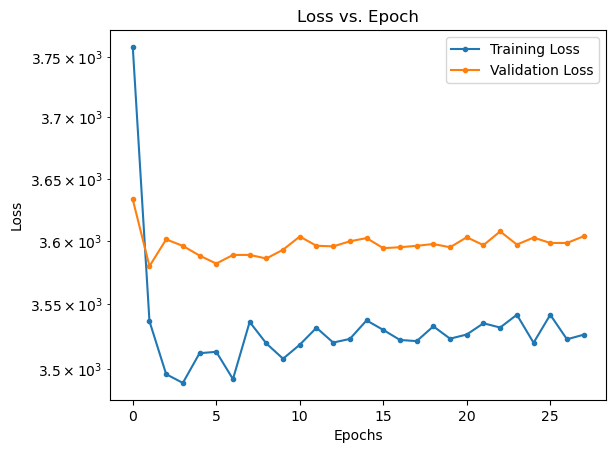

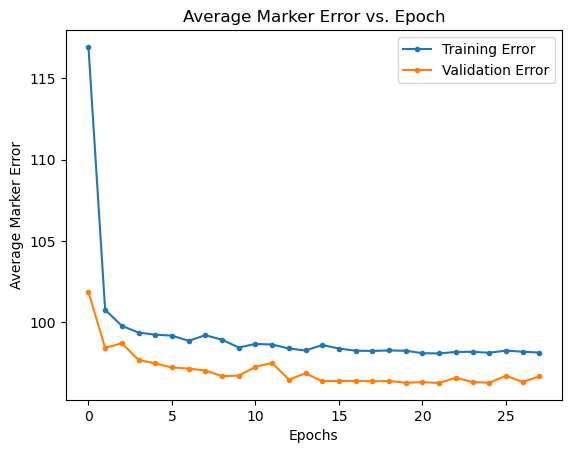

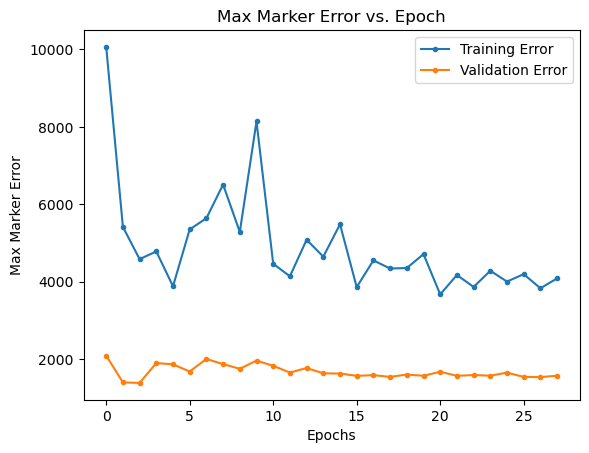

In [8]:
plt.plot(metrics['Training Loss'], label = 'Training Loss', marker = '.')
plt.plot(metrics['Validation Loss'], label = 'Validation Loss', marker = '.')
plt.title('Loss vs. Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()
plt.show()

plt.plot(metrics['Training Avg Marker Error'], label = 'Training Error', marker = '.')
plt.plot(metrics['Validation Avg Marker Error'], label = 'Validation Error', marker = '.')
plt.title('Average Marker Error vs. Epoch')
plt.xlabel('Epochs')
plt.ylabel('Average Marker Error')
plt.legend()
plt.show()

plt.plot(metrics['Training Max Marker Error'], label = 'Training Error', marker = '.')
plt.plot(metrics['Validation Max Marker Error'], label = 'Validation Error', marker = '.')
plt.title('Max Marker Error vs. Epoch')
plt.xlabel('Epochs')
plt.ylabel('Max Marker Error')
plt.legend()
plt.show()

In [9]:
print("Best Params:\n_________________________________________________________________________________________________________")
for key, value in best_params.items():
    print('    {}: {}'.format(key, value))

Best Params:
_________________________________________________________________________________________________________
    t_win: 48.0
    t_stride: 12.0
    t_lookahead: 69.0
    win_mode: win_fft
    p_transform: 0.4141414141414142
    sigma: 1.6161616161616161
    p_mask: 0.16666666666666669
    batch_size: 8
    learning_rate: 0.0003527118837675351
    dropout: 0.09090909090909091
    RNN_hdim: 16
    RNN_depth: 2
    CNN_kernel: 5
